<a href="https://colab.research.google.com/github/sydney-machine-learning/sentimentanalysis-COVID19news/blob/main/Visualisation/visualisation2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import nltk
import unicodedata
import re
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to C:\Users\Zhu
[nltk_data]    |     Baicheng\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to C:\Users\Zhu
[nltk_data]    |     Baicheng\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Zhu
[nltk_data]    |     Baicheng\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Zhu
[nltk_data]    |     Baicheng\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to C:\Users\Zhu

True

In [ ]:
data_path = r"D:\UNSW\2024T1\MATH5925\code\bert_final2.csv"
bert_data = pd.read_csv(data_path)
bert_data = bert_data.dropna()
bert_data = bert_data.reset_index().drop(['index'], axis = 1)
bert_data['sectionName'].value_counts()

sectionName
World news        11255
Opinion            7776
Australia news     5401
Business           4670
Politics           4585
UK news            4251
Name: count, dtype: int64

In [ ]:
bert_data['webPublicationDate']=pd.to_datetime(bert_data['webPublicationDate'])
bert_data['year_quarter'] = bert_data['webPublicationDate'].dt.year.astype(str) + '-Q' + bert_data['webPublicationDate'].dt.quarter.astype(str)
bert_data
print(bert_data.head())

                                               Tweet  Optimistic  Thankful  \
0  The government is to release a leaked Brexit a...         0.0       0.0   
1  Twenty-two school children on their way to sta...         0.0       0.0   
2  Ireland’s deputy prime minister has warned it ...         0.0       0.0   
3  The former prime minister Kevin Rudd is suing ...         0.0       0.0   
4  The Labor leader, Bill Shorten, on Tuesday sen...         0.0       0.0   

   Empathetic  Pessimistic  Anxious  Sad  Annoyed  Denial  Official report  \
0         0.0          0.0      0.0  0.0      0.0     0.0              1.0   
1         0.0          0.0      0.0  0.0      0.0     0.0              1.0   
2         0.0          0.0      0.0  0.0      0.0     0.0              1.0   
3         0.0          0.0      0.0  0.0      0.0     0.0              1.0   
4         0.0          0.0      0.0  0.0      0.0     1.0              1.0   

   Joking webPublicationDate     sectionName year_quarter  
0 

In [ ]:
bert_data_drop = bert_data.drop('Official report',axis=1)
bert_data_drop


Tweet  Optimistic  \
0      The government is to release a leaked Brexit a...         0.0   
1      Twenty-two school children on their way to sta...         0.0   
2      Ireland’s deputy prime minister has warned it ...         0.0   
3      The former prime minister Kevin Rudd is suing ...         0.0   
4      The Labor leader, Bill Shorten, on Tuesday sen...         0.0   
...                                                  ...         ...   
37933  Top story: ‘They want to raze it to the ground...         0.0   
37934  A Russian couple who staged a solitary protest...         0.0   
37935  All big experiences in our lives have two real...         0.0   
37936  Until the Russian invasion of Ukraine, Hungary...         0.0   
37937  The lines for sugar in Saratov were hard not t...         0.0   

       Thankful  Empathetic  Pessimistic  Anxious  Sad  Annoyed  Denial  \
0           0.0         0.0          0.0      0.0  0.0      0.0     0.0   
1           0.0         0.0          0.0      0.0  0.0      0.0     0.0   
2           0.0         0.0          0.0      0.0  0.0      0.0     0.0   
3           0.0         0.0          0.0      0.0  0.0      0.0     0.0   
4           0.0         0.0          0.0      0.0  0.0      0.0     1.0   
...         ...         ...          ...      ...  ...      ...     ...   
37933       0.0         0.0          0.0      1.0  0.0      1.0     1.0   
37934       0.0         0.0          0.0      0.0  0.0      0.0     0.0   
37935       0.0         0.0          1.0      0.0  0.0      0.0     0.0   
37936       0.0         0.0          0.0      0.0  0.0      0.0     0.0   
37937       0.0         0.0          0.0      1.0  0.0      0.0     0.0   

       Joking webPublicationDate     sectionName year_quarter  
0         0.0         2018-01-31        Politics      2018-Q1  
1         0.0         2018-01-31      World news      2018-Q1  
2         0.0         2018-01-31        Politics      2018-Q1  
3         0.0         2018-01-31  Australia news      2018-Q1  
4         0.0         2018-01-31        Business      2018-Q1  
...       ...                ...             ...          ...  
37933     0.0         2022-03-23      World news      2022-Q1  
37934     0.0         2022-03-23         UK news      2022-Q1  
37935     0.0         2022-03-23         Opinion      2022-Q1  
37936     0.0         2022-03-23      World news      2022-Q1  
37937     0.0         2022-03-23      World news      2022-Q1  

[37938 rows x 13 columns]

In [ ]:
data_path = r"D:\UNSW\2024T1\MATH5925\code\roberta_final1.0.csv"
roberta_data = pd.read_csv(data_path)
roberta_data = roberta_data.dropna()
roberta_data = roberta_data.reset_index().drop(['index'], axis = 1)
roberta_data

bodyContent  Optimistic  \
0      The government is to release a leaked Brexit a...         0.0   
1      Twenty-two school children on their way to sta...         0.0   
2      Ireland’s deputy prime minister has warned it ...         0.0   
3      The former prime minister Kevin Rudd is suing ...         0.0   
4      The Labor leader, Bill Shorten, on Tuesday sen...         0.0   
...                                                  ...         ...   
37933  Top story: ‘They want to raze it to the ground...         0.0   
37934  A Russian couple who staged a solitary protest...         0.0   
37935  All big experiences in our lives have two real...         0.0   
37936  Until the Russian invasion of Ukraine, Hungary...         0.0   
37937  The lines for sugar in Saratov were hard not t...         0.0   

       Thankful  Empathetic  Pessimistic  Anxious  Sad  Annoyed  Denial  \
0           0.0         0.0          0.0      0.0  0.0      0.0     0.0   
1           0.0         0.0          0.0      0.0  1.0      0.0     0.0   
2           0.0         0.0          0.0      0.0  0.0      0.0     0.0   
3           0.0         0.0          0.0      0.0  0.0      0.0     0.0   
4           0.0         0.0          0.0      0.0  0.0      0.0     1.0   
...         ...         ...          ...      ...  ...      ...     ...   
37933       0.0         0.0          0.0      0.0  0.0      0.0     0.0   
37934       0.0         0.0          0.0      0.0  0.0      0.0     0.0   
37935       0.0         0.0          1.0      0.0  0.0      1.0     0.0   
37936       0.0         0.0          0.0      0.0  0.0      1.0     1.0   
37937       0.0         0.0          0.0      0.0  1.0      0.0     0.0   

       Official report  Joking     sectionName webPublicationDate year_quarter  
0                  1.0     0.0        Politics         2018-01-31      2018-Q1  
1                  1.0     0.0      World news         2018-01-31      2018-Q1  
2                  1.0     0.0        Politics         2018-01-31      2018-Q1  
3                  1.0     0.0  Australia news         2018-01-31      2018-Q1  
4                  1.0     0.0        Business         2018-01-31      2018-Q1  
...                ...     ...             ...                ...          ...  
37933              1.0     0.0      World news         2022-03-23      2022-Q1  
37934              1.0     0.0         UK news         2022-03-23      2022-Q1  
37935              0.0     0.0         Opinion         2022-03-23      2022-Q1  
37936              0.0     0.0      World news         2022-03-23      2022-Q1  
37937              0.0     0.0      World news         2022-03-23      2022-Q1  

[37938 rows x 14 columns]

In [ ]:
bert_data['n_emotions'] = bert_data['Optimistic'] + bert_data['Thankful'] + bert_data['Empathetic'] + bert_data['Pessimistic'] + bert_data['Anxious'] + bert_data['Sad'] + bert_data['Annoyed'] + bert_data['Denial'] + bert_data['Joking']+bert_data['Official report']
bert_data['n_emotions'] = bert_data['n_emotions'].astype(int)
bert_data

Tweet  Optimistic  \
0      The government is to release a leaked Brexit a...         0.0   
1      Twenty-two school children on their way to sta...         0.0   
2      Ireland’s deputy prime minister has warned it ...         0.0   
3      The former prime minister Kevin Rudd is suing ...         0.0   
4      The Labor leader, Bill Shorten, on Tuesday sen...         0.0   
...                                                  ...         ...   
37933  Top story: ‘They want to raze it to the ground...         0.0   
37934  A Russian couple who staged a solitary protest...         0.0   
37935  All big experiences in our lives have two real...         0.0   
37936  Until the Russian invasion of Ukraine, Hungary...         0.0   
37937  The lines for sugar in Saratov were hard not t...         0.0   

       Thankful  Empathetic  Pessimistic  Anxious  Sad  Annoyed  Denial  \
0           0.0         0.0          0.0      0.0  0.0      0.0     0.0   
1           0.0         0.0          0.0      0.0  0.0      0.0     0.0   
2           0.0         0.0          0.0      0.0  0.0      0.0     0.0   
3           0.0         0.0          0.0      0.0  0.0      0.0     0.0   
4           0.0         0.0          0.0      0.0  0.0      0.0     1.0   
...         ...         ...          ...      ...  ...      ...     ...   
37933       0.0         0.0          0.0      1.0  0.0      1.0     1.0   
37934       0.0         0.0          0.0      0.0  0.0      0.0     0.0   
37935       0.0         0.0          1.0      0.0  0.0      0.0     0.0   
37936       0.0         0.0          0.0      0.0  0.0      0.0     0.0   
37937       0.0         0.0          0.0      1.0  0.0      0.0     0.0   

       Official report  Joking webPublicationDate     sectionName  \
0                  1.0     0.0         2018-01-31        Politics   
1                  1.0     0.0         2018-01-31      World news   
2                  1.0     0.0         2018-01-31        Politics   
3                  1.0     0.0         2018-01-31  Australia news   
4                  1.0     0.0         2018-01-31        Business   
...                ...     ...                ...             ...   
37933              1.0     0.0         2022-03-23      World news   
37934              1.0     0.0         2022-03-23         UK news   
37935              0.0     0.0         2022-03-23         Opinion   
37936              1.0     0.0         2022-03-23      World news   
37937              0.0     0.0         2022-03-23      World news   

      year_quarter  n_emotions  
0          2018-Q1           1  
1          2018-Q1           1  
2          2018-Q1           1  
3          2018-Q1           1  
4          2018-Q1           2  
...            ...         ...  
37933      2022-Q1           4  
37934      2022-Q1           1  
37935      2022-Q1           1  
37936      2022-Q1           1  
37937      2022-Q1           1  

[37938 rows x 15 columns]

In [ ]:
bert_data_drop['n_emotions'] = bert_data_drop['Optimistic'] + bert_data_drop['Thankful'] + bert_data_drop['Empathetic'] + bert_data_drop['Pessimistic'] + bert_data_drop['Anxious'] + bert_data_drop['Sad'] + bert_data_drop['Annoyed'] + bert_data_drop['Denial'] + bert_data_drop['Joking']
bert_data_drop['n_emotions'] = bert_data_drop['n_emotions'].astype(int)
bert_data_drop

Tweet  Optimistic  \
0      The government is to release a leaked Brexit a...         0.0   
1      Twenty-two school children on their way to sta...         0.0   
2      Ireland’s deputy prime minister has warned it ...         0.0   
3      The former prime minister Kevin Rudd is suing ...         0.0   
4      The Labor leader, Bill Shorten, on Tuesday sen...         0.0   
...                                                  ...         ...   
37933  Top story: ‘They want to raze it to the ground...         0.0   
37934  A Russian couple who staged a solitary protest...         0.0   
37935  All big experiences in our lives have two real...         0.0   
37936  Until the Russian invasion of Ukraine, Hungary...         0.0   
37937  The lines for sugar in Saratov were hard not t...         0.0   

       Thankful  Empathetic  Pessimistic  Anxious  Sad  Annoyed  Denial  \
0           0.0         0.0          0.0      0.0  0.0      0.0     0.0   
1           0.0         0.0          0.0      0.0  0.0      0.0     0.0   
2           0.0         0.0          0.0      0.0  0.0      0.0     0.0   
3           0.0         0.0          0.0      0.0  0.0      0.0     0.0   
4           0.0         0.0          0.0      0.0  0.0      0.0     1.0   
...         ...         ...          ...      ...  ...      ...     ...   
37933       0.0         0.0          0.0      1.0  0.0      1.0     1.0   
37934       0.0         0.0          0.0      0.0  0.0      0.0     0.0   
37935       0.0         0.0          1.0      0.0  0.0      0.0     0.0   
37936       0.0         0.0          0.0      0.0  0.0      0.0     0.0   
37937       0.0         0.0          0.0      1.0  0.0      0.0     0.0   

       Joking webPublicationDate     sectionName year_quarter  n_emotions  
0         0.0         2018-01-31        Politics      2018-Q1           0  
1         0.0         2018-01-31      World news      2018-Q1           0  
2         0.0         2018-01-31        Politics      2018-Q1           0  
3         0.0         2018-01-31  Australia news      2018-Q1           0  
4         0.0         2018-01-31        Business      2018-Q1           1  
...       ...                ...             ...          ...         ...  
37933     0.0         2022-03-23      World news      2022-Q1           3  
37934     0.0         2022-03-23         UK news      2022-Q1           0  
37935     0.0         2022-03-23         Opinion      2022-Q1           1  
37936     0.0         2022-03-23      World news      2022-Q1           0  
37937     0.0         2022-03-23      World news      2022-Q1           1  

[37938 rows x 14 columns]

In [ ]:
roberta_data['n_emotions'] = roberta_data['Optimistic'] + roberta_data['Thankful'] + roberta_data['Empathetic'] + roberta_data['Pessimistic'] + roberta_data['Anxious'] + roberta_data['Sad'] + roberta_data['Annoyed'] + roberta_data['Denial'] + roberta_data['Joking']+roberta_data['Official report']
roberta_data['n_emotions'] = roberta_data['n_emotions'].astype(int)
roberta_data

bodyContent  Optimistic  \
0      The government is to release a leaked Brexit a...         0.0   
1      Twenty-two school children on their way to sta...         0.0   
2      Ireland’s deputy prime minister has warned it ...         0.0   
3      The former prime minister Kevin Rudd is suing ...         0.0   
4      The Labor leader, Bill Shorten, on Tuesday sen...         0.0   
...                                                  ...         ...   
37933  Top story: ‘They want to raze it to the ground...         0.0   
37934  A Russian couple who staged a solitary protest...         0.0   
37935  All big experiences in our lives have two real...         0.0   
37936  Until the Russian invasion of Ukraine, Hungary...         0.0   
37937  The lines for sugar in Saratov were hard not t...         0.0   

       Thankful  Empathetic  Pessimistic  Anxious  Sad  Annoyed  Denial  \
0           0.0         0.0          0.0      0.0  0.0      0.0     0.0   
1           0.0         0.0          0.0      0.0  1.0      0.0     0.0   
2           0.0         0.0          0.0      0.0  0.0      0.0     0.0   
3           0.0         0.0          0.0      0.0  0.0      0.0     0.0   
4           0.0         0.0          0.0      0.0  0.0      0.0     1.0   
...         ...         ...          ...      ...  ...      ...     ...   
37933       0.0         0.0          0.0      0.0  0.0      0.0     0.0   
37934       0.0         0.0          0.0      0.0  0.0      0.0     0.0   
37935       0.0         0.0          1.0      0.0  0.0      1.0     0.0   
37936       0.0         0.0          0.0      0.0  0.0      1.0     1.0   
37937       0.0         0.0          0.0      0.0  1.0      0.0     0.0   

       Official report  Joking     sectionName webPublicationDate  \
0                  1.0     0.0        Politics         2018-01-31   
1                  1.0     0.0      World news         2018-01-31   
2                  1.0     0.0        Politics         2018-01-31   
3                  1.0     0.0  Australia news         2018-01-31   
4                  1.0     0.0        Business         2018-01-31   
...                ...     ...             ...                ...   
37933              1.0     0.0      World news         2022-03-23   
37934              1.0     0.0         UK news         2022-03-23   
37935              0.0     0.0         Opinion         2022-03-23   
37936              0.0     0.0      World news         2022-03-23   
37937              0.0     0.0      World news         2022-03-23   

      year_quarter  n_emotions  
0          2018-Q1           1  
1          2018-Q1           2  
2          2018-Q1           1  
3          2018-Q1           1  
4          2018-Q1           2  
...            ...         ...  
37933      2022-Q1           1  
37934      2022-Q1           1  
37935      2022-Q1           2  
37936      2022-Q1           2  
37937      2022-Q1           1  

[37938 rows x 15 columns]

In [ ]:
roberta_data_drop=roberta_data.drop('Official report',axis=1)

In [ ]:
roberta_data_drop['n_emotions'] = roberta_data_drop['Optimistic'] + roberta_data_drop['Thankful'] + roberta_data_drop['Empathetic'] + roberta_data_drop['Pessimistic'] + roberta_data_drop['Anxious'] + roberta_data_drop['Sad'] + roberta_data_drop['Annoyed'] + roberta_data_drop['Denial'] + roberta_data_drop['Joking']
roberta_data_drop['n_emotions'] = roberta_data_drop['n_emotions'].astype(int)
roberta_data_drop

bodyContent  Optimistic  \
0      The government is to release a leaked Brexit a...         0.0   
1      Twenty-two school children on their way to sta...         0.0   
2      Ireland’s deputy prime minister has warned it ...         0.0   
3      The former prime minister Kevin Rudd is suing ...         0.0   
4      The Labor leader, Bill Shorten, on Tuesday sen...         0.0   
...                                                  ...         ...   
37933  Top story: ‘They want to raze it to the ground...         0.0   
37934  A Russian couple who staged a solitary protest...         0.0   
37935  All big experiences in our lives have two real...         0.0   
37936  Until the Russian invasion of Ukraine, Hungary...         0.0   
37937  The lines for sugar in Saratov were hard not t...         0.0   

       Thankful  Empathetic  Pessimistic  Anxious  Sad  Annoyed  Denial  \
0           0.0         0.0          0.0      0.0  0.0      0.0     0.0   
1           0.0         0.0          0.0      0.0  1.0      0.0     0.0   
2           0.0         0.0          0.0      0.0  0.0      0.0     0.0   
3           0.0         0.0          0.0      0.0  0.0      0.0     0.0   
4           0.0         0.0          0.0      0.0  0.0      0.0     1.0   
...         ...         ...          ...      ...  ...      ...     ...   
37933       0.0         0.0          0.0      0.0  0.0      0.0     0.0   
37934       0.0         0.0          0.0      0.0  0.0      0.0     0.0   
37935       0.0         0.0          1.0      0.0  0.0      1.0     0.0   
37936       0.0         0.0          0.0      0.0  0.0      1.0     1.0   
37937       0.0         0.0          0.0      0.0  1.0      0.0     0.0   

       Joking     sectionName webPublicationDate year_quarter  n_emotions  
0         0.0        Politics         2018-01-31      2018-Q1           0  
1         0.0      World news         2018-01-31      2018-Q1           1  
2         0.0        Politics         2018-01-31      2018-Q1           0  
3         0.0  Australia news         2018-01-31      2018-Q1           0  
4         0.0        Business         2018-01-31      2018-Q1           1  
...       ...             ...                ...          ...         ...  
37933     0.0      World news         2022-03-23      2022-Q1           0  
37934     0.0         UK news         2022-03-23      2022-Q1           0  
37935     0.0         Opinion         2022-03-23      2022-Q1           2  
37936     0.0      World news         2022-03-23      2022-Q1           2  
37937     0.0      World news         2022-03-23      2022-Q1           1  

[37938 rows x 14 columns]

In [ ]:
roberta_data['n_emotions'].value_counts()

n_emotions
1    22475
2    13099
3     1585
0      766
4       13
Name: count, dtype: int64

In [ ]:
roberta_data_drop['n_emotions'].value_counts()

n_emotions
1    15555
0    15485
2     6334
3      557
4        7
Name: count, dtype: int64

In [ ]:
bert_data['n_emotions'].value_counts()

n_emotions
1    17518
2    16045
3     3780
0      373
4      220
5        2
Name: count, dtype: int64

In [ ]:
bert_data_drop['n_emotions'].value_counts()

n_emotions
1    15227
0    13849
2     7404
3     1374
4       84
Name: count, dtype: int64

In [ ]:
bert_data_drop['webPublicationDate'] = pd.to_datetime(bert_data_drop['webPublicationDate'])

pre_covid_bert_data = bert_data_drop[(bert_data_drop['webPublicationDate'] >= '2016-1-31') & (bert_data_drop['webPublicationDate'] <= '2019-12-31')]
during_covid_bert_data = bert_data_drop[(bert_data_drop['webPublicationDate'] >= '2020-01-01') & (bert_data_drop['webPublicationDate'] <= '2022-03-31')]
pre_covid_bert_data



Tweet  Optimistic  \
0      The government is to release a leaked Brexit a...         0.0   
1      Twenty-two school children on their way to sta...         0.0   
2      Ireland’s deputy prime minister has warned it ...         0.0   
3      The former prime minister Kevin Rudd is suing ...         0.0   
4      The Labor leader, Bill Shorten, on Tuesday sen...         0.0   
...                                                  ...         ...   
17188  Honest reflection is rarely born from trauma: ...         0.0   
17189  At the start of the election campaign, Boris J...         0.0   
17190  Two of England’s most prestigious Premier Leag...         0.0   
17191  The Champs-Élysées, often called the “most bea...         0.0   
17192  The UK competition watchdog has said there is ...         0.0   

       Thankful  Empathetic  Pessimistic  Anxious  Sad  Annoyed  Denial  \
0           0.0         0.0          0.0      0.0  0.0      0.0     0.0   
1           0.0         0.0          0.0      0.0  0.0      0.0     0.0   
2           0.0         0.0          0.0      0.0  0.0      0.0     0.0   
3           0.0         0.0          0.0      0.0  0.0      0.0     0.0   
4           0.0         0.0          0.0      0.0  0.0      0.0     1.0   
...         ...         ...          ...      ...  ...      ...     ...   
17188       0.0         0.0          0.0      0.0  0.0      1.0     1.0   
17189       0.0         0.0          0.0      0.0  0.0      0.0     1.0   
17190       0.0         0.0          0.0      0.0  0.0      0.0     1.0   
17191       0.0         0.0          0.0      0.0  0.0      0.0     0.0   
17192       0.0         0.0          0.0      1.0  0.0      0.0     1.0   

       Joking webPublicationDate     sectionName year_quarter  n_emotions  
0         0.0         2018-01-31        Politics      2018-Q1           0  
1         0.0         2018-01-31      World news      2018-Q1           0  
2         0.0         2018-01-31        Politics      2018-Q1           0  
3         0.0         2018-01-31  Australia news      2018-Q1           0  
4         0.0         2018-01-31        Business      2018-Q1           1  
...       ...                ...             ...          ...         ...  
17188     0.0         2019-12-18         Opinion      2019-Q4           2  
17189     0.0         2019-12-18         Opinion      2019-Q4           1  
17190     0.0         2019-12-18         Opinion      2019-Q4           1  
17191     1.0         2019-12-18      World news      2019-Q4           1  
17192     0.0         2019-12-18        Business      2019-Q4           2  

[17193 rows x 14 columns]

In [ ]:
during_covid_bert_data

Tweet  Optimistic  \
17193  Thailand has recorded its first human-to-human...         0.0   
17194  In Parliament Square There were no bongs from ...         0.0   
17195  Jared Kushner is a genius. It’s all too easy t...         0.0   
17196  Nearly four years after the Brexit vote, Brita...         0.0   
17197  We have lost. We’re out. Stark words and a ble...         0.0   
...                                                  ...         ...   
37933  Top story: ‘They want to raze it to the ground...         0.0   
37934  A Russian couple who staged a solitary protest...         0.0   
37935  All big experiences in our lives have two real...         0.0   
37936  Until the Russian invasion of Ukraine, Hungary...         0.0   
37937  The lines for sugar in Saratov were hard not t...         0.0   

       Thankful  Empathetic  Pessimistic  Anxious  Sad  Annoyed  Denial  \
17193       0.0         0.0          0.0      0.0  0.0      0.0     0.0   
17194       0.0         0.0          0.0      0.0  1.0      0.0     0.0   
17195       0.0         0.0          0.0      0.0  0.0      1.0     1.0   
17196       0.0         0.0          0.0      0.0  0.0      0.0     0.0   
17197       0.0         0.0          1.0      0.0  0.0      0.0     0.0   
...         ...         ...          ...      ...  ...      ...     ...   
37933       0.0         0.0          0.0      1.0  0.0      1.0     1.0   
37934       0.0         0.0          0.0      0.0  0.0      0.0     0.0   
37935       0.0         0.0          1.0      0.0  0.0      0.0     0.0   
37936       0.0         0.0          0.0      0.0  0.0      0.0     0.0   
37937       0.0         0.0          0.0      1.0  0.0      0.0     0.0   

       Joking webPublicationDate sectionName year_quarter  n_emotions  
17193     0.0         2020-01-31  World news      2020-Q1           0  
17194     0.0         2020-01-31    Politics      2020-Q1           1  
17195     0.0         2020-01-31     Opinion      2020-Q1           2  
17196     0.0         2020-01-31    Politics      2020-Q1           0  
17197     0.0         2020-01-31     Opinion      2020-Q1           1  
...       ...                ...         ...          ...         ...  
37933     0.0         2022-03-23  World news      2022-Q1           3  
37934     0.0         2022-03-23     UK news      2022-Q1           0  
37935     0.0         2022-03-23     Opinion      2022-Q1           1  
37936     0.0         2022-03-23  World news      2022-Q1           0  
37937     0.0         2022-03-23  World news      2022-Q1           1  

[20745 rows x 14 columns]

In [ ]:
roberta_data_drop['webPublicationDate'] = pd.to_datetime(roberta_data_drop['webPublicationDate'])

pre_covid_roberta_data = roberta_data_drop[(roberta_data_drop['webPublicationDate'] >= '2016-1-31') & (roberta_data_drop['webPublicationDate'] <= '2019-12-31')]
during_covid_roberta_data = roberta_data_drop[(roberta_data_drop['webPublicationDate'] >= '2020-01-01') & (roberta_data_drop['webPublicationDate'] <= '2022-03-31')]

In [ ]:
bert_data_drop["sectionName"].value_counts()

sectionName
World news        11255
Opinion            7776
Australia news     5401
Business           4670
Politics           4585
UK news            4251
Name: count, dtype: int64

In [ ]:
pre_covid_bert_data

Tweet  Optimistic  \
0      The government is to release a leaked Brexit a...         0.0   
1      Twenty-two school children on their way to sta...         0.0   
2      Ireland’s deputy prime minister has warned it ...         0.0   
3      The former prime minister Kevin Rudd is suing ...         0.0   
4      The Labor leader, Bill Shorten, on Tuesday sen...         0.0   
...                                                  ...         ...   
17188  Honest reflection is rarely born from trauma: ...         0.0   
17189  At the start of the election campaign, Boris J...         0.0   
17190  Two of England’s most prestigious Premier Leag...         0.0   
17191  The Champs-Élysées, often called the “most bea...         0.0   
17192  The UK competition watchdog has said there is ...         0.0   

       Thankful  Empathetic  Pessimistic  Anxious  Sad  Annoyed  Denial  \
0           0.0         0.0          0.0      0.0  0.0      0.0     0.0   
1           0.0         0.0          0.0      0.0  0.0      0.0     0.0   
2           0.0         0.0          0.0      0.0  0.0      0.0     0.0   
3           0.0         0.0          0.0      0.0  0.0      0.0     0.0   
4           0.0         0.0          0.0      0.0  0.0      0.0     1.0   
...         ...         ...          ...      ...  ...      ...     ...   
17188       0.0         0.0          0.0      0.0  0.0      1.0     1.0   
17189       0.0         0.0          0.0      0.0  0.0      0.0     1.0   
17190       0.0         0.0          0.0      0.0  0.0      0.0     1.0   
17191       0.0         0.0          0.0      0.0  0.0      0.0     0.0   
17192       0.0         0.0          0.0      1.0  0.0      0.0     1.0   

       Joking webPublicationDate     sectionName year_quarter  n_emotions  
0         0.0         2018-01-31        Politics      2018-Q1           0  
1         0.0         2018-01-31      World news      2018-Q1           0  
2         0.0         2018-01-31        Politics      2018-Q1           0  
3         0.0         2018-01-31  Australia news      2018-Q1           0  
4         0.0         2018-01-31        Business      2018-Q1           1  
...       ...                ...             ...          ...         ...  
17188     0.0         2019-12-18         Opinion      2019-Q4           2  
17189     0.0         2019-12-18         Opinion      2019-Q4           1  
17190     0.0         2019-12-18         Opinion      2019-Q4           1  
17191     1.0         2019-12-18      World news      2019-Q4           1  
17192     0.0         2019-12-18        Business      2019-Q4           2  

[17193 rows x 14 columns]

In [ ]:
during_covid_bert_data

Tweet  Optimistic  \
17193  Thailand has recorded its first human-to-human...         0.0   
17194  In Parliament Square There were no bongs from ...         0.0   
17195  Jared Kushner is a genius. It’s all too easy t...         0.0   
17196  Nearly four years after the Brexit vote, Brita...         0.0   
17197  We have lost. We’re out. Stark words and a ble...         0.0   
...                                                  ...         ...   
37933  Top story: ‘They want to raze it to the ground...         0.0   
37934  A Russian couple who staged a solitary protest...         0.0   
37935  All big experiences in our lives have two real...         0.0   
37936  Until the Russian invasion of Ukraine, Hungary...         0.0   
37937  The lines for sugar in Saratov were hard not t...         0.0   

       Thankful  Empathetic  Pessimistic  Anxious  Sad  Annoyed  Denial  \
17193       0.0         0.0          0.0      0.0  0.0      0.0     0.0   
17194       0.0         0.0          0.0      0.0  1.0      0.0     0.0   
17195       0.0         0.0          0.0      0.0  0.0      1.0     1.0   
17196       0.0         0.0          0.0      0.0  0.0      0.0     0.0   
17197       0.0         0.0          1.0      0.0  0.0      0.0     0.0   
...         ...         ...          ...      ...  ...      ...     ...   
37933       0.0         0.0          0.0      1.0  0.0      1.0     1.0   
37934       0.0         0.0          0.0      0.0  0.0      0.0     0.0   
37935       0.0         0.0          1.0      0.0  0.0      0.0     0.0   
37936       0.0         0.0          0.0      0.0  0.0      0.0     0.0   
37937       0.0         0.0          0.0      1.0  0.0      0.0     0.0   

       Joking webPublicationDate sectionName year_quarter  n_emotions  
17193     0.0         2020-01-31  World news      2020-Q1           0  
17194     0.0         2020-01-31    Politics      2020-Q1           1  
17195     0.0         2020-01-31     Opinion      2020-Q1           2  
17196     0.0         2020-01-31    Politics      2020-Q1           0  
17197     0.0         2020-01-31     Opinion      2020-Q1           1  
...       ...                ...         ...          ...         ...  
37933     0.0         2022-03-23  World news      2022-Q1           3  
37934     0.0         2022-03-23     UK news      2022-Q1           0  
37935     0.0         2022-03-23     Opinion      2022-Q1           1  
37936     0.0         2022-03-23  World news      2022-Q1           0  
37937     0.0         2022-03-23  World news      2022-Q1           1  

[20745 rows x 14 columns]

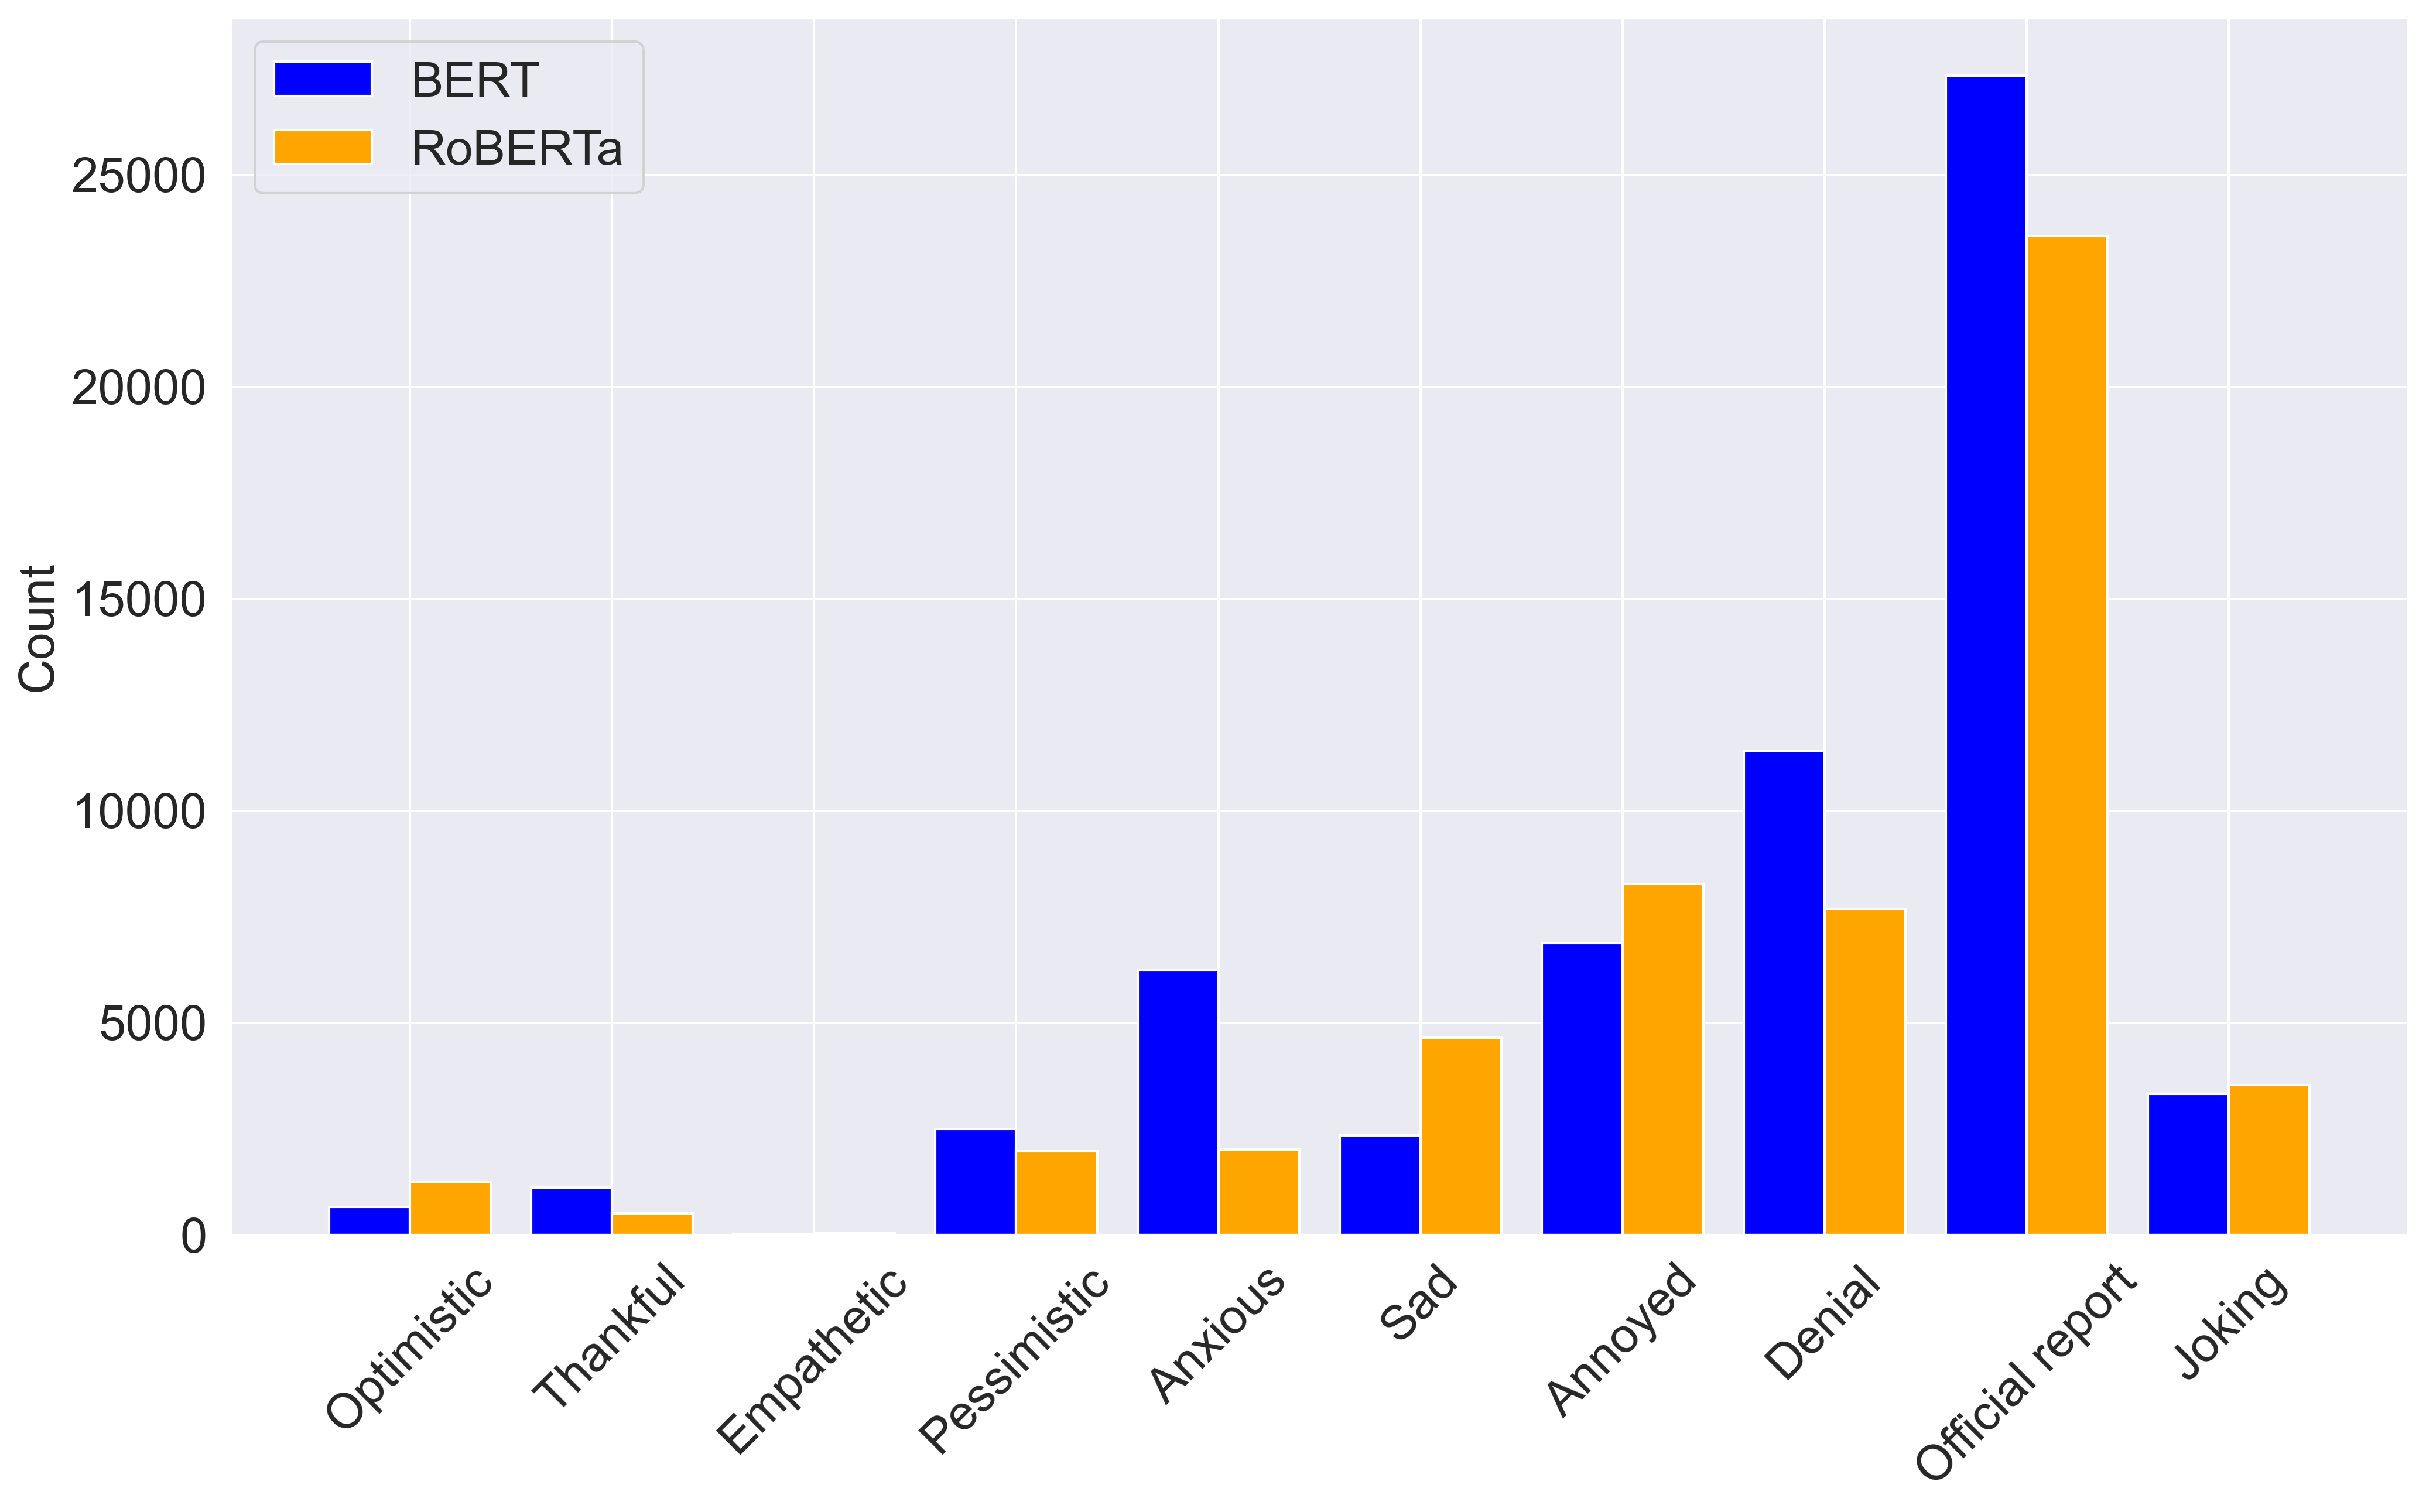

In [ ]:
bert_sent_values = bert_data.iloc[:, 1:11].sum().values.astype(int)
roberta_sent_values = roberta_data.iloc[:, 1:11].sum().values.astype(int)
emotions = list(bert_data.columns[1:11])

x = np.arange(10)
y1 = bert_sent_values
y2 = roberta_sent_values
width = 0.4
plt.figure(figsize=(16, 9), dpi=300)  # set DPI = 300

#plt.figure(figsize = (16, 9))
plt.bar(x-0.2, y1, width, color = 'blue')
plt.bar(x+0.2, y2, width, color = 'orange')
plt.xticks(x, emotions, rotation=45,fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.legend(["BERT", "RoBERTa"], fontsize = 20)
plt.show()

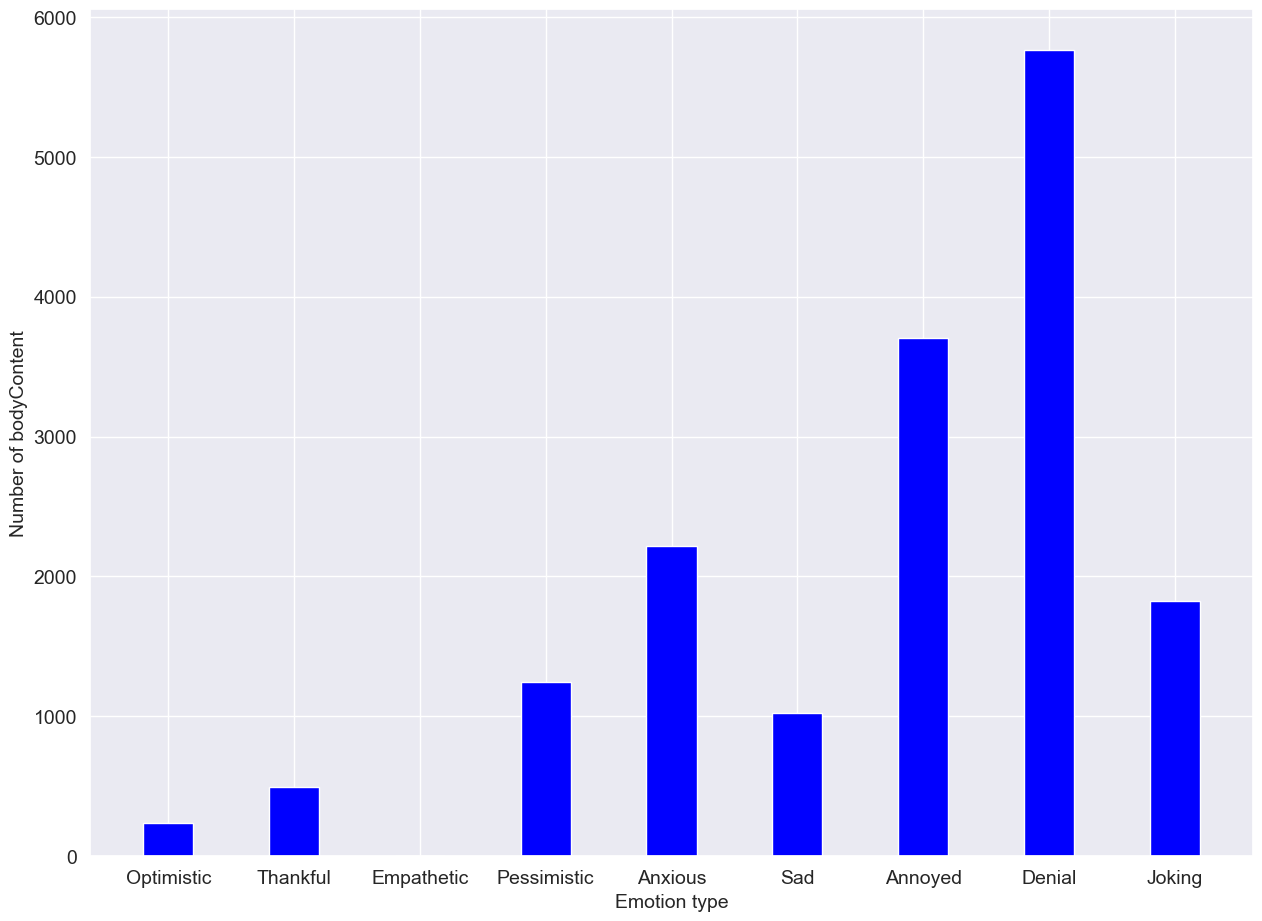

In [ ]:
pre_covid_bert_sent_values = pre_covid_bert_data.iloc[:, 1:10].sum().values.astype(int)
emotions = list(pre_covid_bert_data.columns[1:10])

x = np.arange(9)
y1 = pre_covid_bert_sent_values
width = 0.4

plt.figure(figsize = (15, 11))
plt.bar(x, y1, width, color = 'blue')
plt.xticks(x, emotions, fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel("Emotion type", fontsize = 14)
plt.ylabel("Number of bodyContent", fontsize = 14)
plt.show()

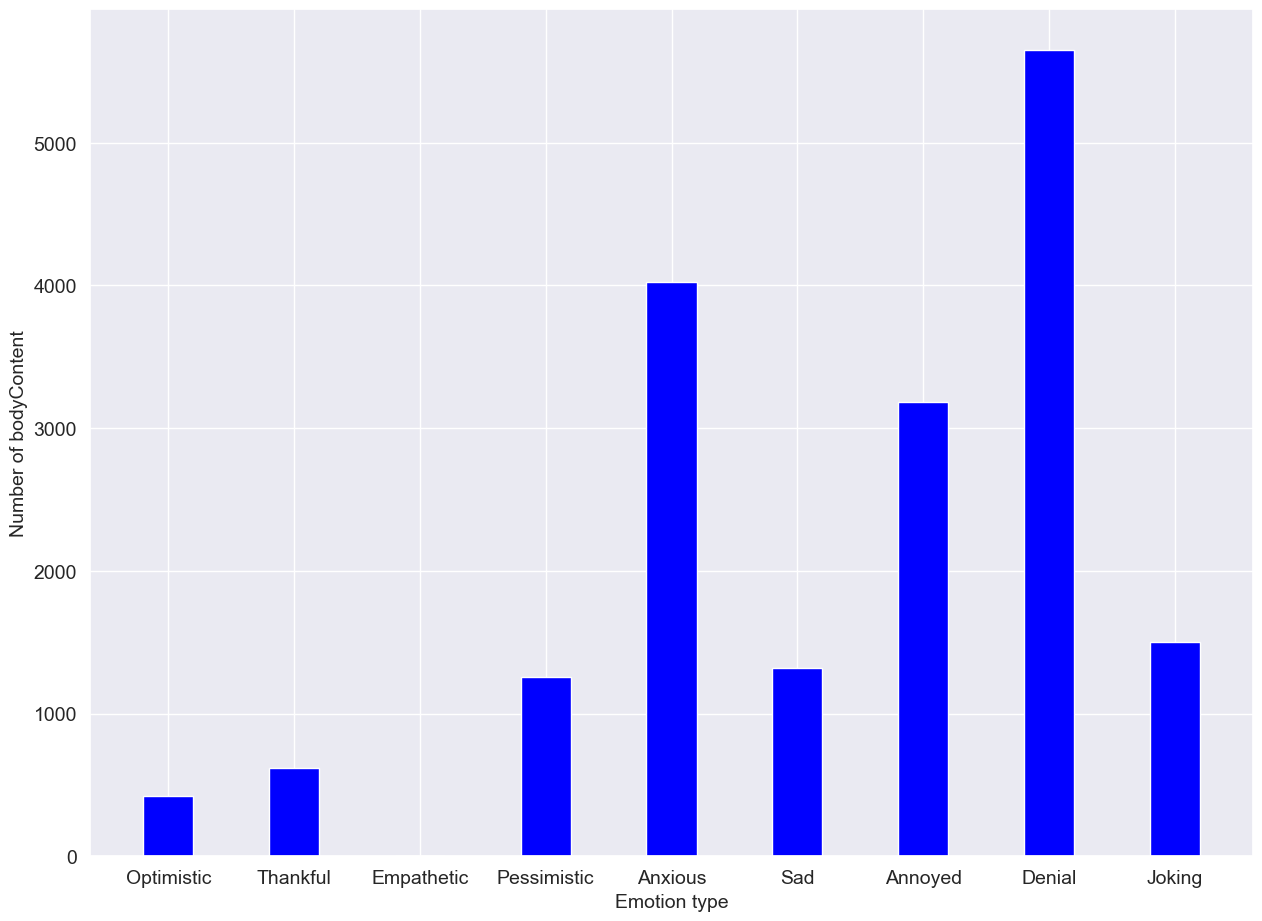

In [ ]:
during_covid_bert_sent_values = during_covid_bert_data.iloc[:, 1:10].sum().values.astype(int)
emotions = list(during_covid_bert_data.columns[1:10])

x = np.arange(9)
y1 = during_covid_bert_sent_values
width = 0.4

plt.figure(figsize = (15, 11))
plt.bar(x, y1, width, color = 'blue')
plt.xticks(x, emotions, fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel("Emotion type", fontsize = 14)
plt.ylabel("Number of bodyContent", fontsize = 14)
plt.show()

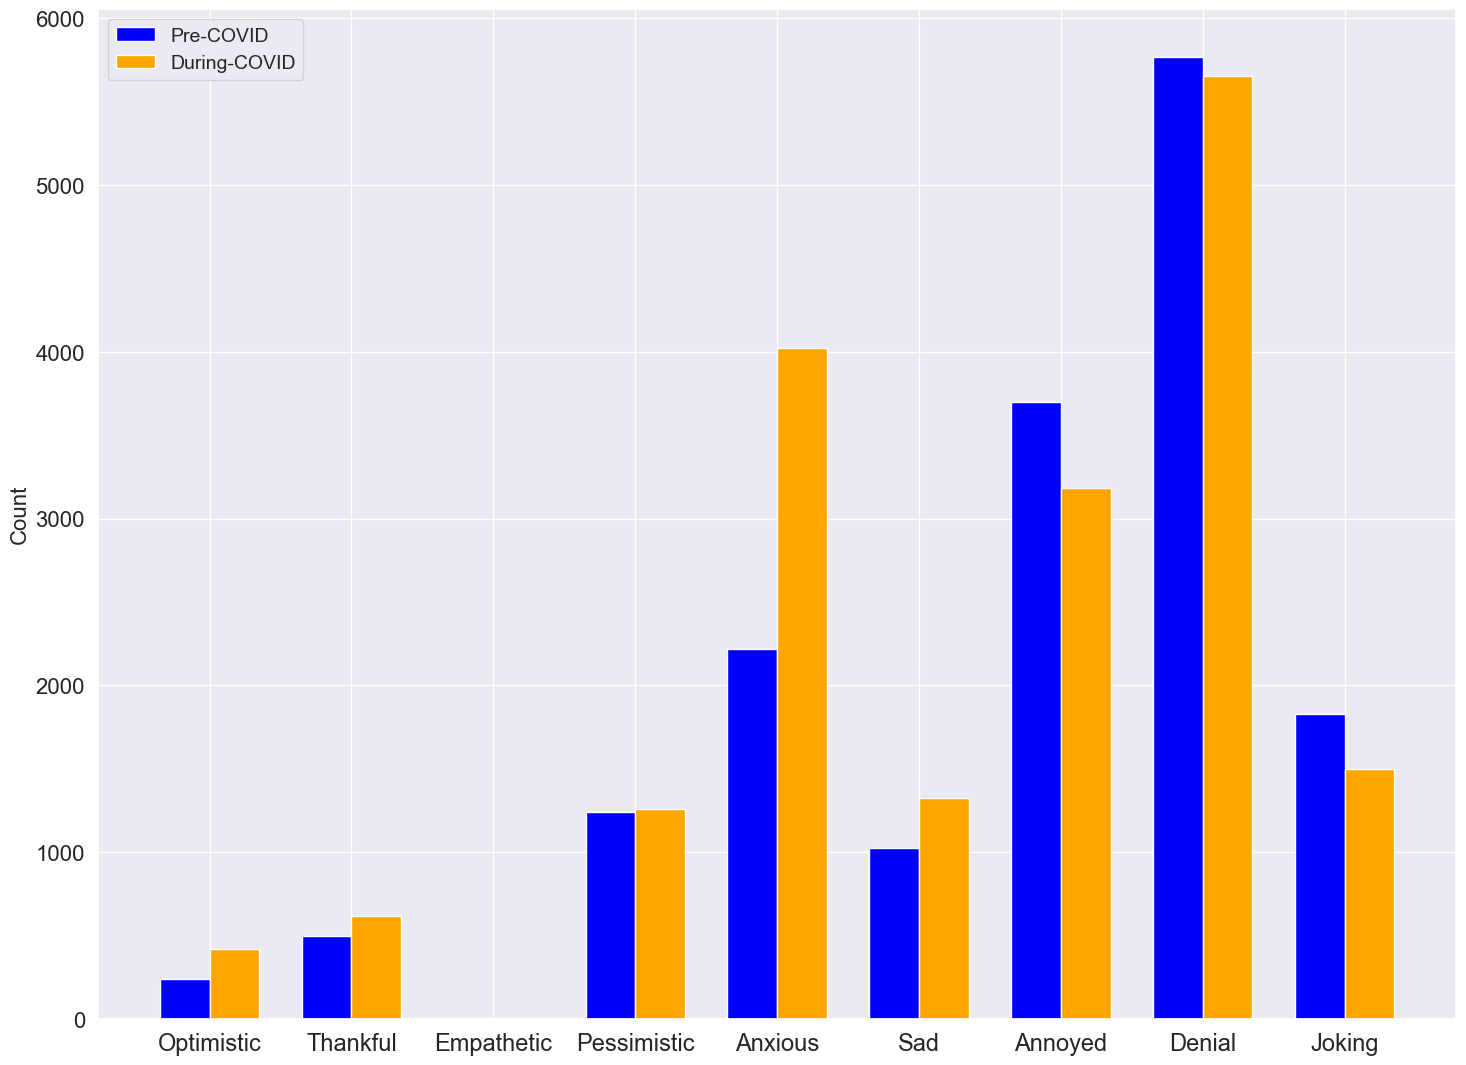

In [ ]:
# 设置x轴的位置和每个条形图的宽度
x = np.arange(len(emotions))  # 假设两组数据的情绪种类数量相同
width = 0.35  # 条形图的宽度

# 创建一个图形和轴的实例
plt.figure(figsize=(15, 11))

# 绘制两组数据
plt.bar(x - width/2, pre_covid_bert_sent_values, width, label='Pre-COVID', color='blue')
plt.bar(x + width/2, during_covid_bert_sent_values, width, label='During-COVID', color='orange')

# 添加一些图形装饰
plt.ylabel('Count', fontsize=16)
plt.xticks(x, emotions, fontsize=17)  # 假设pre_covid和during_covid的情绪标签相同
plt.yticks(fontsize=16)
plt.legend(fontsize=14)
plt.tight_layout()  # 调整布局以确保所有标签和标题都能完整显示
plt.show()

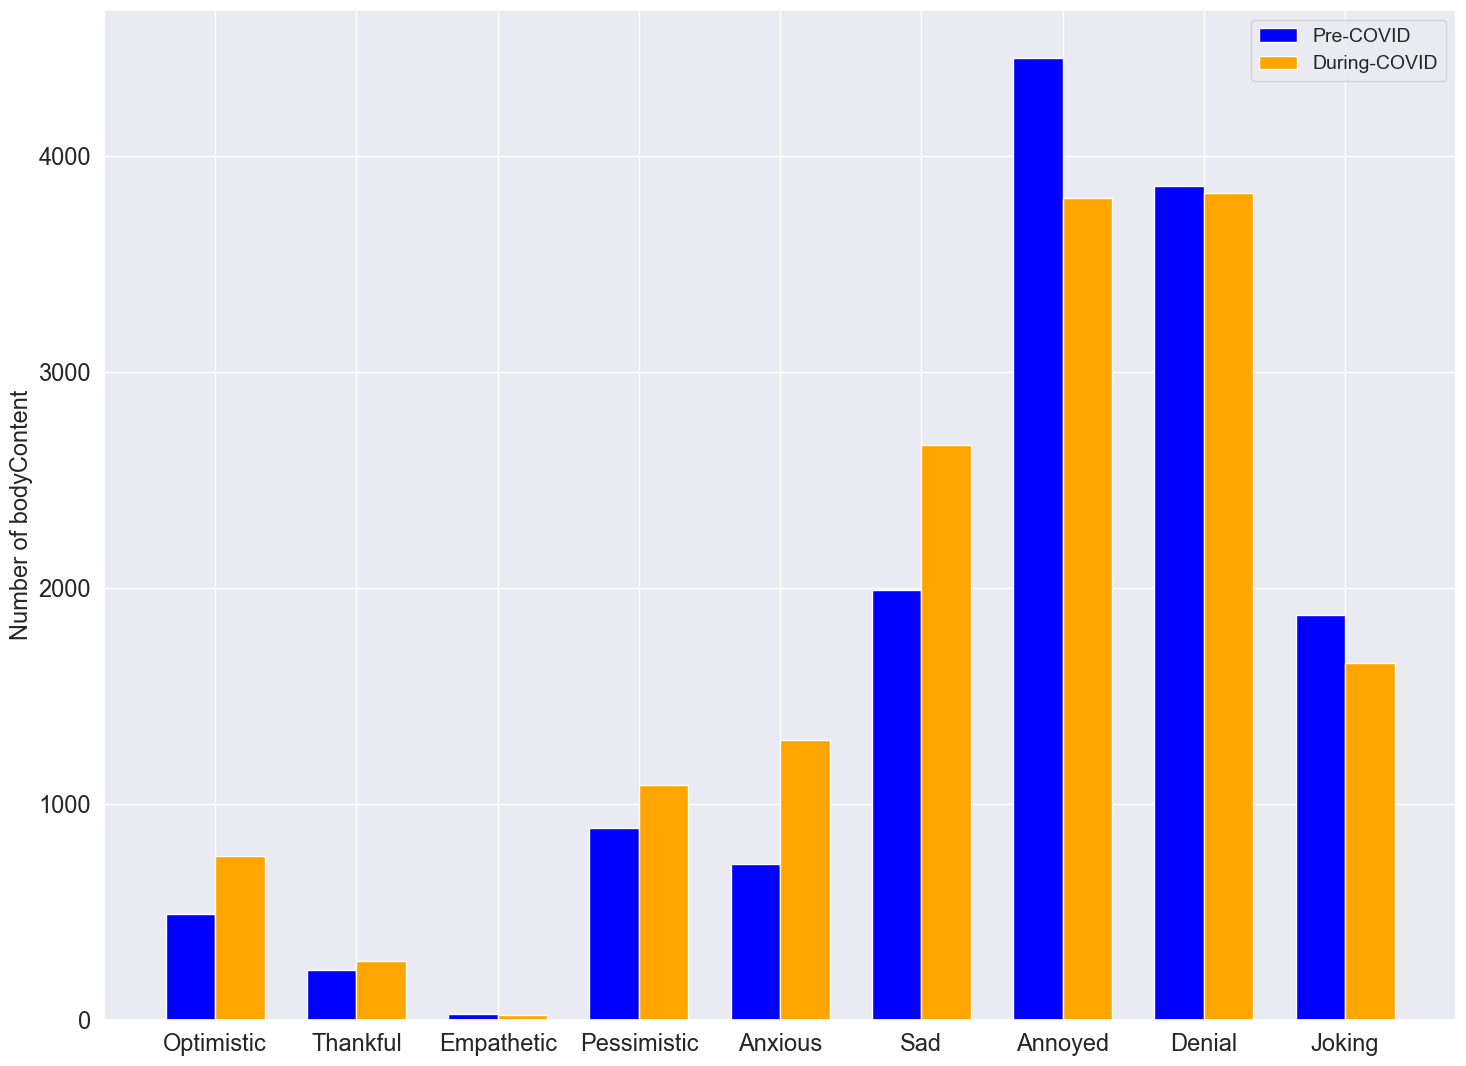

In [ ]:
pre_covid_roberta_sent_values = pre_covid_roberta_data.iloc[:, 1:10].sum().values.astype(int)
during_covid_roberta_sent_values = during_covid_roberta_data.iloc[:, 1:10].sum().values.astype(int)
emotions = list(during_covid_bert_data.columns[1:10])
# 设置x轴的位置和每个条形图的宽度
x = np.arange(len(emotions))  # 假设两组数据的情绪种类数量相同
width = 0.35  # 条形图的宽度

# 创建一个图形和轴的实例
plt.figure(figsize=(15, 11))

# 绘制两组数据
plt.bar(x - width/2, pre_covid_roberta_sent_values, width, label='Pre-COVID', color='blue')
plt.bar(x + width/2, during_covid_roberta_sent_values, width, label='During-COVID', color='orange')

# 添加一些图形装饰
plt.ylabel('Number of bodyContent', fontsize=17)
plt.xticks(x, emotions, fontsize=17)  # 假设pre_covid和during_covid的情绪标签相同
plt.yticks(fontsize=17)
plt.legend(fontsize=14)
plt.tight_layout()  # 调整布局以确保所有标签和标题都能完整显示
plt.show()

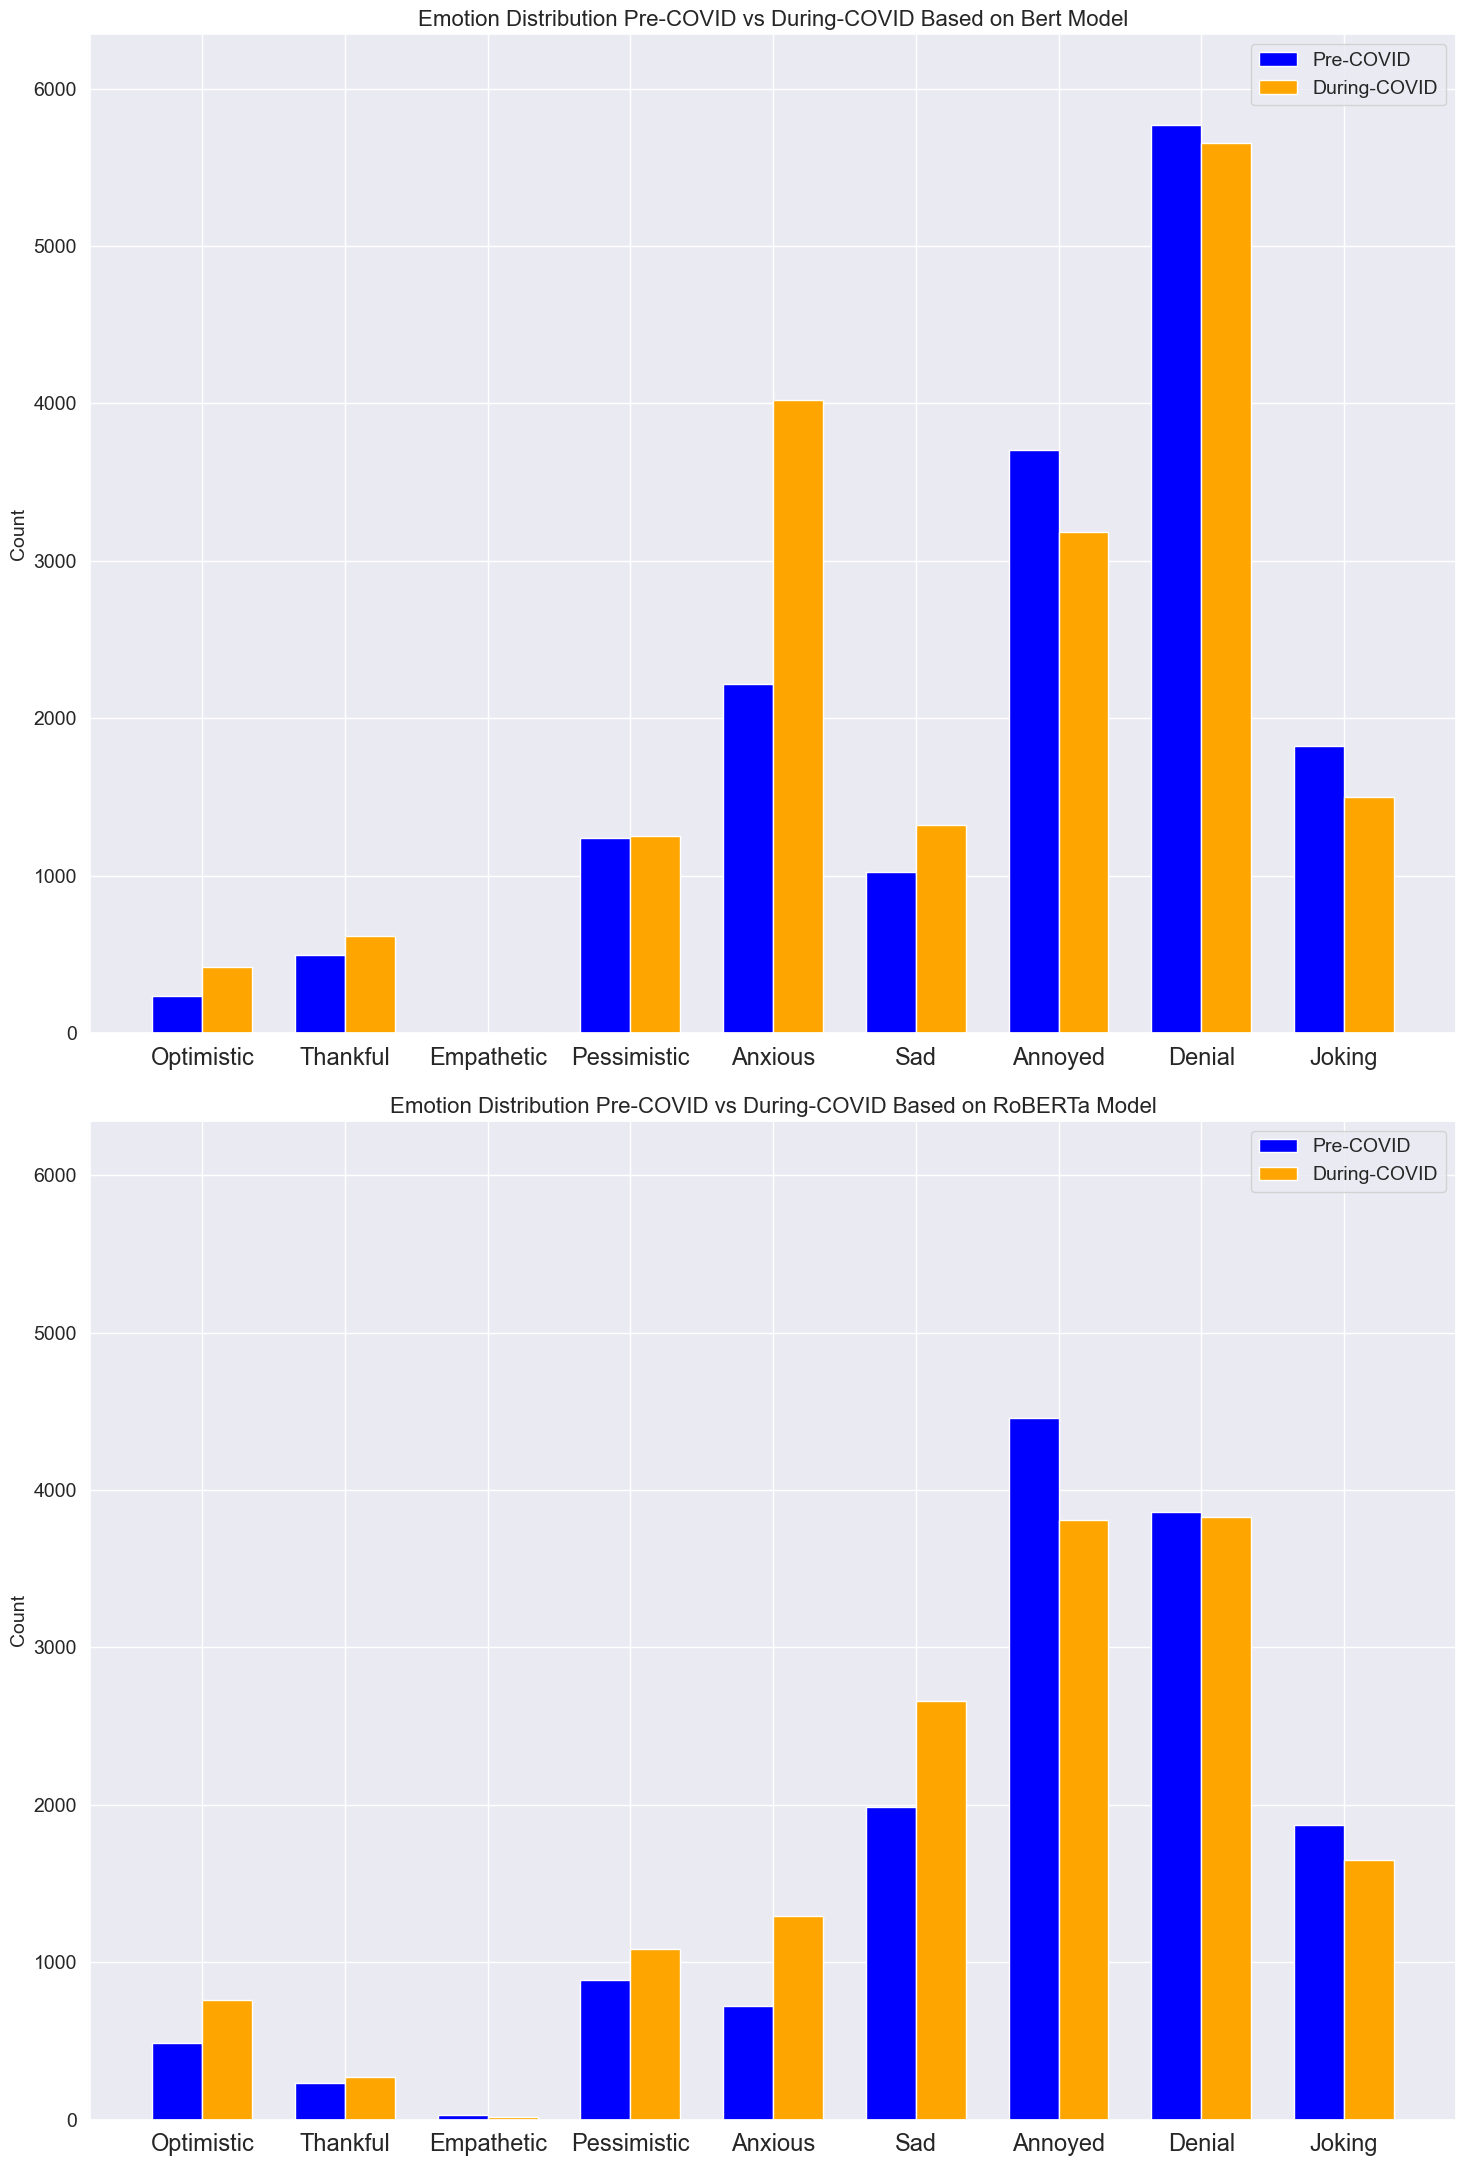

In [ ]:
# 设置x轴的位置和每个条形图的宽度
x = np.arange(len(emotions))
width = 0.35

# 找出所有数据中的最大值
max_value = max(
    max(pre_covid_bert_sent_values), max(during_covid_bert_sent_values),
    max(pre_covid_roberta_sent_values), max(during_covid_roberta_sent_values)
)

# 创建一个图形和两个轴的实例，调整为2行1列的子图
fig, axs = plt.subplots(2, 1, figsize=(15, 22))  # 2行1列的子图

# 绘制Bert模型的情绪分布
axs[0].bar(x - width/2, pre_covid_bert_sent_values, width, label='Pre-COVID', color='blue')
axs[0].bar(x + width/2, during_covid_bert_sent_values, width, label='During-COVID', color='orange')

# 添加Bert模型的图形装饰
axs[0].set_ylabel('Count', fontsize=14)
axs[0].set_xticks(x)
axs[0].set_xticklabels(emotions, fontsize=17)
axs[0].tick_params(axis='y', labelsize=14)
axs[0].legend(fontsize=14)
axs[0].set_title('Emotion Distribution Pre-COVID vs During-COVID Based on Bert Model', fontsize=16)

# 绘制RoBERTa模型的情绪分布
axs[1].bar(x - width/2, pre_covid_roberta_sent_values, width, label='Pre-COVID', color='blue')
axs[1].bar(x + width/2, during_covid_roberta_sent_values, width, label='During-COVID', color='orange')

# 添加RoBERTa模型的图形装饰
axs[1].set_ylabel('Count', fontsize=14)
axs[1].set_xticks(x)
axs[1].set_xticklabels(emotions, fontsize=17)
axs[1].tick_params(axis='y', labelsize=14)
axs[1].legend(fontsize=14)
axs[1].set_title('Emotion Distribution Pre-COVID vs During-COVID Based on RoBERTa Model', fontsize=16)

# 设置两个子图的y轴范围相同
axs[0].set_ylim(0, max_value * 1.1)  # 添加10%的余量以便于观察
axs[1].set_ylim(0, max_value * 1.1)

plt.tight_layout()
plt.show()

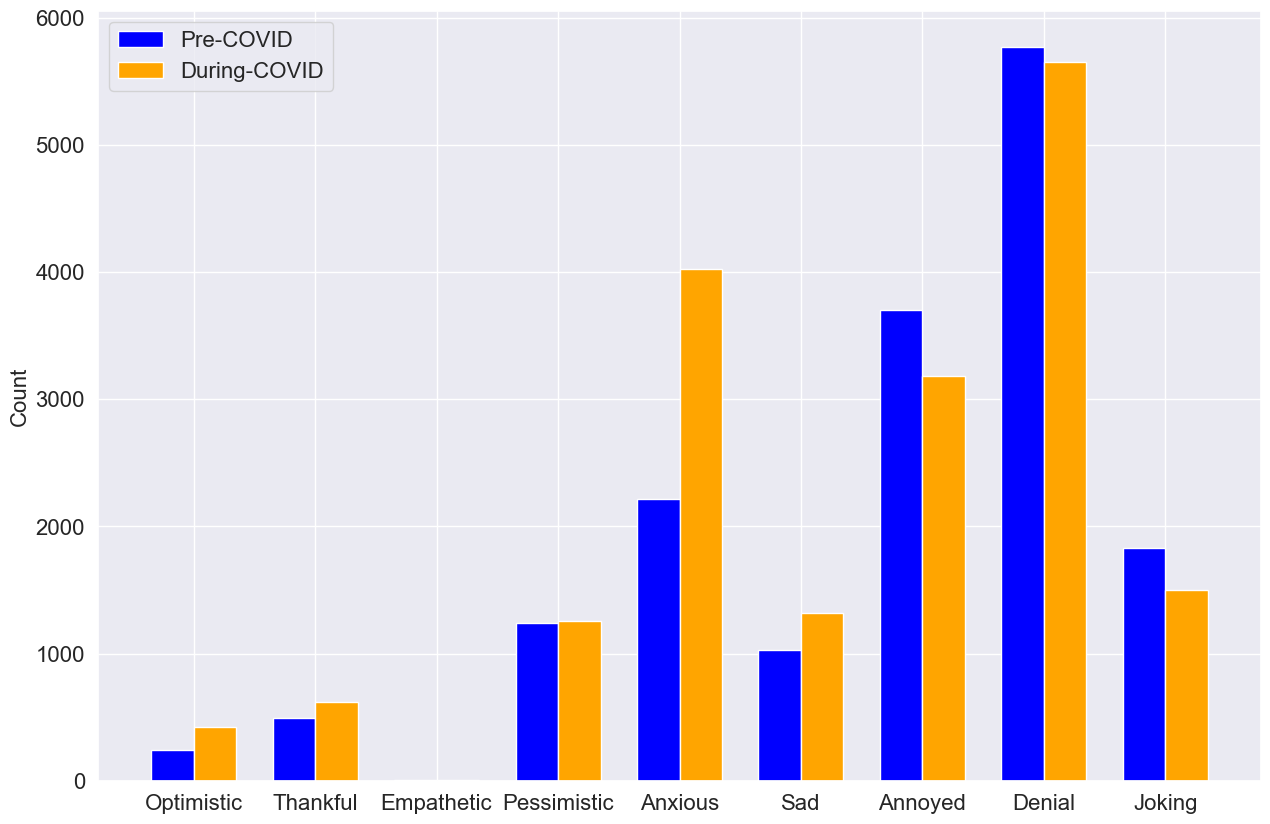

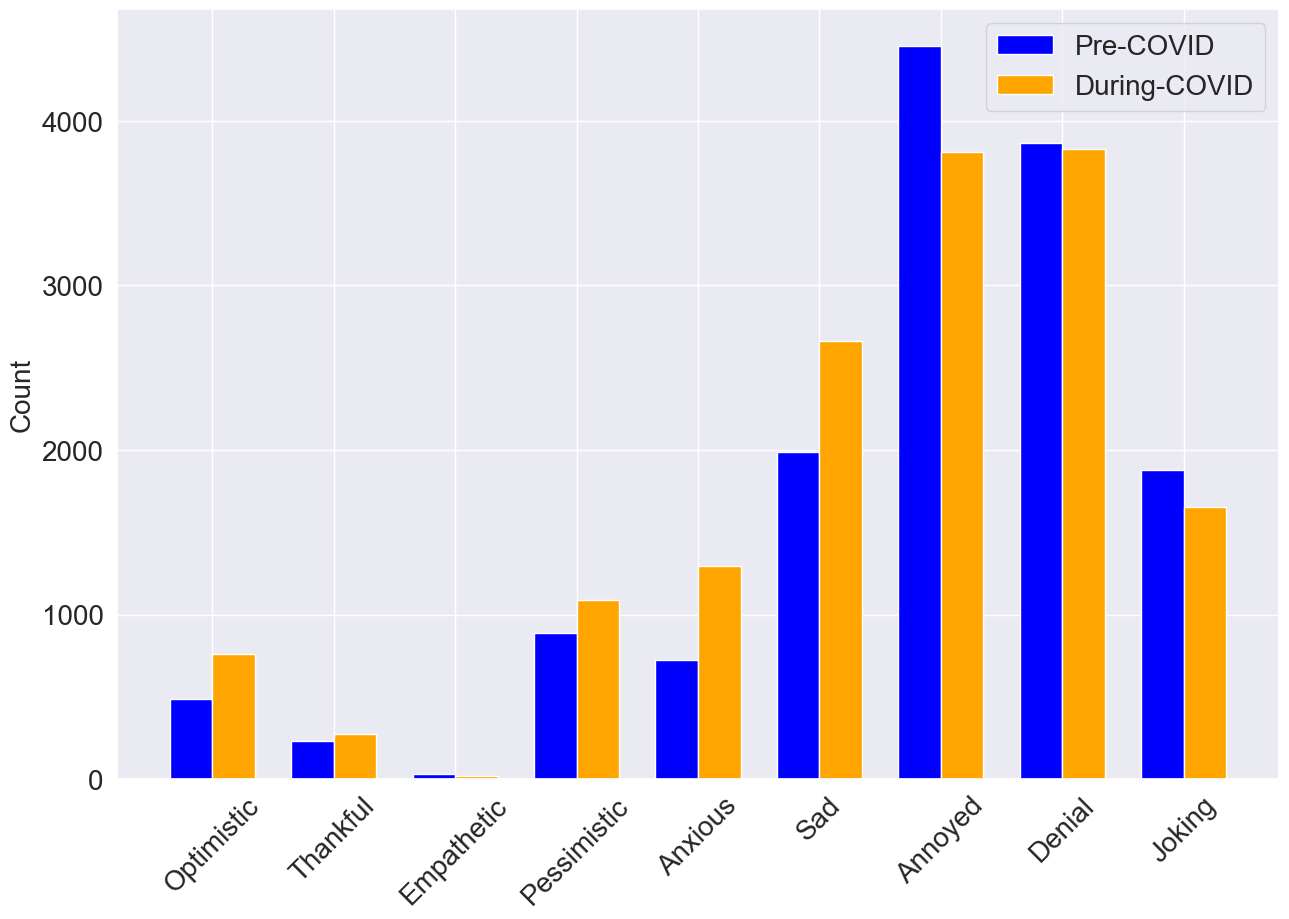

In [ ]:
# 设置x轴的位置和每个条形图的宽度
x = np.arange(len(emotions))
width = 0.35

# 找出所有数据中的最大值
max_value = max(
    max(pre_covid_bert_sent_values), max(during_covid_bert_sent_values)
)

# 创建第一个图形和轴的实例，显示Bert模型的情绪分布
plt.figure(figsize=(15, 10))
plt.bar(x - width/2, pre_covid_bert_sent_values, width, label='Pre-COVID', color='blue')
plt.bar(x + width/2, during_covid_bert_sent_values, width, label='During-COVID', color='orange')

# 添加第一个图形的装饰
plt.ylabel('Count', fontsize=16)
plt.xticks(x, emotions, fontsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.legend(fontsize=16)
#plt.title('Emotion Distribution Pre-COVID vs During-COVID Based on Bert Model', fontsize=16)

plt.show()

# 找出所有数据中的最大值
max_value = max(
    max(pre_covid_roberta_sent_values), max(during_covid_roberta_sent_values)
)

# 创建第二个图形和轴的实例，显示RoBERTa模型的情绪分布
plt.figure(figsize=(15, 10))
plt.bar(x - width/2, pre_covid_roberta_sent_values, width, label='Pre-COVID', color='blue')
plt.bar(x + width/2, during_covid_roberta_sent_values, width, label='During-COVID', color='orange')

# 添加第二个图形的装饰
plt.ylabel('Count', fontsize=20)
plt.xticks(x, emotions, rotation=45,fontsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.legend(fontsize=20)
#plt.title('Emotion Distribution Pre-COVID vs During-COVID Based on RoBERTa Model', fontsize=16)

plt.show()


In [ ]:
aus_bert = bert_data_drop[(bert_data_drop['sectionName']=='Australia news')]
aus_roberta = roberta_data_drop[(roberta_data_drop['sectionName']=='Australia news')]


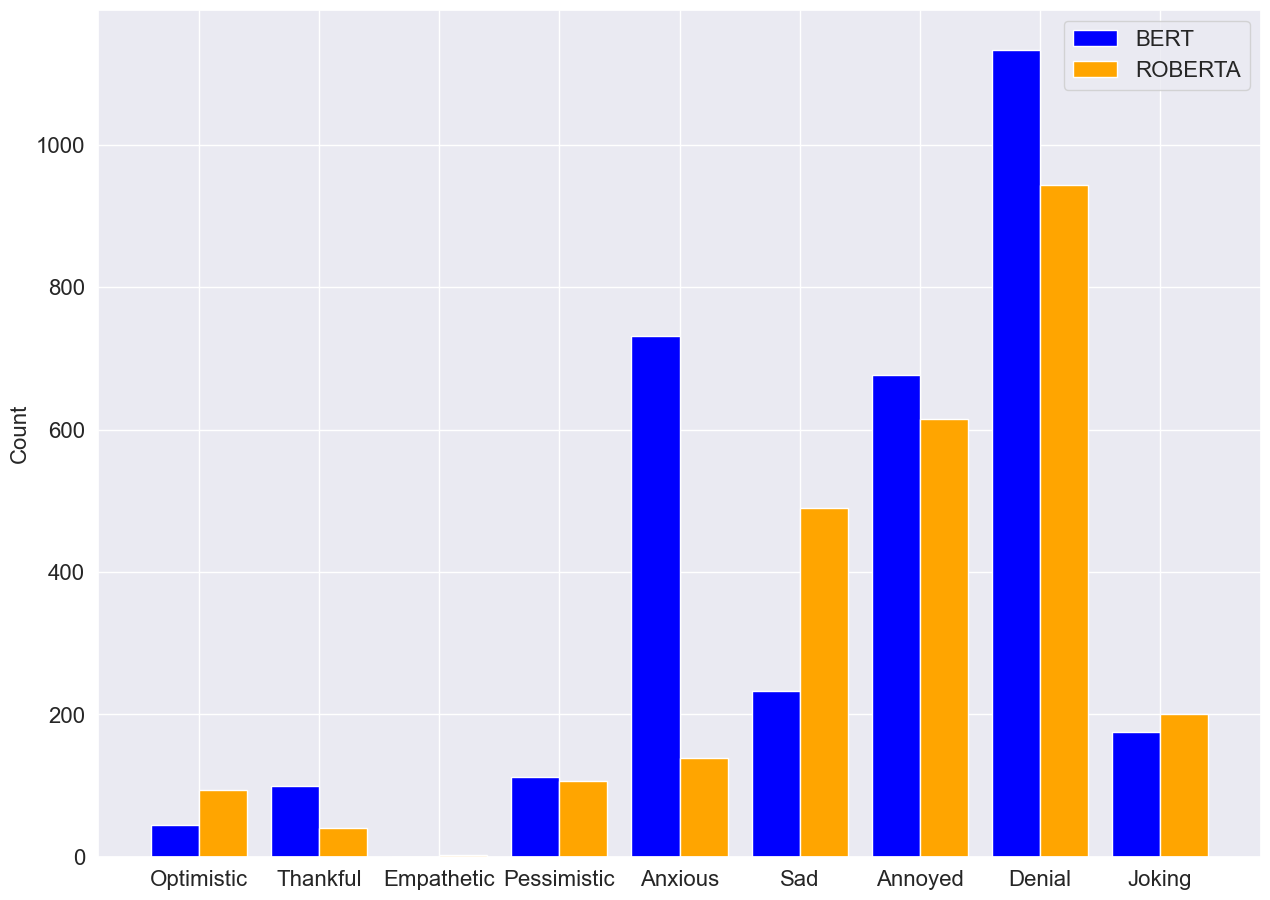

In [ ]:
aus_bert_sent_values = aus_bert.iloc[:, 1:10].sum().values.astype(int)
aus_roberta_sent_values = aus_roberta.iloc[:, 1:10].sum().values.astype(int)
emotions = list(aus_bert.columns[1:10])
x = np.arange(9)
y1 = aus_bert_sent_values
y2 = aus_roberta_sent_values
width = 0.4

plt.figure(figsize = (15, 11))
plt.bar(x-0.2, y1, width, color = 'blue')
plt.bar(x+0.2, y2, width, color = 'orange')
plt.xticks(x, emotions, fontsize = 16)
plt.yticks(fontsize = 16)
#plt.xlabel("Emotion type", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.legend(["BERT","ROBERTA"], fontsize = 16)
plt.show()

In [ ]:
uk_bert = bert_data_drop[(bert_data_drop['sectionName']=='UK news')]
uk_roberta = roberta_data_drop[(roberta_data_drop['sectionName']=='UK news')]

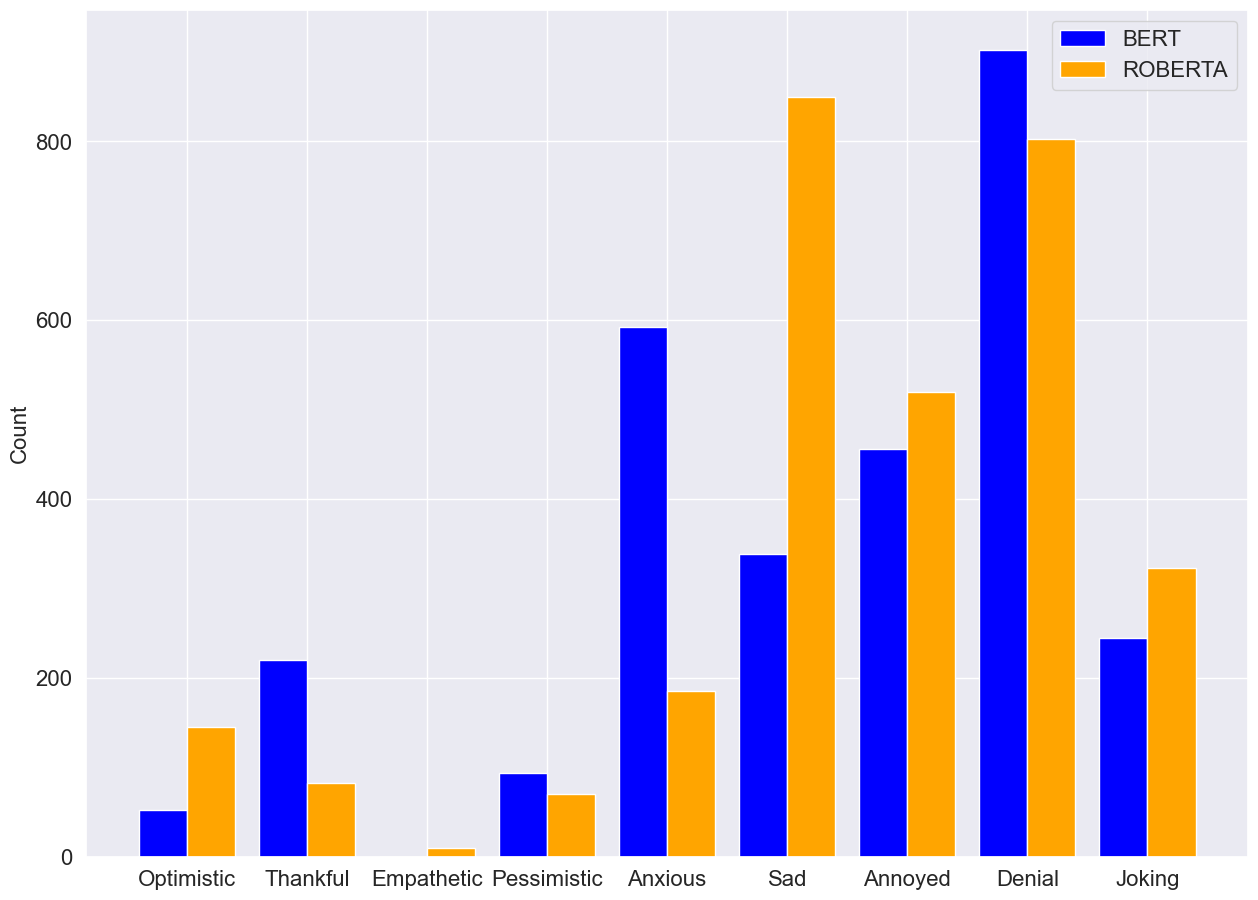

In [ ]:
uk_bert_sent_values = uk_bert.iloc[:, 1:10].sum().values.astype(int)
uk_roberta_sent_values = uk_roberta.iloc[:, 1:10].sum().values.astype(int)
emotions = list(uk_bert.columns[1:10])
x = np.arange(9)
y1 = uk_bert_sent_values
y2 = uk_roberta_sent_values
width = 0.4

plt.figure(figsize = (15, 11))
plt.bar(x-0.2, y1, width, color = 'blue')
plt.bar(x+0.2, y2, width, color = 'orange')
plt.xticks(x, emotions, fontsize = 16)
plt.yticks(fontsize = 16)
#plt.xlabel("Emotion type", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.legend(["BERT","ROBERTA"], fontsize = 16)
plt.show()


In [ ]:
world_bert = bert_data_drop[(bert_data_drop['sectionName']=='World news')]
world_roberta = roberta_data_drop[(roberta_data_drop['sectionName']=='World news')]

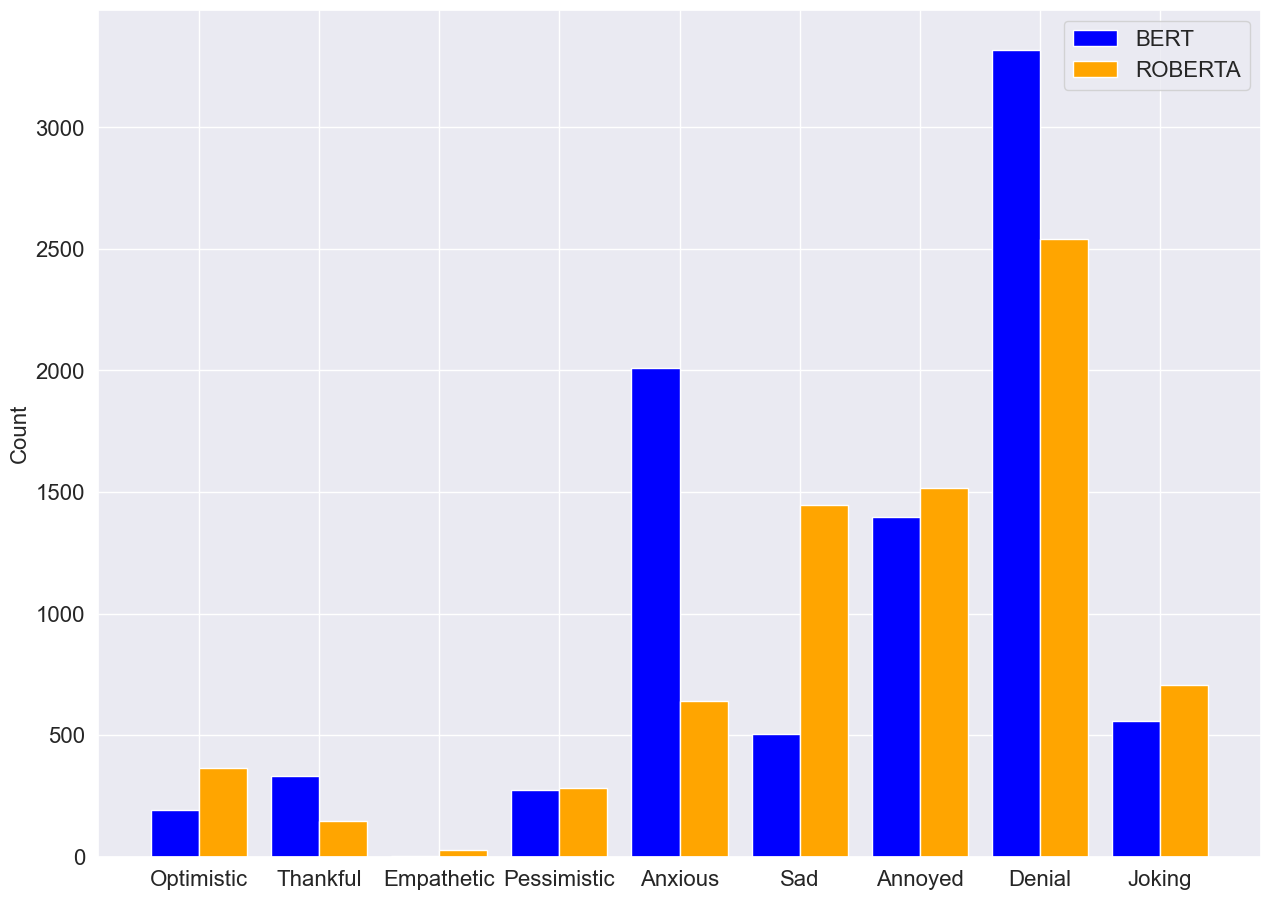

In [ ]:
world_bert_sent_values = world_bert.iloc[:, 1:10].sum().values.astype(int)
world_roberta_sent_values = world_roberta.iloc[:, 1:10].sum().values.astype(int)
emotions = list(world_bert.columns[1:10])
x = np.arange(9)
y1 = world_bert_sent_values
y2 = world_roberta_sent_values
width = 0.4

plt.figure(figsize = (15, 11))
plt.bar(x-0.2, y1, width, color = 'blue')
plt.bar(x+0.2, y2, width, color = 'orange')
plt.xticks(x, emotions, fontsize = 16)
plt.yticks(fontsize = 16)
#plt.xlabel("Emotion type", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.legend(["BERT","ROBERTA"], fontsize = 16)
plt.show()

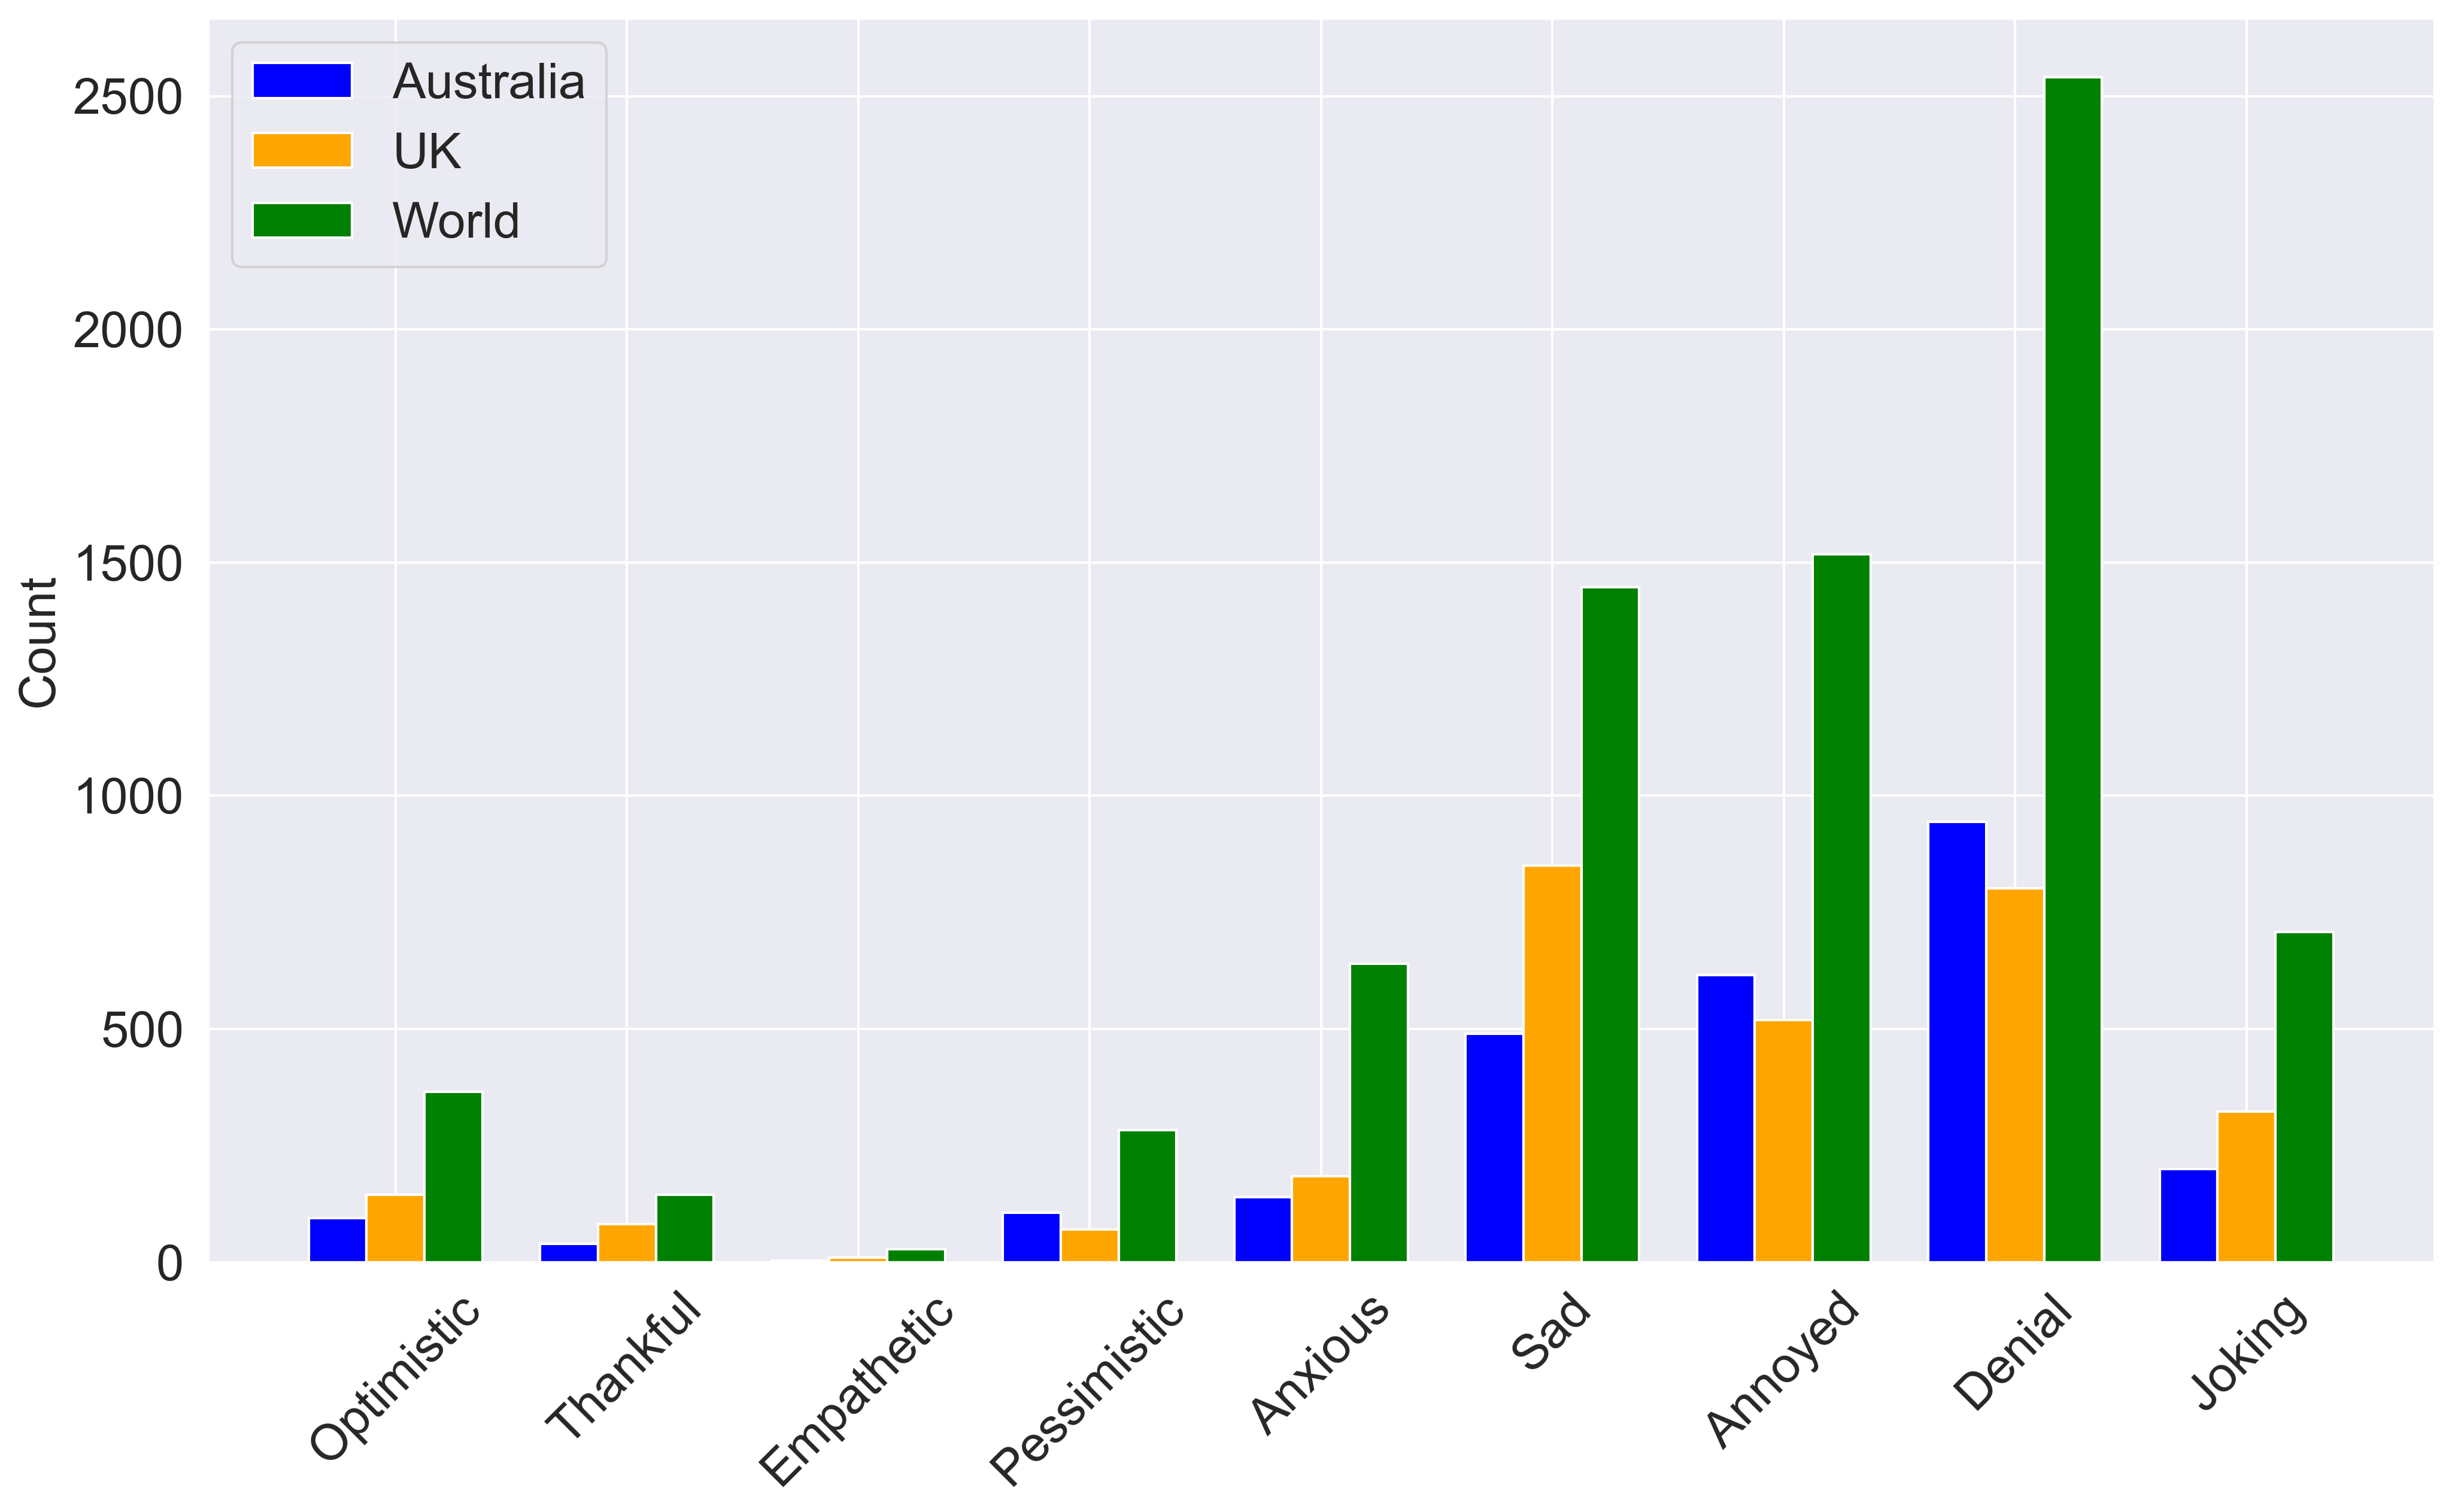

In [ ]:
# 合并不同板块的 RoBERTa 数据
merged_roberta_sent_values = {
    'Australia': aus_roberta_sent_values,
    'UK': uk_roberta_sent_values,
    'World': world_roberta_sent_values
}

# 设置情绪列表和颜色
emotions = list(aus_bert.columns[1:10])
colors = ['blue', 'orange', 'green']  # 你可以根据需要自定义颜色

# 创建图形
plt.figure(figsize=(16, 9),dpi=300)
width = 0.25
# 绘制每个板块的 RoBERTa 数据
for i, (country, values) in enumerate(merged_roberta_sent_values.items()):
    plt.bar(x + i * width, values, width, color=colors[i])

# 设置标签、标题和图例
plt.xticks(x + width, emotions, rotation=45,fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.legend(merged_roberta_sent_values.keys(), fontsize=20)

plt.show()


In [ ]:
opinion_bert = bert_data[(bert_data['sectionName']=='Opinion')]
opinion_roberta = roberta_data[(roberta_data['sectionName']=='Opinion')]

In [ ]:
pre_covid_opinion_bert = opinion_bert[(opinion_bert['webPublicationDate'] >= '2016-1-31') & (opinion_bert['webPublicationDate'] <= '2019-12-31')]
during_covid_bert_data_opinion = opinion_bert[(opinion_bert['webPublicationDate'] >= '2020-01-01') & (opinion_bert['webPublicationDate'] <= '2022-03-23')]
pre_covid_opinion_bert

Tweet  Optimistic  \
11     When former colleagues at the BBC asked me to ...         0.0   
18     When the chief executive of a business declare...         0.0   
19     We meet this evening, says Cassius to Brutus a...         0.0   
20     Rituals are designed not merely to embody but ...         0.0   
31     During the State of the Union speech on Tuesda...         0.0   
...                                                  ...         ...   
17175  When my daughter woke up with a fever and a ra...         1.0   
17177  On Wednesday, the US House of Representatives,...         0.0   
17188  Honest reflection is rarely born from trauma: ...         0.0   
17189  At the start of the election campaign, Boris J...         0.0   
17190  Two of England’s most prestigious Premier Leag...         0.0   

       Thankful  Empathetic  Pessimistic  Anxious  Sad  Annoyed  Denial  \
11          0.0         0.0          0.0      0.0  0.0      0.0     0.0   
18          0.0         0.0          0.0      0.0  0.0      1.0     1.0   
19          0.0         0.0          1.0      0.0  1.0      1.0     0.0   
20          0.0         0.0          0.0      0.0  0.0      1.0     1.0   
31          0.0         0.0          0.0      0.0  0.0      1.0     1.0   
...         ...         ...          ...      ...  ...      ...     ...   
17175       0.0         0.0          0.0      0.0  0.0      0.0     0.0   
17177       0.0         0.0          1.0      0.0  0.0      0.0     1.0   
17188       0.0         0.0          0.0      0.0  0.0      1.0     1.0   
17189       0.0         0.0          0.0      0.0  0.0      0.0     1.0   
17190       0.0         0.0          0.0      0.0  0.0      0.0     1.0   

       Official report  Joking webPublicationDate sectionName year_quarter  \
11                 0.0     1.0         2018-01-31     Opinion      2018-Q1   
18                 0.0     0.0         2018-01-31     Opinion      2018-Q1   
19                 0.0     0.0         2018-01-31     Opinion      2018-Q1   
20                 0.0     0.0         2018-01-31     Opinion      2018-Q1   
31                 0.0     0.0         2018-01-31     Opinion      2018-Q1   
...                ...     ...                ...         ...          ...   
17175              0.0     0.0         2019-12-19     Opinion      2019-Q4   
17177              0.0     0.0         2019-12-19     Opinion      2019-Q4   
17188              0.0     0.0         2019-12-18     Opinion      2019-Q4   
17189              1.0     0.0         2019-12-18     Opinion      2019-Q4   
17190              1.0     0.0         2019-12-18     Opinion      2019-Q4   

       n_emotions  
11              1  
18              2  
19              3  
20              2  
31              2  
...           ...  
17175           1  
17177           2  
17188           2  
17189           2  
17190           2  

[4044 rows x 15 columns]

In [ ]:
during_covid_bert_data_opinion

Tweet  Optimistic  \
17195  Jared Kushner is a genius. It’s all too easy t...         0.0   
17197  We have lost. We’re out. Stark words and a ble...         0.0   
17202  In the lead-up to a recent buck’s party, the g...         1.0   
17207  On 17 January, I met a friend at the Hankou tr...         0.0   
17209  Today marks an end and a beginning. Forty-seve...         0.0   
...                                                  ...         ...   
37915  While all eyes were on another horror, our war...         0.0   
37920  Is truth the first casualty of pandemics? Of a...         0.0   
37927  Haven’t heard of BimboTok? Then it’s time to w...         0.0   
37929  When refugee crises occur, I think of my late ...         0.0   
37935  All big experiences in our lives have two real...         0.0   

       Thankful  Empathetic  Pessimistic  Anxious  Sad  Annoyed  Denial  \
17195       0.0         0.0          0.0      0.0  0.0      1.0     1.0   
17197       0.0         0.0          1.0      0.0  0.0      0.0     0.0   
17202       1.0         0.0          0.0      0.0  0.0      0.0     0.0   
17207       0.0         0.0          0.0      1.0  0.0      0.0     0.0   
17209       0.0         0.0          1.0      0.0  0.0      0.0     0.0   
...         ...         ...          ...      ...  ...      ...     ...   
37915       0.0         0.0          1.0      1.0  0.0      0.0     0.0   
37920       0.0         0.0          0.0      0.0  0.0      0.0     1.0   
37927       0.0         0.0          0.0      0.0  0.0      0.0     0.0   
37929       0.0         0.0          0.0      0.0  0.0      0.0     0.0   
37935       0.0         0.0          1.0      0.0  0.0      0.0     0.0   

       Official report  Joking webPublicationDate sectionName year_quarter  \
17195              0.0     0.0         2020-01-31     Opinion      2020-Q1   
17197              0.0     0.0         2020-01-31     Opinion      2020-Q1   
17202              0.0     1.0         2020-01-31     Opinion      2020-Q1   
17207              0.0     0.0         2020-01-31     Opinion      2020-Q1   
17209              0.0     0.0         2020-01-31     Opinion      2020-Q1   
...                ...     ...                ...         ...          ...   
37915              0.0     0.0         2022-03-23     Opinion      2022-Q1   
37920              0.0     0.0         2022-03-23     Opinion      2022-Q1   
37927              0.0     1.0         2022-03-23     Opinion      2022-Q1   
37929              0.0     0.0         2022-03-23     Opinion      2022-Q1   
37935              0.0     0.0         2022-03-23     Opinion      2022-Q1   

       n_emotions  
17195           2  
17197           1  
17202           3  
17207           1  
17209           1  
...           ...  
37915           2  
37920           1  
37927           1  
37929           0  
37935           1  

[3622 rows x 15 columns]

In [ ]:
pre_covid_opinion_roberta = opinion_roberta[(opinion_roberta['webPublicationDate'] >= '2016-1-31') & (opinion_roberta['webPublicationDate'] <= '2019-12-31')]
during_covid_roberta_opinion = opinion_roberta[(opinion_roberta['webPublicationDate'] >= '2020-01-01') & (opinion_roberta['webPublicationDate'] <= '2022-03-23')]

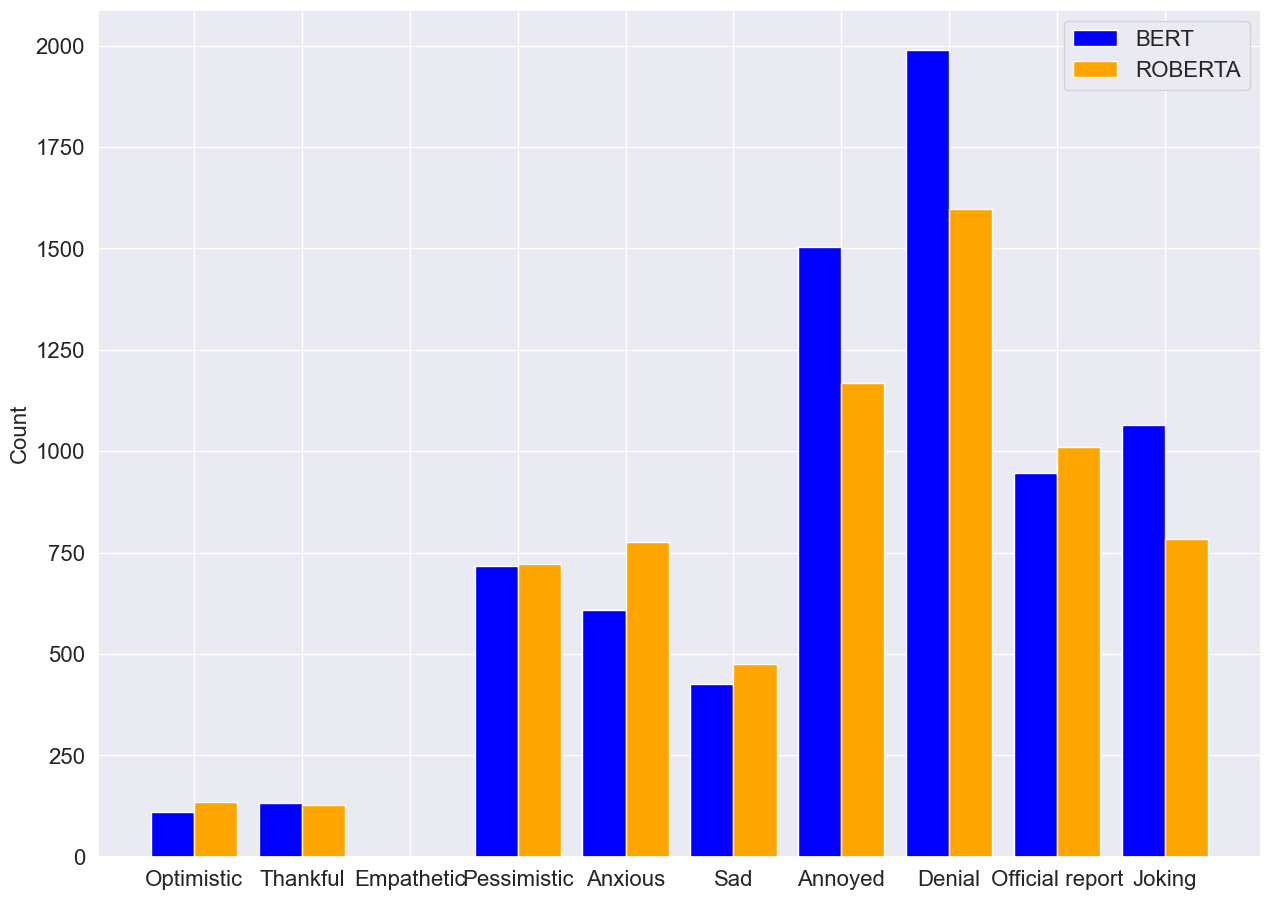

In [ ]:
# Pre-COVID data
opinion_bert_sent_values = pre_covid_opinion_bert.iloc[:, 1:11].sum().values.astype(int)
opinion_roberta_sent_values = during_covid_bert_data_opinion.iloc[:, 1:11].sum().values.astype(int)

emotions = list(opinion_bert.columns[1:11])
x = np.arange(10)
y1_pre = opinion_bert_sent_values
y2_pre = opinion_roberta_sent_values
width = 0.4

# Determine the maximum y-value for consistent plotting
#max_y_value = max(y1_pre.max(), y2_pre.max())

plt.figure(figsize = (15, 11))
plt.bar(x-0.2, y1_pre, width, color = 'blue')
plt.bar(x+0.2, y2_pre, width, color = 'orange')
plt.xticks(x, emotions, fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.legend(["BERT", 'ROBERTA'],fontsize = 16)
#plt.ylim(0, max_y_value)  # Set consistent y-axis limits
plt.show()

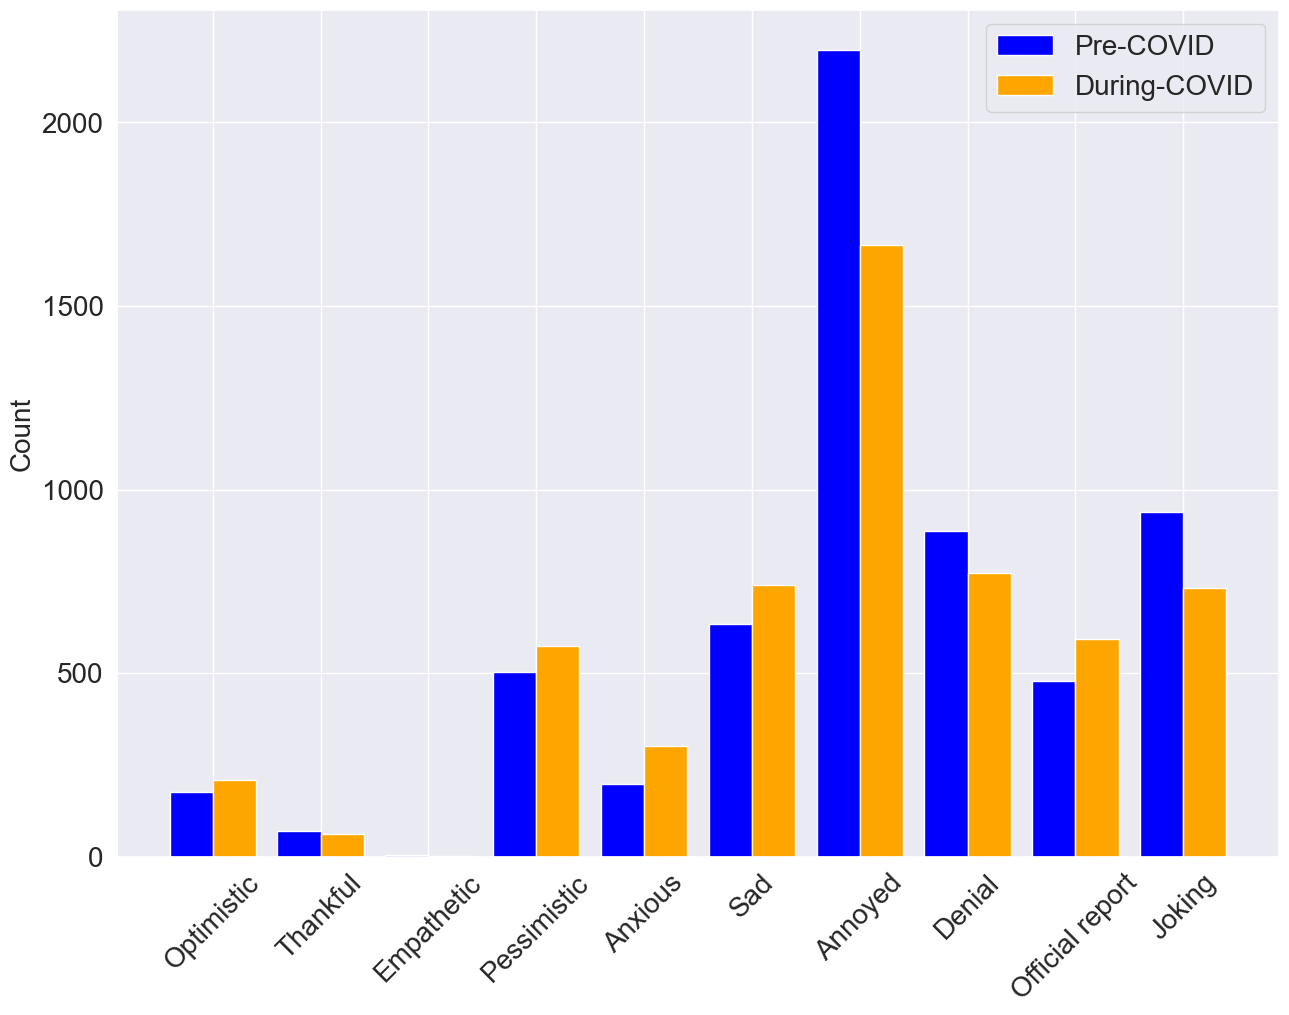

In [ ]:
# During COVID data
# opinion_bert_sent_values = during_covid_bert_data_opinion.iloc[:, 1:11].sum().values.astype(int)
opinion_roberta_sent_values1 = pre_covid_opinion_roberta.iloc[:, 1:11].sum().values.astype(int)
opinion_roberta_sent_values2 = during_covid_roberta_opinion.iloc[:, 1:11].sum().values.astype(int)
y1_pre = opinion_roberta_sent_values1
y2_during = opinion_roberta_sent_values2

plt.figure(figsize = (15, 11))
plt.bar(x-0.2, y1_pre, width, color = 'blue')
plt.bar(x+0.2, y2_during, width, color = 'orange')
plt.xticks(x, emotions, rotation=45,fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.legend(["Pre-COVID", 'During-COVID'], fontsize = 20)
#plt.ylim(0, max_y_value)  # Set consistent y-axis limits
plt.show()

In [ ]:
business_politic_bert = bert_data_drop[(bert_data_drop['sectionName']=='Business')|(bert_data_drop['sectionName']=='Politics')]
business_politic_roberta = roberta_data_drop[(roberta_data_drop['sectionName']=='Business')|(roberta_data_drop['sectionName']=='Politics')]

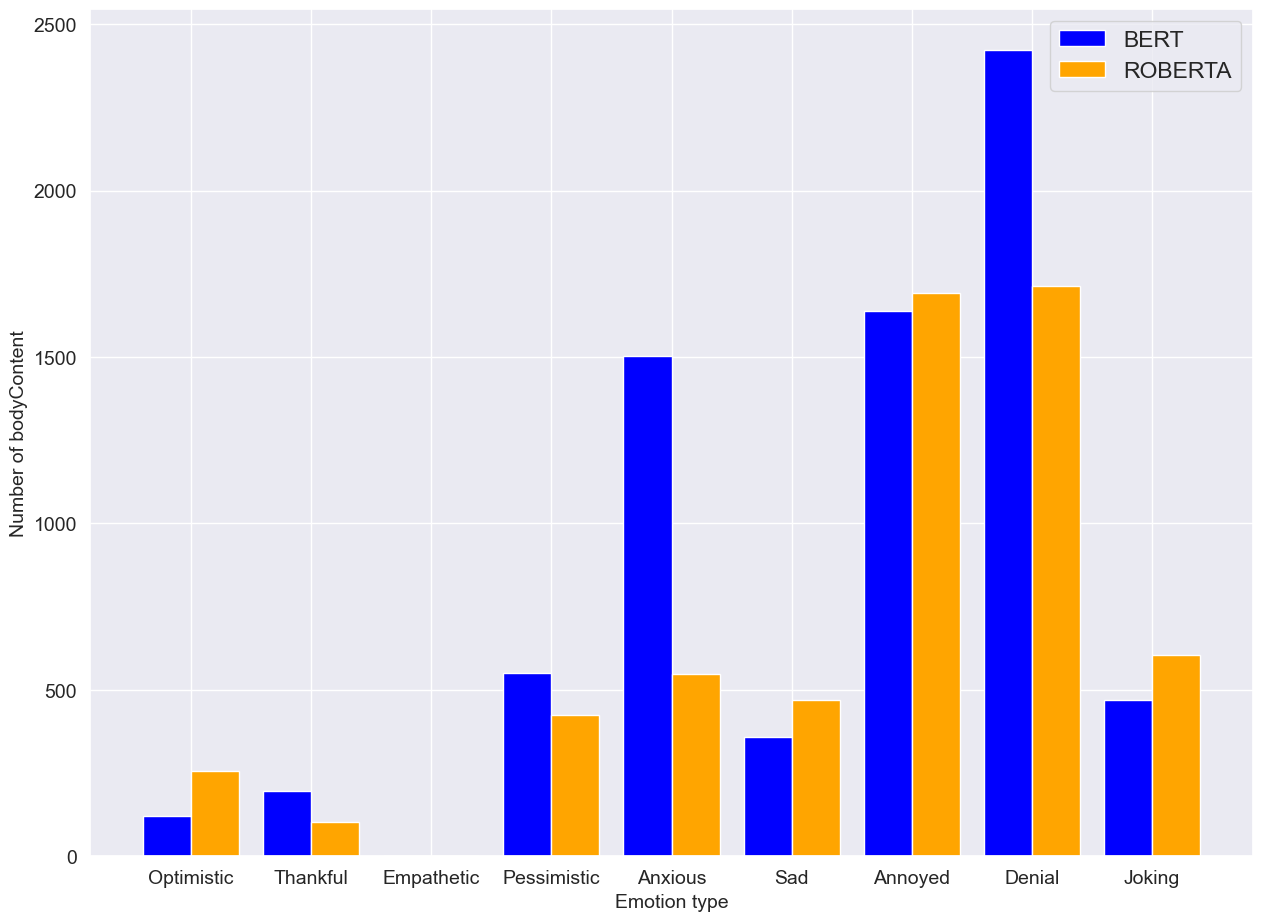

In [ ]:
business_politic_bert_sent_values = business_politic_bert.iloc[:, 1:10].sum().values.astype(int)
business_politic_roberta_sent_values = business_politic_roberta.iloc[:, 1:10].sum().values.astype(int)
emotions = list(business_politic_bert.columns[1:10])
x = np.arange(9)
y1 = business_politic_bert_sent_values
y2 = business_politic_roberta_sent_values
width = 0.4

plt.figure(figsize = (15, 11))
plt.bar(x-0.2, y1, width, color = 'blue')
plt.bar(x+0.2, y2, width, color = 'orange')
plt.xticks(x, emotions, fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel("Emotion type", fontsize = 14)
plt.ylabel("Number of bodyContent", fontsize = 14)
plt.legend(["BERT",'ROBERTA'])
plt.show()

<Axes: >

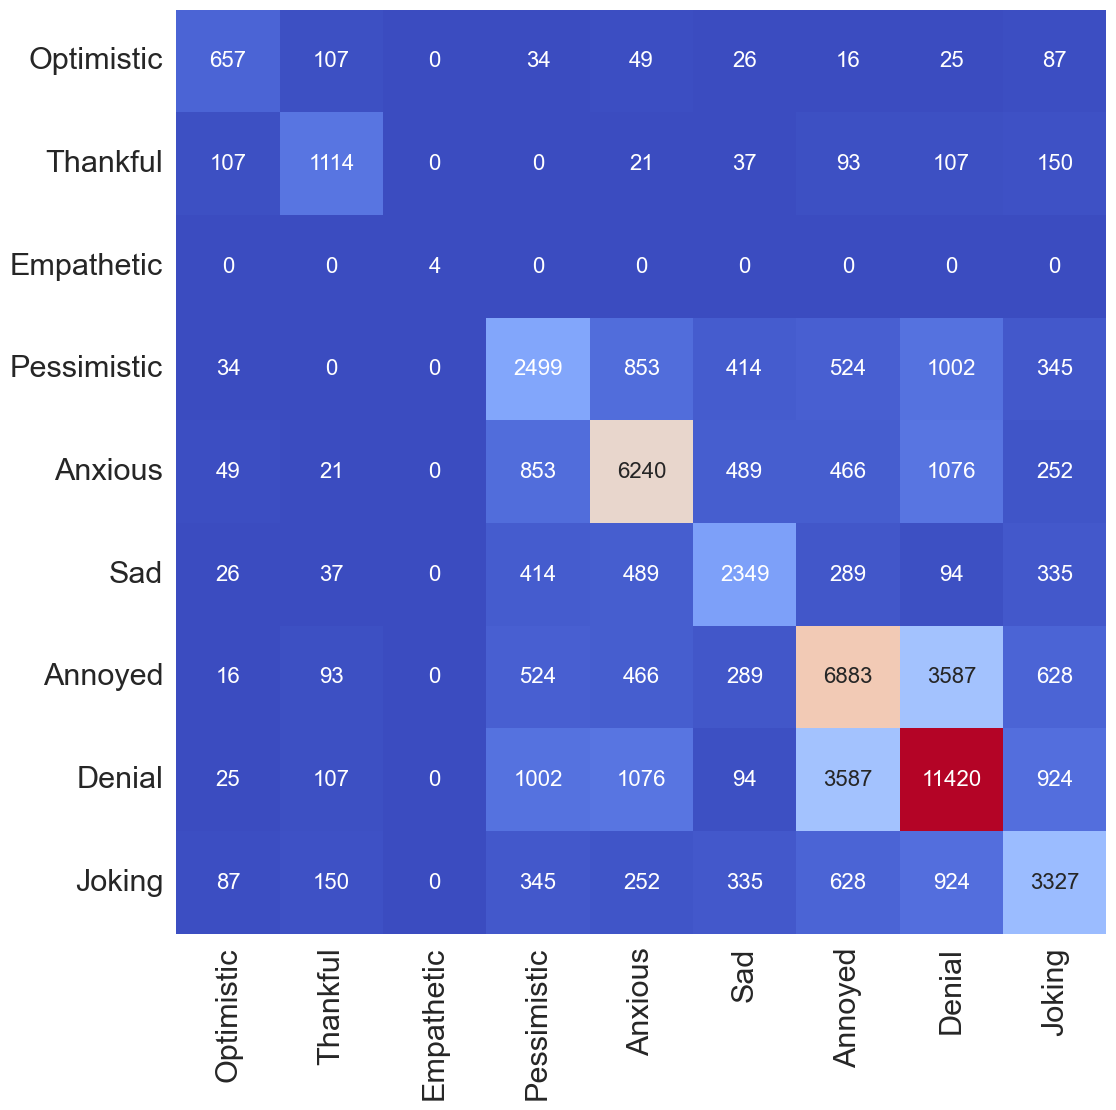

In [ ]:
emotions = list(bert_data_drop.columns[1:10])
only_emotions = bert_data_drop[emotions]
emotion_array = np.zeros((9, 9))
e2i = {
    'Optimistic' : 0, 'Thankful' : 1, 'Empathetic' : 2, 'Pessimistic' : 3, 'Anxious' : 4, 'Sad' : 5, 'Annoyed' : 6, 'Denial' : 7,
    'Joking' : 8
}
for i in range(len(only_emotions)):
    l = only_emotions.iloc[i].tolist()
    for j in range(9):
        if l[j] == 1:
            emotion_array[j][j] += 1
        for k in range(j+1, 9):
            if (l[j] == 1) and (l[k] == 1):
                emotion_array[j][k] += int(1)
                emotion_array[k][j] += int(1)

emote_df = pd.DataFrame(emotion_array, columns = emotions)
for col in emote_df:
    emote_df[col] = emote_df[col].astype(int)
fig = plt.figure(figsize = (12, 12))
sns.set(font_scale = 2)
sns.heatmap(emote_df, annot = True, cmap = 'coolwarm', xticklabels = emote_df.columns, yticklabels = emote_df.columns,
            fmt = 'g', annot_kws = {"size" : 16}, cbar = False, cbar_kws = {"shrink": .8})

<Axes: >

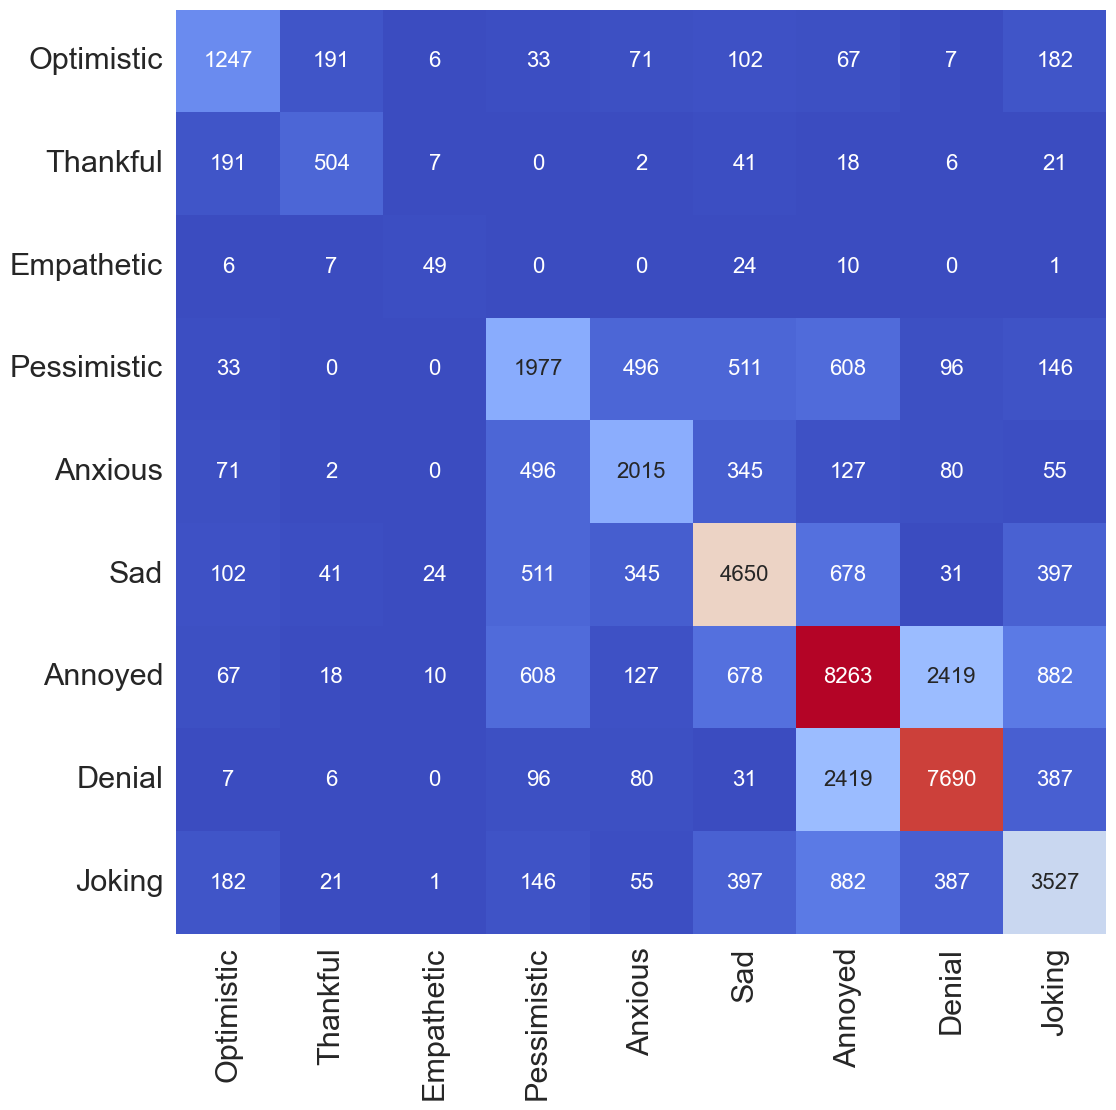

In [ ]:
emotions = list(roberta_data_drop.columns[1:10])
only_emotions = roberta_data_drop[emotions]
emotion_array = np.zeros((9, 9))
e2i = {
    'Optimistic' : 0, 'Thankful' : 1, 'Empathetic' : 2, 'Pessimistic' : 3, 'Anxious' : 4, 'Sad' : 5, 'Annoyed' : 6, 'Denial' : 7,
    'Joking' : 8
}
for i in range(len(only_emotions)):
    l = only_emotions.iloc[i].tolist()
    for j in range(9):
        if l[j] == 1:
            emotion_array[j][j] += 1
        for k in range(j+1, 9):
            if (l[j] == 1) and (l[k] == 1):
                emotion_array[j][k] += int(1)
                emotion_array[k][j] += int(1)

emote_df = pd.DataFrame(emotion_array, columns = emotions)
for col in emote_df:
    emote_df[col] = emote_df[col].astype(int)
fig = plt.figure(figsize = (12, 12))
sns.set(font_scale = 2)
sns.heatmap(emote_df, annot = True, cmap = 'coolwarm', xticklabels = emote_df.columns, yticklabels = emote_df.columns,
            fmt = 'g', annot_kws = {"size" : 16}, cbar = False, cbar_kws = {"shrink": .8})

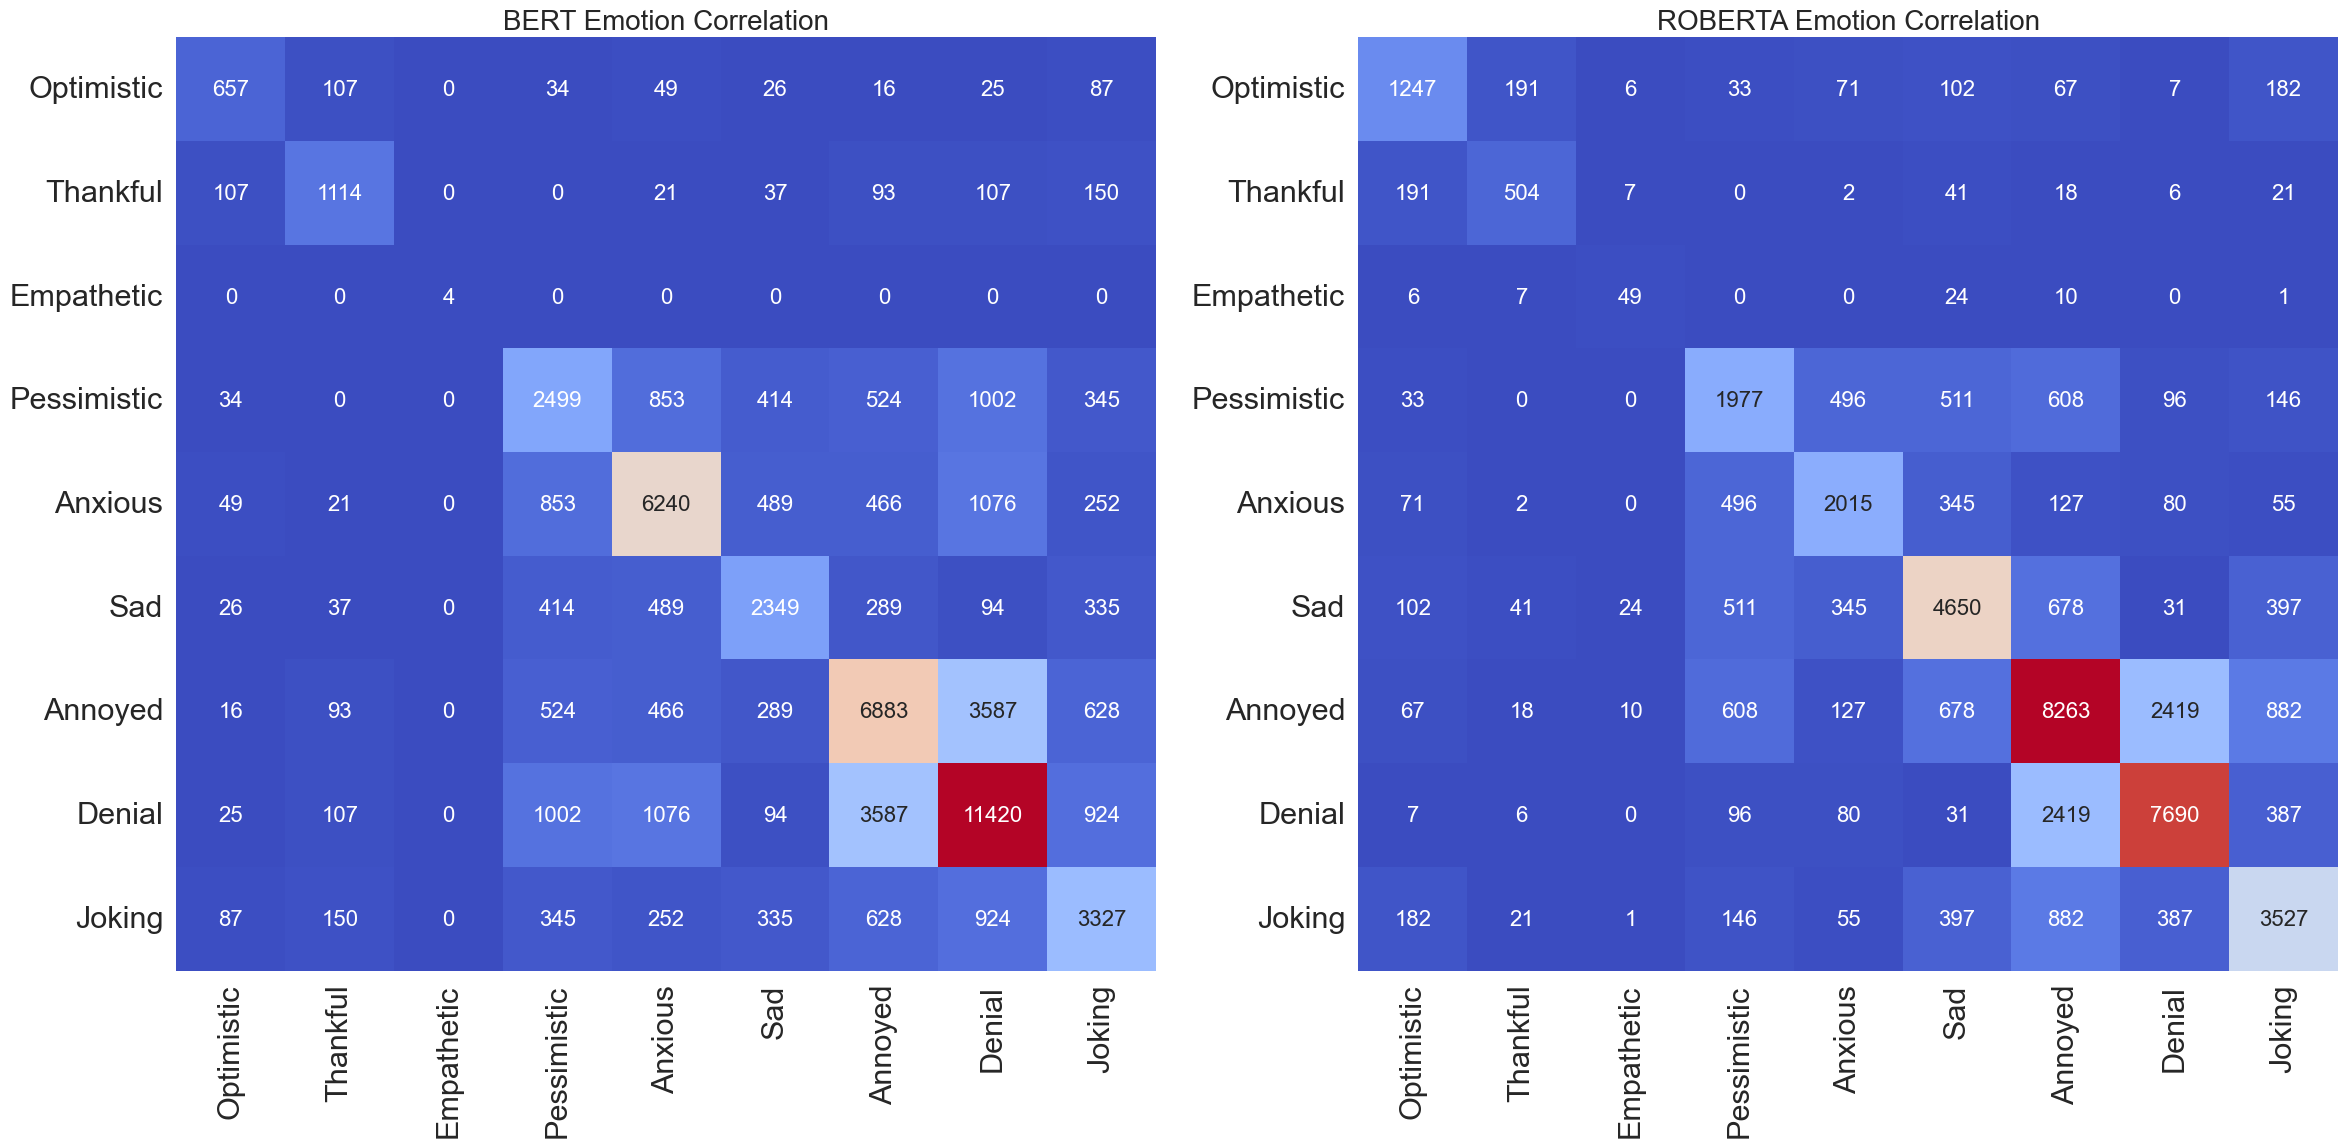

In [ ]:
def process_data(data_drop):
    emotions = list(data_drop.columns[1:10])
    only_emotions = data_drop[emotions]
    emotion_array = np.zeros((9, 9))

    for i in range(len(only_emotions)):
        l = only_emotions.iloc[i].tolist()
        for j in range(9):
            if l[j] == 1:
                emotion_array[j][j] += 1
            for k in range(j+1, 9):
                if (l[j] == 1) and (l[k] == 1):
                    emotion_array[j][k] += 1
                    emotion_array[k][j] += 1

    emote_df = pd.DataFrame(emotion_array, columns=emotions)
    for col in emote_df:
        emote_df[col] = emote_df[col].astype(int)
    return emote_df

# 处理BERT和RoBERTa的数据
bert_emote_df = process_data(bert_data_drop)
roberta_emote_df = process_data(roberta_data_drop)

# 创建一个大的画布和两个子图
fig, axs = plt.subplots(1, 2, figsize=(24, 12))  # 1行2列

# 绘制BERT的热图
sns.heatmap(bert_emote_df, ax=axs[0], annot=True, cmap='coolwarm', xticklabels=bert_emote_df.columns,
            yticklabels=bert_emote_df.columns, fmt='g', annot_kws={"size": 16}, cbar=False, cbar_kws={"shrink": .8})
axs[0].set_title('BERT Emotion Correlation', fontsize=20)

# 绘制RoBERTa的热图
sns.heatmap(roberta_emote_df, ax=axs[1], annot=True, cmap='coolwarm', xticklabels=roberta_emote_df.columns,
            yticklabels=roberta_emote_df.columns, fmt='g', annot_kws={"size": 16}, cbar=False, cbar_kws={"shrink": .8})
axs[1].set_title('ROBERTA Emotion Correlation', fontsize=20)

plt.tight_layout()
plt.show()

<Axes: >

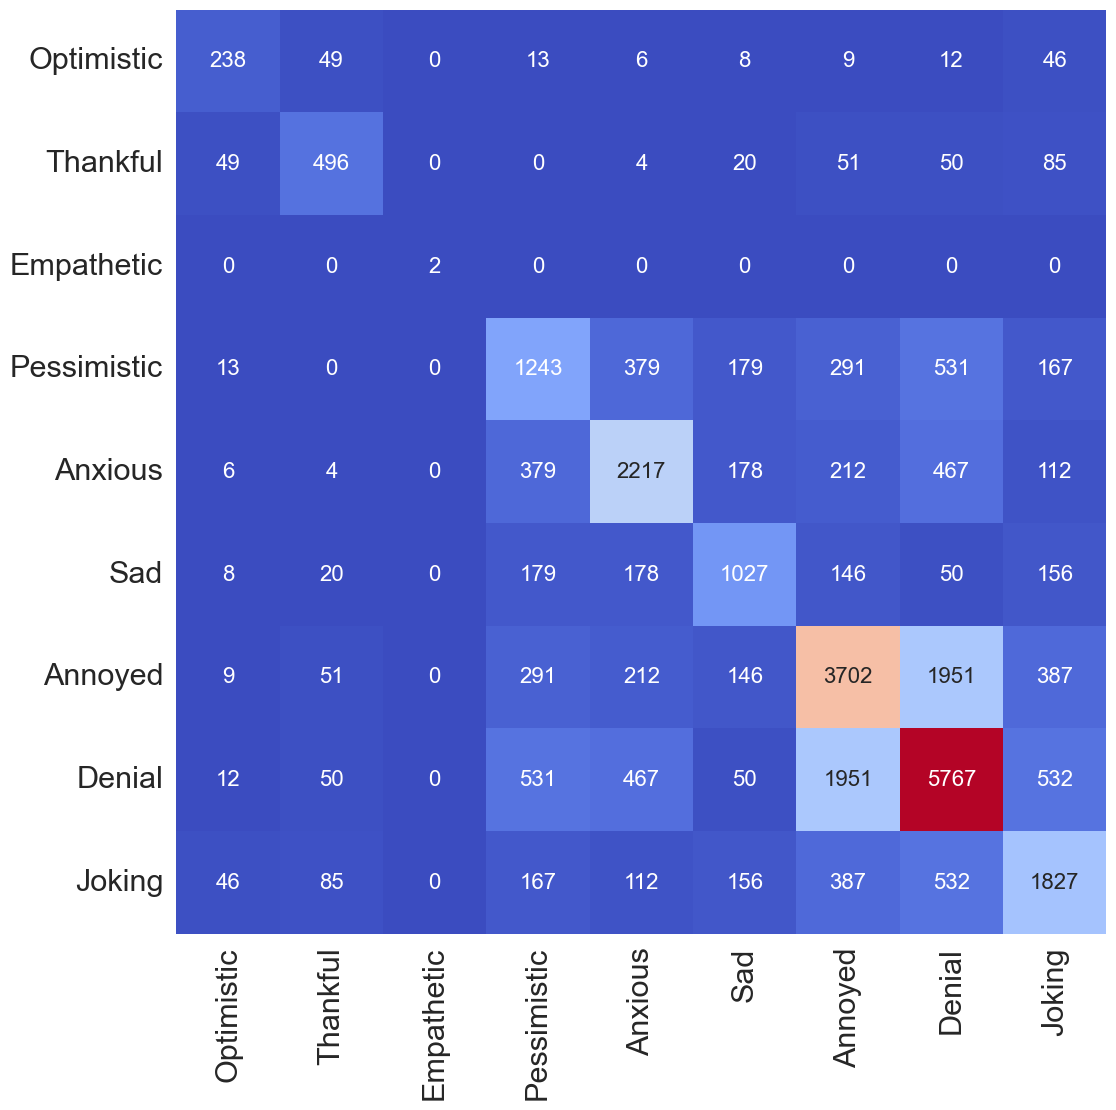

In [ ]:
pre_covid_emotions = list(pre_covid_bert_data.columns[1:10])
only_emotions = pre_covid_bert_data[emotions]

emotion_array = np.zeros((9, 9))
e2i = {
    'Optimistic' : 0, 'Thankful' : 1, 'Empathetic' : 2, 'Pessimistic' : 3, 'Anxious' : 4, 'Sad' : 5, 'Annoyed' : 6, 'Denial' : 7,
    'Joking' : 8
}
for i in range(len(only_emotions)):
    l = only_emotions.iloc[i].tolist()
    for j in range(9):
        if l[j] == 1:
            emotion_array[j][j] += 1
        for k in range(j+1, 9):
            if (l[j] == 1) and (l[k] == 1):
                emotion_array[j][k] += int(1)
                emotion_array[k][j] += int(1)

emote_df_pre_covid = pd.DataFrame(emotion_array, columns = emotions)
for col in emote_df_pre_covid:
    emote_df_pre_covid[col] = emote_df_pre_covid[col].astype(int)

fig = plt.figure(figsize = (12, 12))
sns.set(font_scale = 2)
sns.heatmap(emote_df_pre_covid, annot = True, cmap = 'coolwarm', xticklabels = emote_df_pre_covid.columns, yticklabels = emote_df_pre_covid.columns,
            fmt = 'g', annot_kws = {"size" : 16}, cbar = False, cbar_kws = {"shrink": .8})

<Axes: >

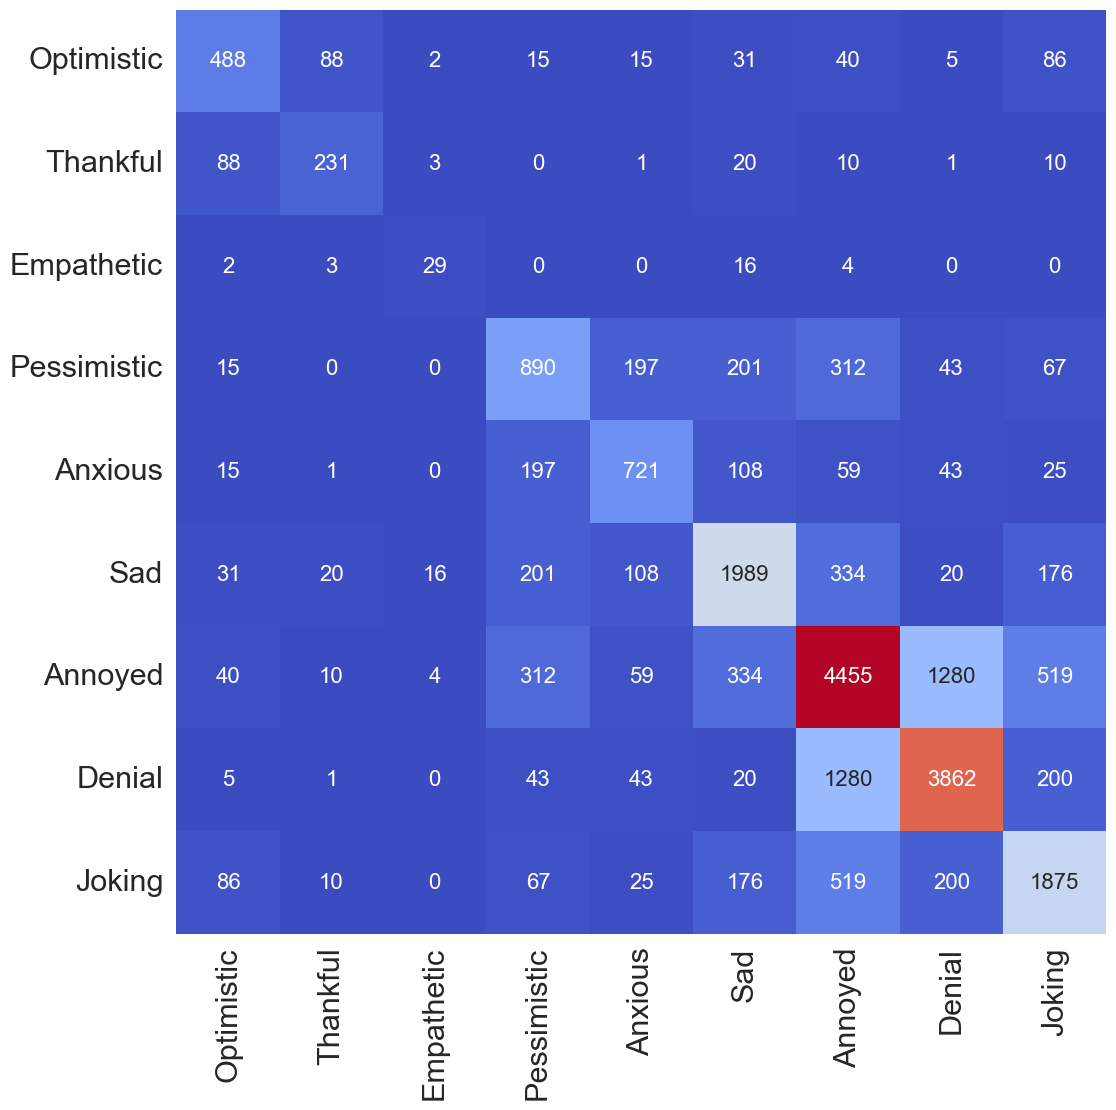

In [ ]:
pre_covid_emotions = list(pre_covid_roberta_data.columns[1:10])
only_emotions = pre_covid_roberta_data[emotions]

emotion_array = np.zeros((9, 9))
e2i = {
    'Optimistic' : 0, 'Thankful' : 1, 'Empathetic' : 2, 'Pessimistic' : 3, 'Anxious' : 4, 'Sad' : 5, 'Annoyed' : 6, 'Denial' : 7,
    'Joking' : 8
}
for i in range(len(only_emotions)):
    l = only_emotions.iloc[i].tolist()
    for j in range(9):
        if l[j] == 1:
            emotion_array[j][j] += 1
        for k in range(j+1, 9):
            if (l[j] == 1) and (l[k] == 1):
                emotion_array[j][k] += int(1)
                emotion_array[k][j] += int(1)

emote_df_pre_covid_roberta = pd.DataFrame(emotion_array, columns = emotions)
for col in emote_df_pre_covid_roberta:
    emote_df_pre_covid_roberta[col] = emote_df_pre_covid_roberta[col].astype(int)

fig = plt.figure(figsize = (12, 12))
sns.set(font_scale = 2)
sns.heatmap(emote_df_pre_covid_roberta, annot = True, cmap = 'coolwarm', xticklabels = emote_df_pre_covid_roberta.columns, yticklabels = emote_df_pre_covid_roberta.columns,
            fmt = 'g', annot_kws = {"size" : 16}, cbar = False, cbar_kws = {"shrink": .8})

<Axes: >

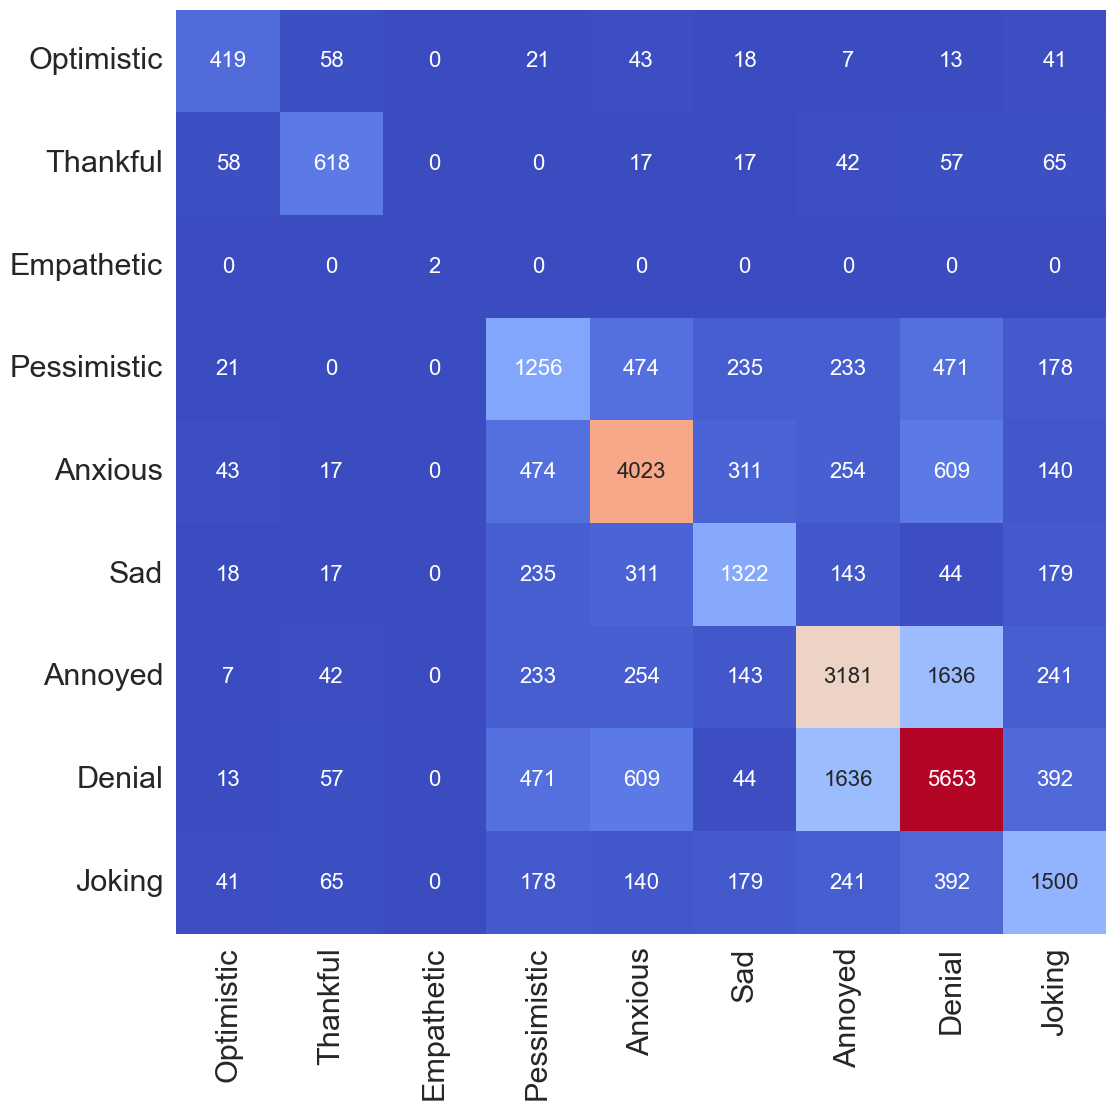

In [ ]:
during_covid_emotions = list(during_covid_bert_data.columns[1:10])
only_emotions = during_covid_bert_data[emotions]

emotion_array = np.zeros((9, 9))
e2i = {
    'Optimistic' : 0, 'Thankful' : 1, 'Empathetic' : 2, 'Pessimistic' : 3, 'Anxious' : 4, 'Sad' : 5, 'Annoyed' : 6, 'Denial' : 7,
    'Joking' : 8
}
for i in range(len(only_emotions)):
    l = only_emotions.iloc[i].tolist()
    for j in range(9):
        if l[j] == 1:
            emotion_array[j][j] += 1
        for k in range(j+1, 9):
            if (l[j] == 1) and (l[k] == 1):
                emotion_array[j][k] += int(1)
                emotion_array[k][j] += int(1)

during_covid_emote_df = pd.DataFrame(emotion_array, columns = emotions)
for col in during_covid_emote_df:
    during_covid_emote_df[col] = during_covid_emote_df[col].astype(int)

fig = plt.figure(figsize = (12, 12))
sns.set(font_scale = 2)
sns.heatmap(during_covid_emote_df, annot = True, cmap = 'coolwarm', xticklabels = during_covid_emote_df.columns, yticklabels = during_covid_emote_df.columns,
            fmt = 'g', annot_kws = {"size" : 16}, cbar = False, cbar_kws = {"shrink": .8})

<Axes: >

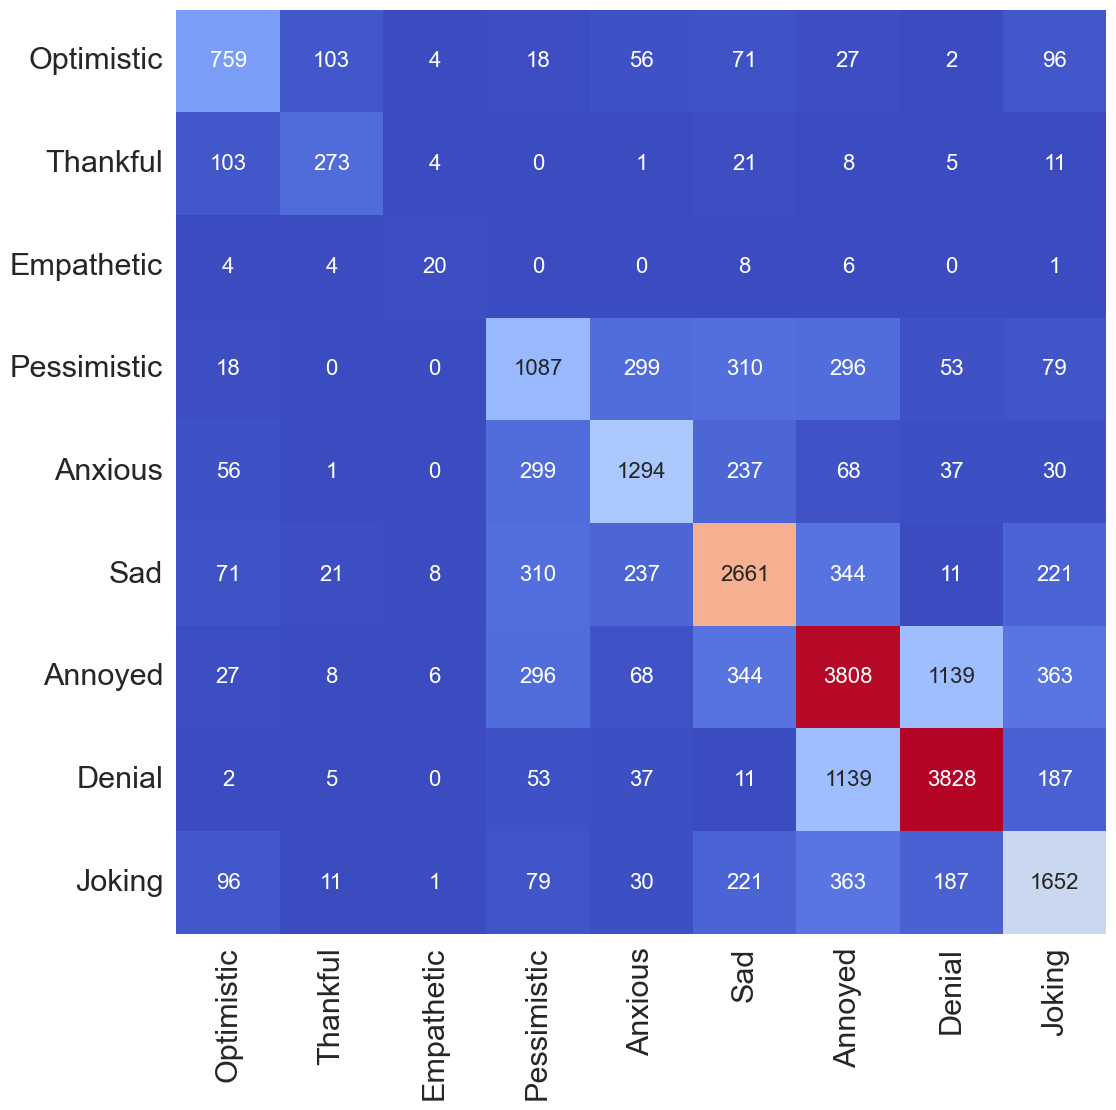

In [ ]:
during_covid_emotions = list(during_covid_roberta_data.columns[1:10])
only_emotions = during_covid_roberta_data[emotions]

emotion_array = np.zeros((9, 9))
e2i = {
    'Optimistic' : 0, 'Thankful' : 1, 'Empathetic' : 2, 'Pessimistic' : 3, 'Anxious' : 4, 'Sad' : 5, 'Annoyed' : 6, 'Denial' : 7,
    'Joking' : 8
}
for i in range(len(only_emotions)):
    l = only_emotions.iloc[i].tolist()
    for j in range(9):
        if l[j] == 1:
            emotion_array[j][j] += 1
        for k in range(j+1, 9):
            if (l[j] == 1) and (l[k] == 1):
                emotion_array[j][k] += int(1)
                emotion_array[k][j] += int(1)

during_covid_emote_df_roberta = pd.DataFrame(emotion_array, columns = emotions)
for col in during_covid_emote_df_roberta:
    during_covid_emote_df_roberta[col] = during_covid_emote_df_roberta[col].astype(int)

fig = plt.figure(figsize = (12, 12))
sns.set(font_scale = 2)
sns.heatmap(during_covid_emote_df_roberta, annot = True, cmap = 'coolwarm', xticklabels = during_covid_emote_df_roberta.columns, yticklabels = during_covid_emote_df_roberta.columns,
            fmt = 'g', annot_kws = {"size" : 16}, cbar = False, cbar_kws = {"shrink": .8})

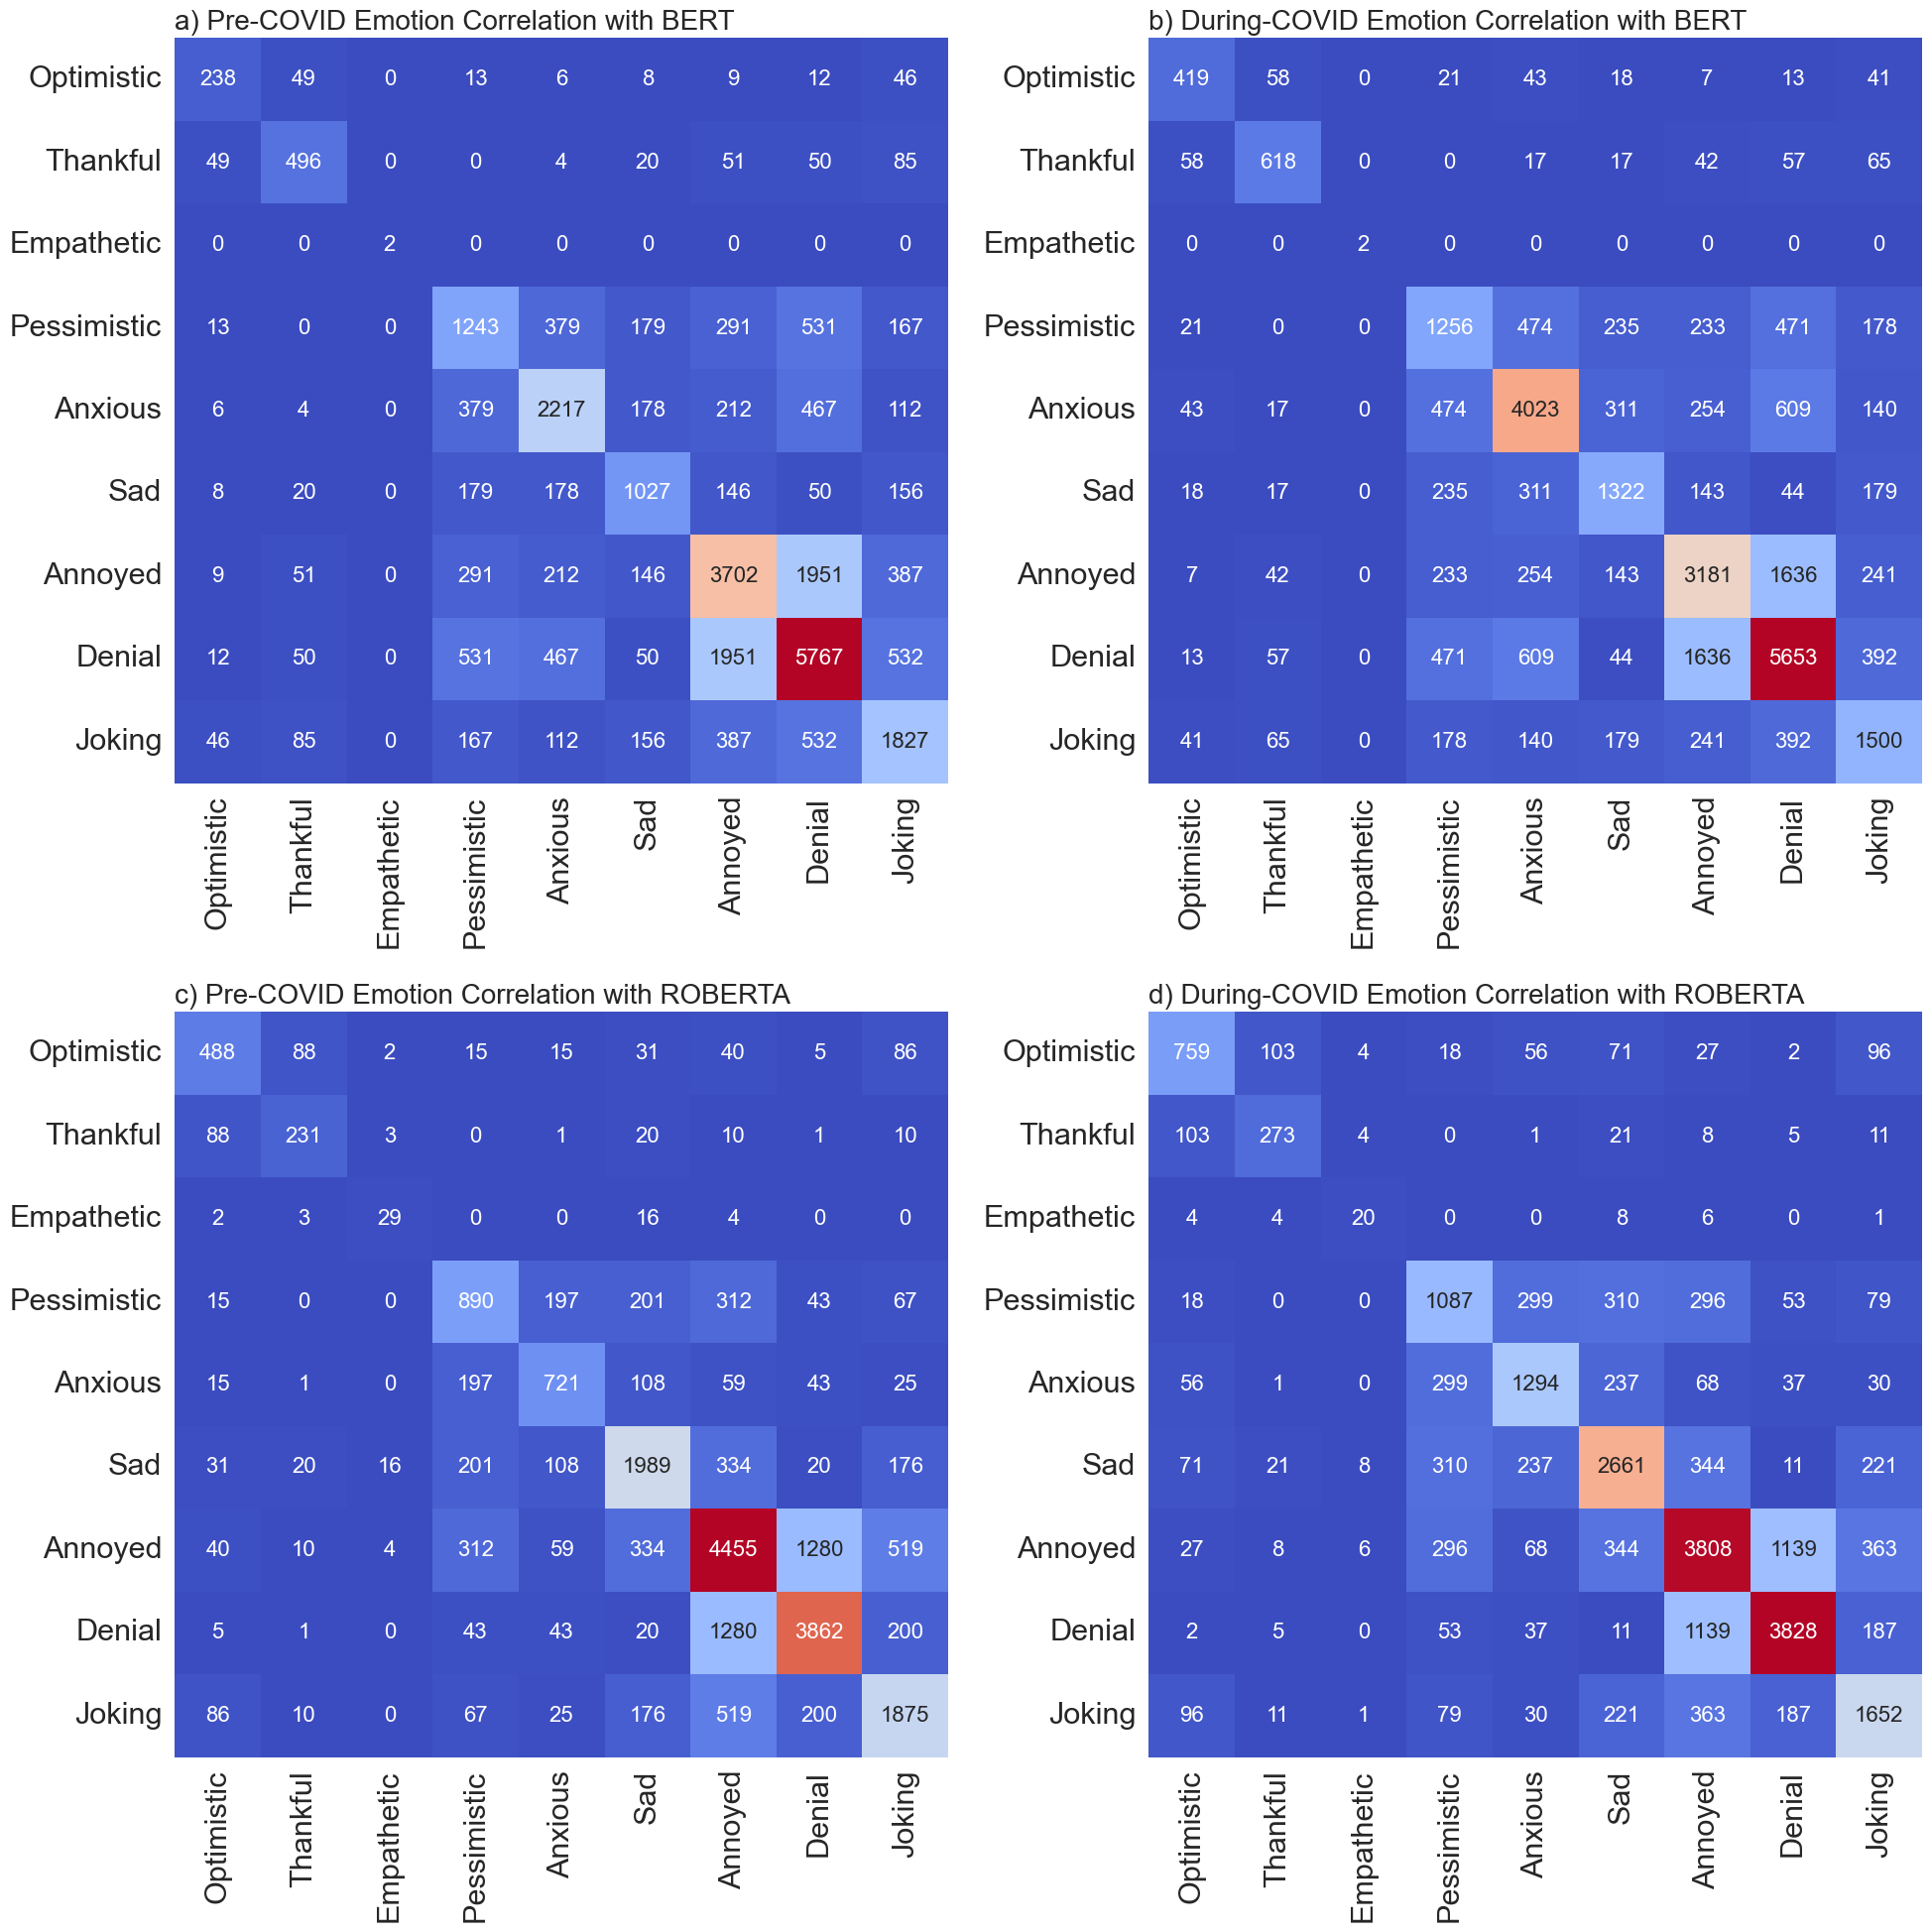

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(20, 20))  # 创建2行2列的子图布局

# Pre-COVID情感热图
sns.heatmap(emote_df_pre_covid, annot=True, cmap='coolwarm',
            xticklabels=emote_df_pre_covid.columns, yticklabels=emote_df_pre_covid.columns,
            fmt='g', annot_kws={"size": 16}, cbar=False,
            ax=axs[0, 0])  # 使用ax参数在指定的子图上绘制
axs[0, 0].set_title('a) Pre-COVID Emotion Correlation with BERT', loc='left', fontsize=20)

# During-COVID情感热图
sns.heatmap(during_covid_emote_df, annot=True, cmap='coolwarm',
            xticklabels=during_covid_emote_df.columns, yticklabels=during_covid_emote_df.columns,
            fmt='g', annot_kws={"size": 16}, cbar=False,
            ax=axs[0, 1])  # 使用ax参数在指定的子图上绘制
axs[0, 1].set_title('b) During-COVID Emotion Correlation with BERT', loc='left', fontsize=20)

# Pre-COVID情感热图，使用RoBERTa模型
sns.heatmap(emote_df_pre_covid_roberta, annot=True, cmap='coolwarm',
            xticklabels=emote_df_pre_covid_roberta.columns, yticklabels=emote_df_pre_covid_roberta.columns,
            fmt='g', annot_kws={"size": 16}, cbar=False,
            ax=axs[1, 0])  # 使用ax参数在指定的子图上绘制
axs[1, 0].set_title('c) Pre-COVID Emotion Correlation with ROBERTA', loc='left', fontsize=20)

# During-COVID情感热图，使用RoBERTa模型
sns.heatmap(during_covid_emote_df_roberta, annot=True, cmap='coolwarm',
            xticklabels=during_covid_emote_df_roberta.columns, yticklabels=during_covid_emote_df_roberta.columns,
            fmt='g', annot_kws={"size": 16}, cbar=False,
            ax=axs[1, 1])  # 使用ax参数在指定的子图上绘制
axs[1, 1].set_title('d) During-COVID Emotion Correlation with ROBERTA', loc='left', fontsize=20)

plt.tight_layout()
plt.show()


<Axes: >

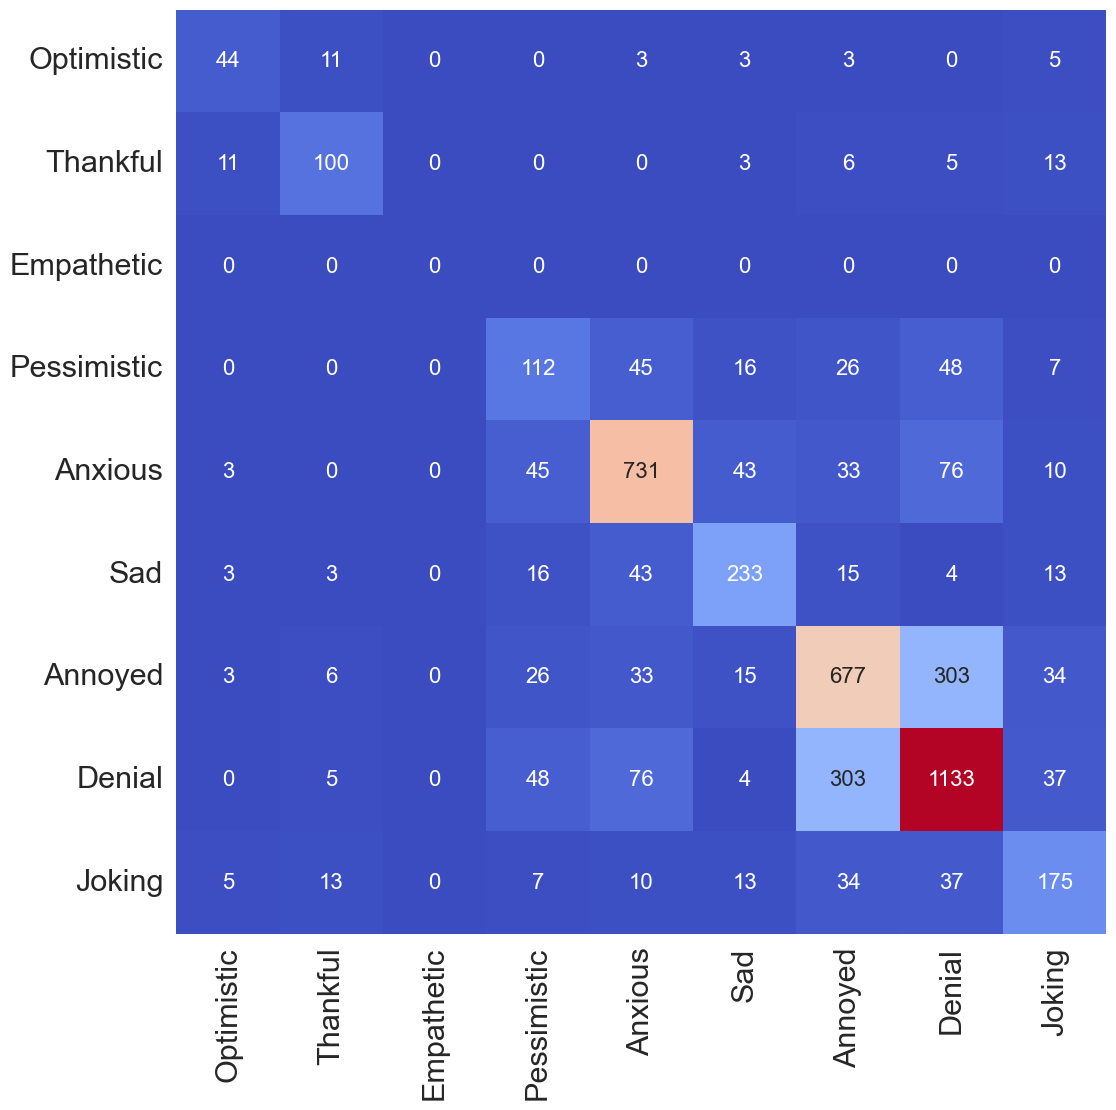

In [ ]:
aus_emotions = list(aus_bert.columns[1:10])
only_emotions = aus_bert[emotions]

emotion_array = np.zeros((9, 9))
e2i = {
    'Optimistic' : 0, 'Thankful' : 1, 'Empathetic' : 2, 'Pessimistic' : 3, 'Anxious' : 4, 'Sad' : 5, 'Annoyed' : 6, 'Denial' : 7,
    'Joking' : 8
}
for i in range(len(only_emotions)):
    l = only_emotions.iloc[i].tolist()
    for j in range(9):
        if l[j] == 1:
            emotion_array[j][j] += 1
        for k in range(j+1, 9):
            if (l[j] == 1) and (l[k] == 1):
                emotion_array[j][k] += int(1)
                emotion_array[k][j] += int(1)

emote_df_au = pd.DataFrame(emotion_array, columns = emotions)
for col in emote_df_au:
    emote_df_au[col] = emote_df_au[col].astype(int)
fig = plt.figure(figsize = (12, 12))
sns.set(font_scale = 2)
sns.heatmap(emote_df_au, annot = True, cmap = 'coolwarm', xticklabels = emote_df_au.columns, yticklabels = emote_df_au.columns,
            fmt = 'g', annot_kws = {"size" : 16}, cbar = False, cbar_kws = {"shrink": .8})

<Axes: >

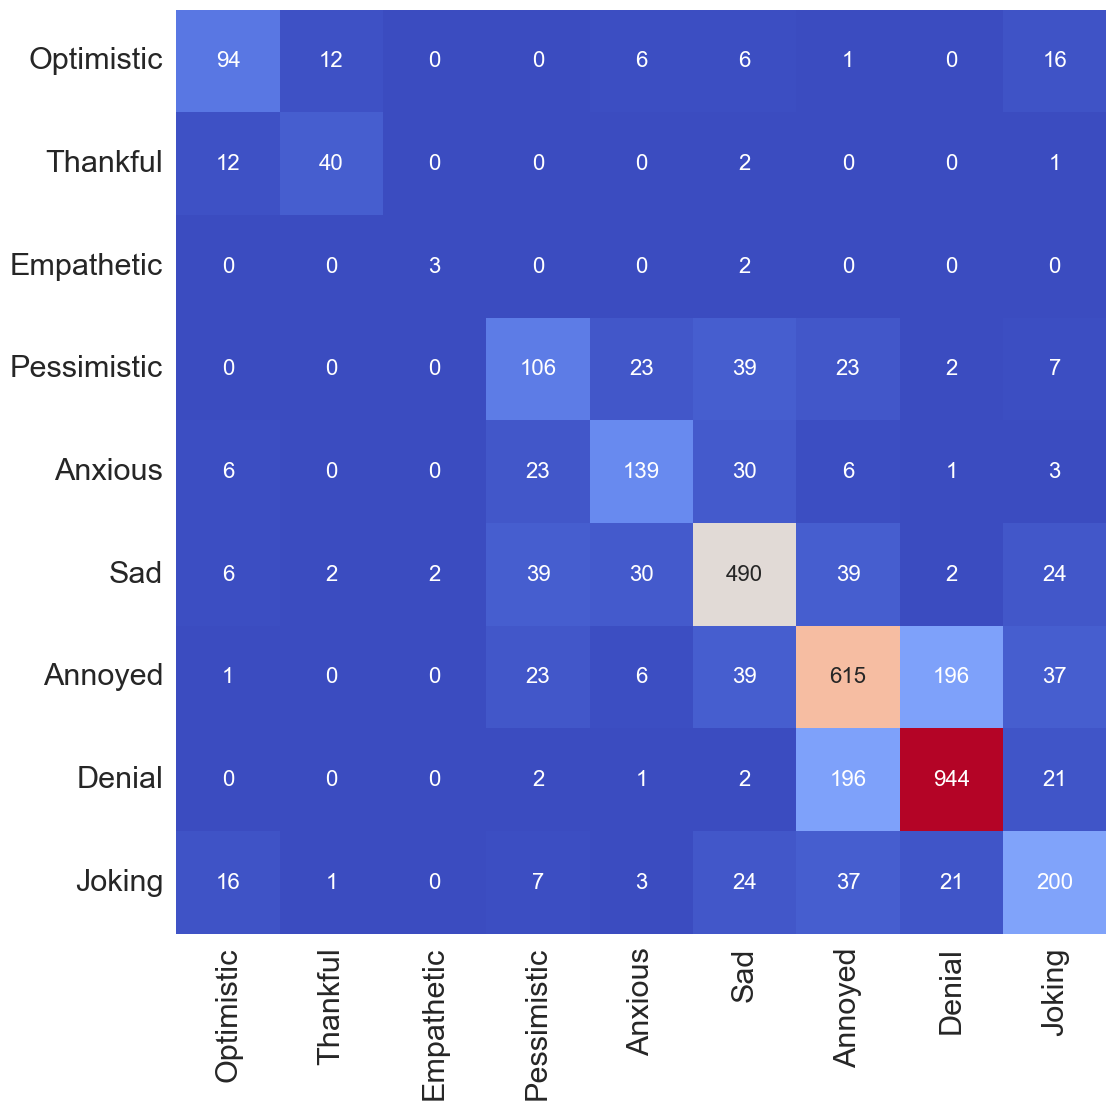

In [ ]:
aus_emotions = list(aus_roberta.columns[1:10])
only_emotions = aus_roberta[emotions]

emotion_array = np.zeros((9, 9))
e2i = {
    'Optimistic' : 0, 'Thankful' : 1, 'Empathetic' : 2, 'Pessimistic' : 3, 'Anxious' : 4, 'Sad' : 5, 'Annoyed' : 6, 'Denial' : 7,
    'Joking' : 8
}
for i in range(len(only_emotions)):
    l = only_emotions.iloc[i].tolist()
    for j in range(9):
        if l[j] == 1:
            emotion_array[j][j] += 1
        for k in range(j+1, 9):
            if (l[j] == 1) and (l[k] == 1):
                emotion_array[j][k] += int(1)
                emotion_array[k][j] += int(1)

emote_df_au_roberta = pd.DataFrame(emotion_array, columns = emotions)
for col in emote_df_au_roberta:
    emote_df_au_roberta[col] = emote_df_au_roberta[col].astype(int)
fig = plt.figure(figsize = (12, 12))
sns.set(font_scale = 2)
sns.heatmap(emote_df_au_roberta, annot = True, cmap = 'coolwarm', xticklabels = emote_df_au_roberta.columns, yticklabels = emote_df_au_roberta.columns,
            fmt = 'g', annot_kws = {"size" : 16}, cbar = False, cbar_kws = {"shrink": .8})

<Axes: >

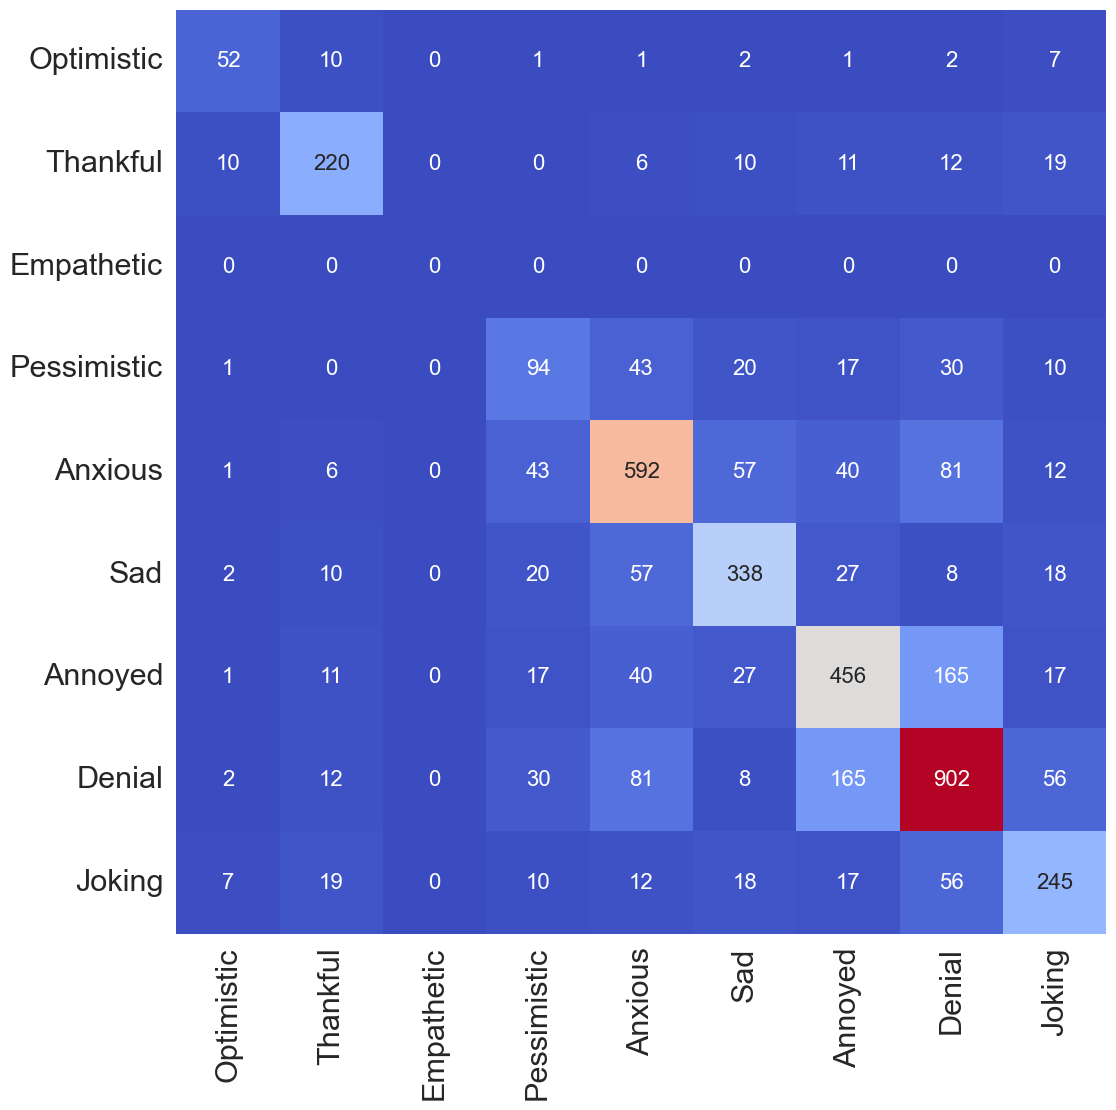

In [ ]:
uk_emotions = list(uk_bert.columns[1:10])
only_emotions = uk_bert[emotions]

emotion_array = np.zeros((9, 9))
e2i = {
    'Optimistic' : 0, 'Thankful' : 1, 'Empathetic' : 2, 'Pessimistic' : 3, 'Anxious' : 4, 'Sad' : 5, 'Annoyed' : 6, 'Denial' : 7,
    'Joking' : 8
}
for i in range(len(only_emotions)):
    l = only_emotions.iloc[i].tolist()
    for j in range(9):
        if l[j] == 1:
            emotion_array[j][j] += 1
        for k in range(j+1, 9):
            if (l[j] == 1) and (l[k] == 1):
                emotion_array[j][k] += int(1)
                emotion_array[k][j] += int(1)

emote_df_uk = pd.DataFrame(emotion_array, columns = emotions)
for col in emote_df_uk:
    emote_df_uk[col] = emote_df_uk[col].astype(int)
fig = plt.figure(figsize = (12, 12))
sns.set(font_scale = 2)
sns.heatmap(emote_df_uk, annot = True, cmap = 'coolwarm', xticklabels = emote_df_uk.columns, yticklabels = emote_df_uk.columns,
            fmt = 'g', annot_kws = {"size" : 16}, cbar = False, cbar_kws = {"shrink": .8})

<Axes: >

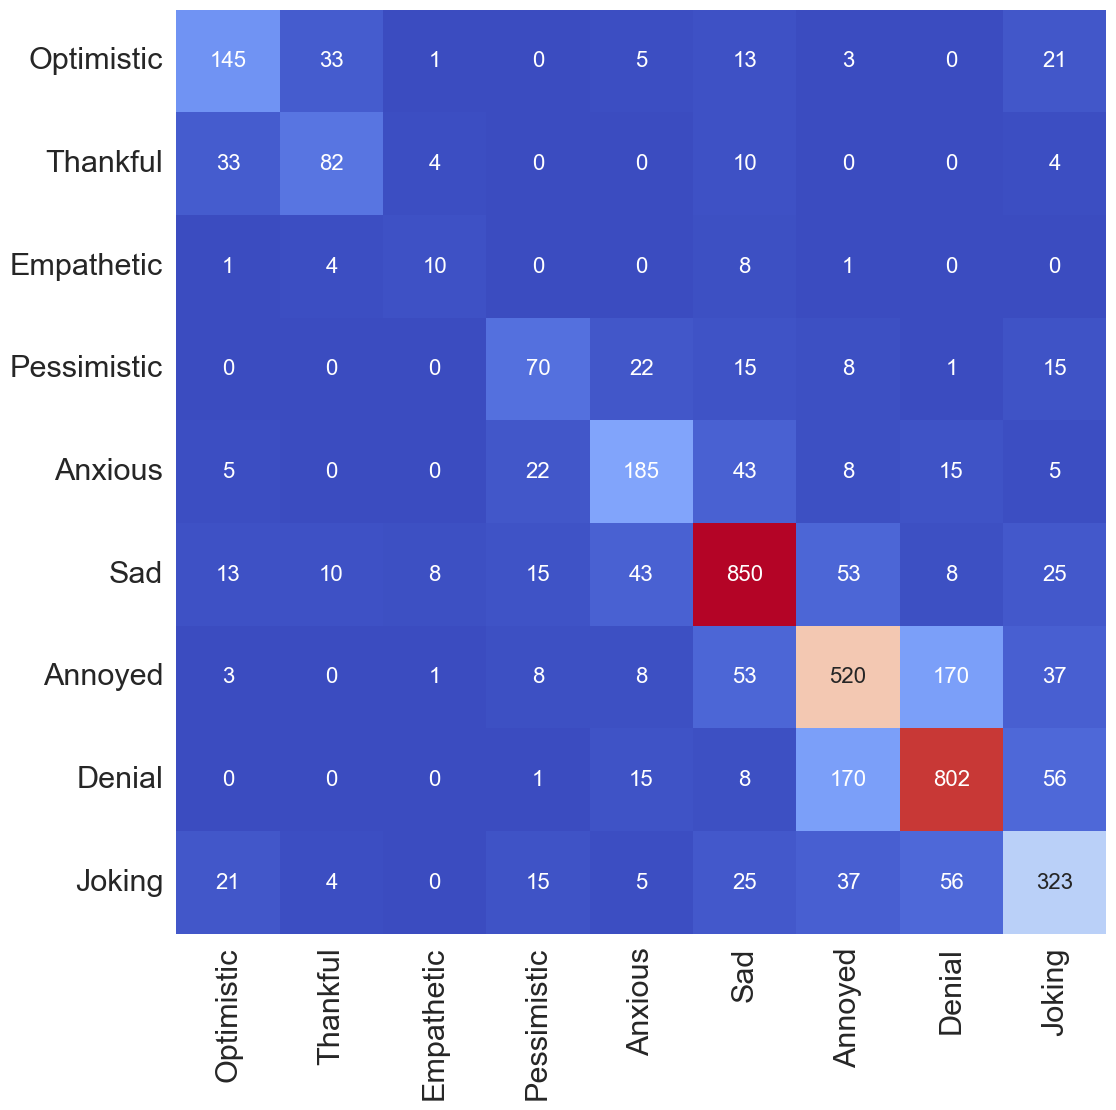

In [ ]:
uk_emotions = list(uk_roberta.columns[1:10])
only_emotions = uk_roberta[emotions]

emotion_array = np.zeros((9, 9))
e2i = {
    'Optimistic' : 0, 'Thankful' : 1, 'Empathetic' : 2, 'Pessimistic' : 3, 'Anxious' : 4, 'Sad' : 5, 'Annoyed' : 6, 'Denial' : 7,
    'Joking' : 8
}
for i in range(len(only_emotions)):
    l = only_emotions.iloc[i].tolist()
    for j in range(9):
        if l[j] == 1:
            emotion_array[j][j] += 1
        for k in range(j+1, 9):
            if (l[j] == 1) and (l[k] == 1):
                emotion_array[j][k] += int(1)
                emotion_array[k][j] += int(1)

emote_df_uk_roberta = pd.DataFrame(emotion_array, columns = emotions)
for col in emote_df_uk_roberta:
    emote_df_uk_roberta[col] = emote_df_uk_roberta[col].astype(int)
fig = plt.figure(figsize = (12, 12))
sns.set(font_scale = 2)
sns.heatmap(emote_df_uk_roberta, annot = True, cmap = 'coolwarm', xticklabels = emote_df_uk_roberta.columns, yticklabels = emote_df_uk_roberta.columns,
            fmt = 'g', annot_kws = {"size" : 16}, cbar = False, cbar_kws = {"shrink": .8})

<Axes: >

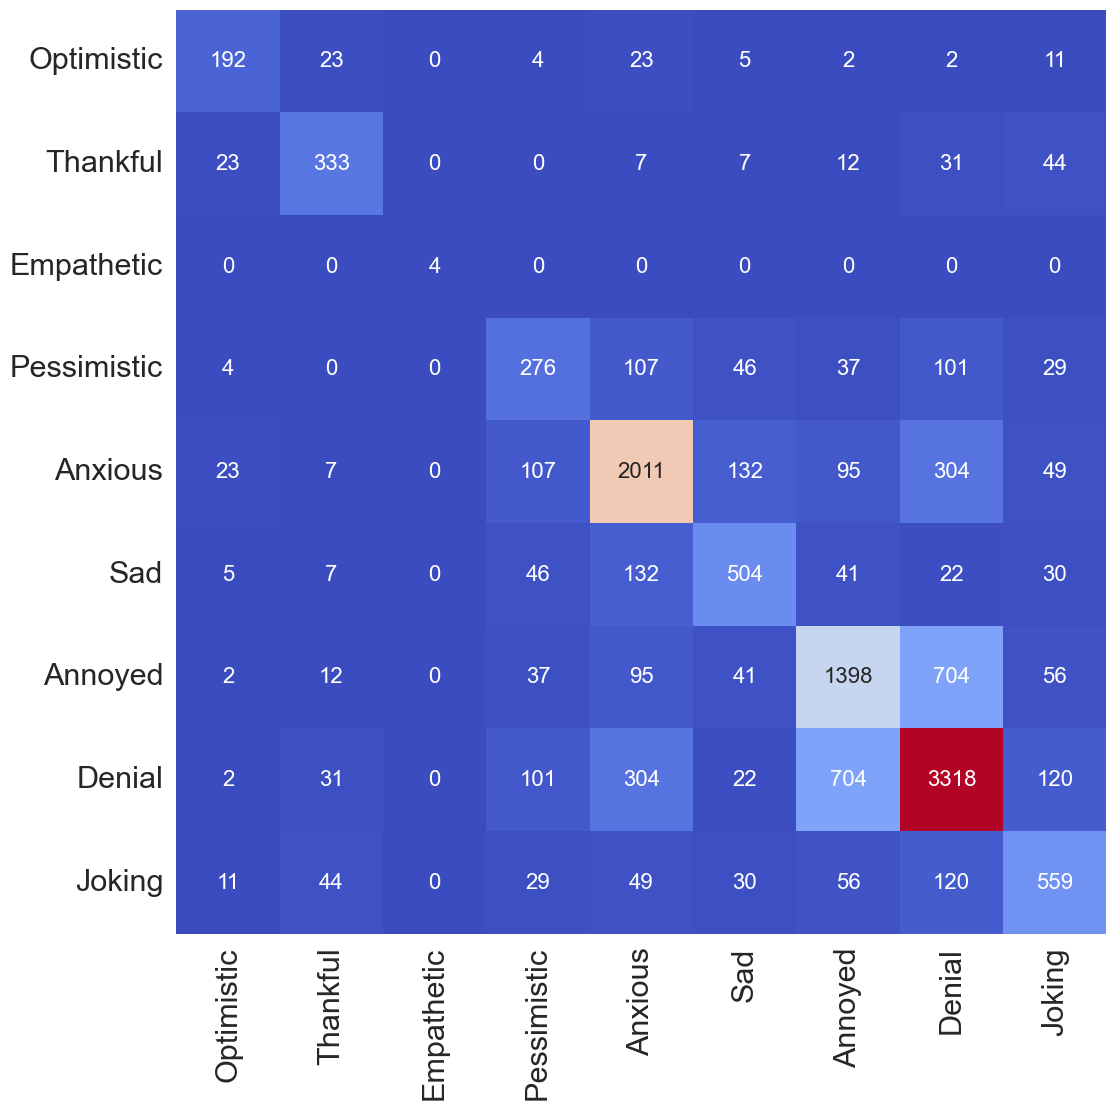

In [ ]:
world_emotions = list(world_bert.columns[1:10])
only_emotions = world_bert[emotions]

emotion_array = np.zeros((9, 9))
e2i = {
    'Optimistic' : 0, 'Thankful' : 1, 'Empathetic' : 2, 'Pessimistic' : 3, 'Anxious' : 4, 'Sad' : 5, 'Annoyed' : 6, 'Denial' : 7,
    'Joking' : 8
}
for i in range(len(only_emotions)):
    l = only_emotions.iloc[i].tolist()
    for j in range(9):
        if l[j] == 1:
            emotion_array[j][j] += 1
        for k in range(j+1, 9):
            if (l[j] == 1) and (l[k] == 1):
                emotion_array[j][k] += int(1)
                emotion_array[k][j] += int(1)

emote_df_world = pd.DataFrame(emotion_array, columns = emotions)
for col in emote_df_world:
    emote_df_world[col] = emote_df_world[col].astype(int)
fig = plt.figure(figsize = (12, 12))
sns.set(font_scale = 2)
sns.heatmap(emote_df_world, annot = True, cmap = 'coolwarm', xticklabels = emote_df_world.columns, yticklabels = emote_df_world.columns,
            fmt = 'g', annot_kws = {"size" : 16}, cbar = False, cbar_kws = {"shrink": .8})

<Axes: >

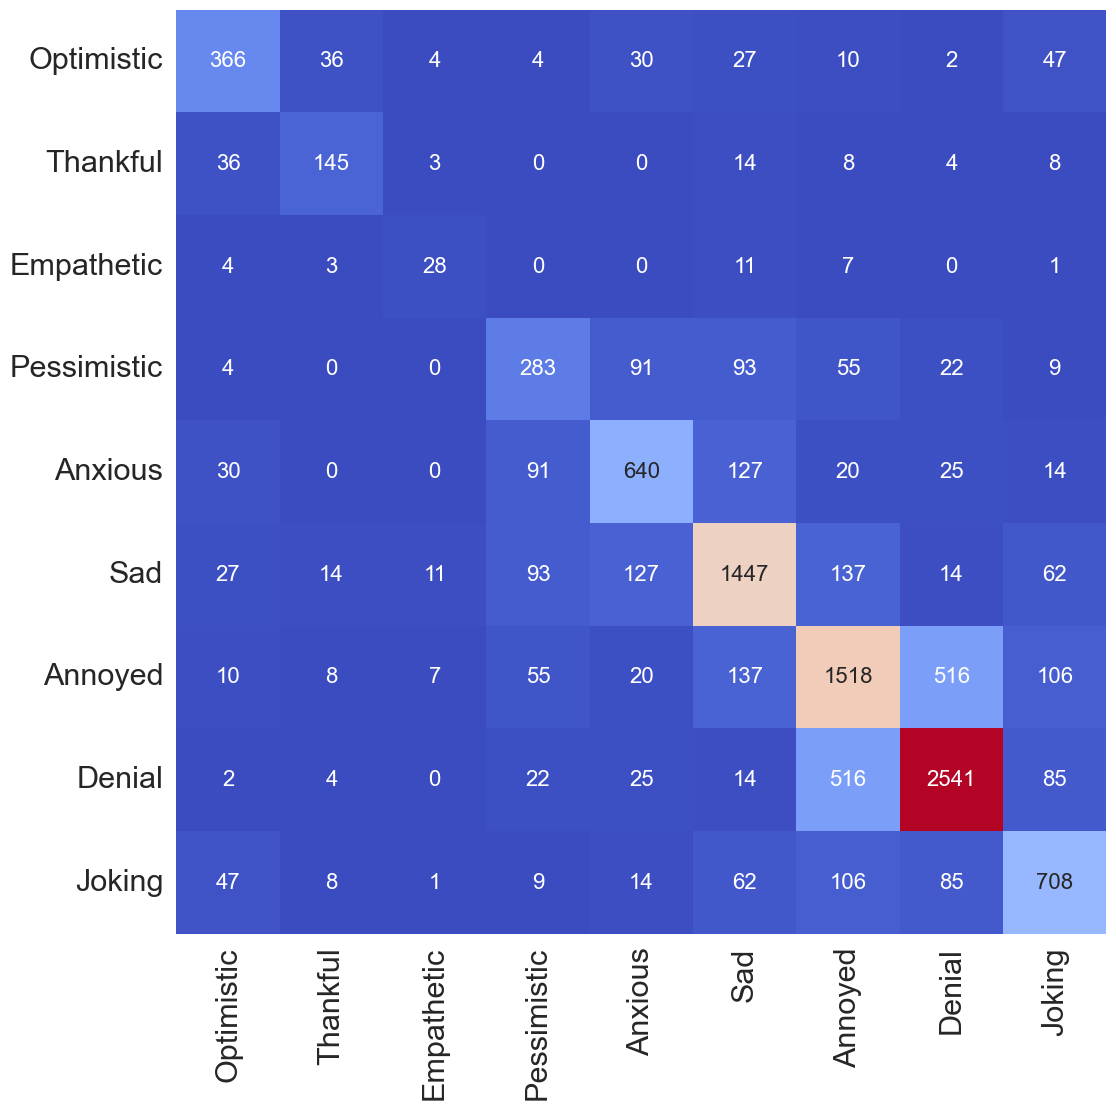

In [ ]:
world_emotions = list(world_roberta.columns[1:10])
only_emotions = world_roberta[emotions]

emotion_array = np.zeros((9, 9))
e2i = {
    'Optimistic' : 0, 'Thankful' : 1, 'Empathetic' : 2, 'Pessimistic' : 3, 'Anxious' : 4, 'Sad' : 5, 'Annoyed' : 6, 'Denial' : 7,
    'Joking' : 8
}
for i in range(len(only_emotions)):
    l = only_emotions.iloc[i].tolist()
    for j in range(9):
        if l[j] == 1:
            emotion_array[j][j] += 1
        for k in range(j+1, 9):
            if (l[j] == 1) and (l[k] == 1):
                emotion_array[j][k] += int(1)
                emotion_array[k][j] += int(1)

emote_df_world_roberta = pd.DataFrame(emotion_array, columns = emotions)
for col in emote_df_world_roberta:
    emote_df_world_roberta[col] = emote_df_world_roberta[col].astype(int)
fig = plt.figure(figsize = (12, 12))
sns.set(font_scale = 2)
sns.heatmap(emote_df_world_roberta, annot = True, cmap = 'coolwarm', xticklabels = emote_df_world_roberta.columns, yticklabels = emote_df_world_roberta.columns,
            fmt = 'g', annot_kws = {"size" : 16}, cbar = False, cbar_kws = {"shrink": .8})

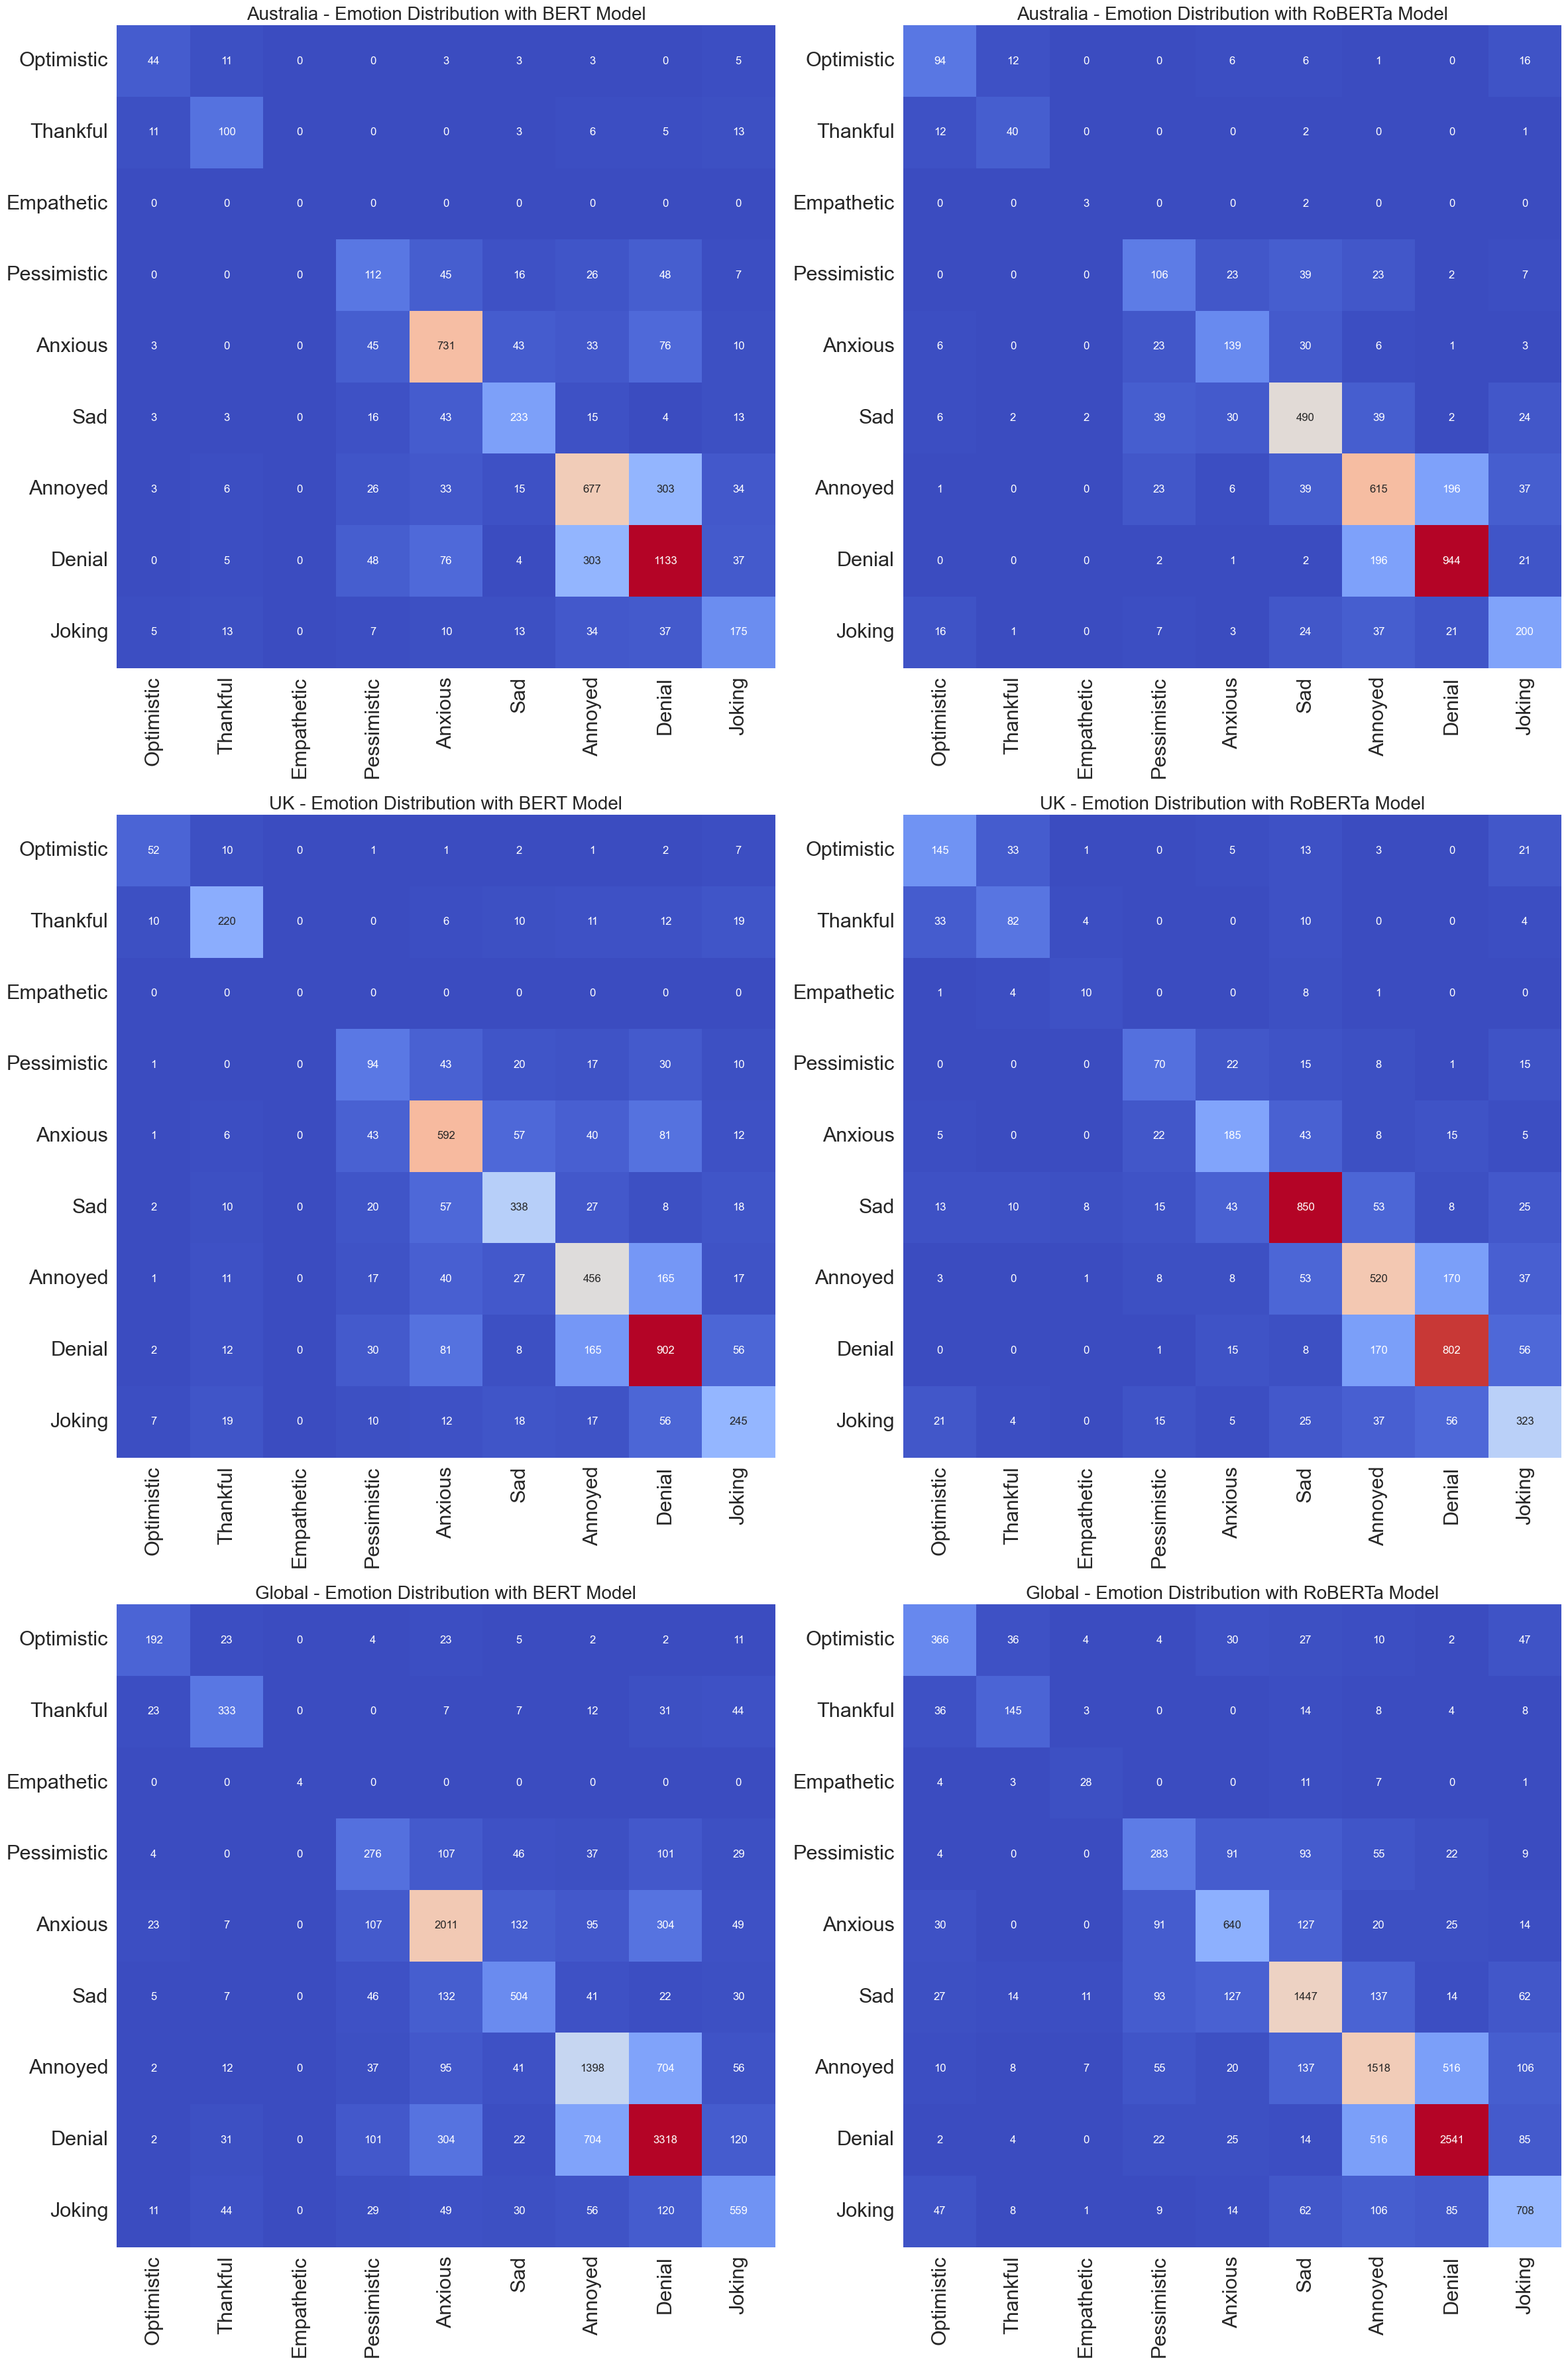

In [ ]:
# Function to process the emotion data
def process_emotion_data(data):
    emotions = list(data.columns[1:10])
    only_emotions = data[emotions]
    emotion_array = np.zeros((9, 9))
    for i in range(len(only_emotions)):
        l = only_emotions.iloc[i].tolist()
        for j in range(9):
            if l[j] == 1:
                emotion_array[j][j] += 1
            for k in range(j + 1, 9):
                if l[j] == 1 and l[k] == 1:
                    emotion_array[j][k] += 1
                    emotion_array[k][j] += 1
    emote_df = pd.DataFrame(emotion_array, columns=emotions).astype(int)
    return emote_df

# Process each dataset
emote_df_au = process_emotion_data(aus_bert)
emote_df_au_roberta = process_emotion_data(aus_roberta)
emote_df_uk = process_emotion_data(uk_bert)
emote_df_uk_roberta = process_emotion_data(uk_roberta)
emote_df_world = process_emotion_data(world_bert)
emote_df_world_roberta = process_emotion_data(world_roberta)

# Create a 3x2 subplot
fig, axs = plt.subplots(3, 2, figsize=(24, 36))
sns.set(font_scale=1.5)

# Plot each heatmap
heatmap_params = {
    'annot': True,
    'cmap': 'coolwarm',
    'fmt': 'g',
    'annot_kws': {"size": 12},
    'cbar': False,
    'cbar_kws': {"shrink": .8}
}

sns.heatmap(emote_df_au, ax=axs[0, 0], **heatmap_params, xticklabels=emote_df_au.columns, yticklabels=emote_df_au.columns)
axs[0, 0].set_title('Australia - Emotion Distribution with BERT Model', fontsize=20)

sns.heatmap(emote_df_au_roberta, ax=axs[0, 1], **heatmap_params, xticklabels=emote_df_au_roberta.columns, yticklabels=emote_df_au_roberta.columns)
axs[0, 1].set_title('Australia - Emotion Distribution with RoBERTa Model', fontsize=20)

sns.heatmap(emote_df_uk, ax=axs[1, 0], **heatmap_params, xticklabels=emote_df_uk.columns, yticklabels=emote_df_uk.columns)
axs[1, 0].set_title('UK - Emotion Distribution with BERT Model', fontsize=20)

sns.heatmap(emote_df_uk_roberta, ax=axs[1, 1], **heatmap_params, xticklabels=emote_df_uk_roberta.columns, yticklabels=emote_df_uk_roberta.columns)
axs[1, 1].set_title('UK - Emotion Distribution with RoBERTa Model', fontsize=20)

sns.heatmap(emote_df_world, ax=axs[2, 0], **heatmap_params, xticklabels=emote_df_world.columns, yticklabels=emote_df_world.columns)
axs[2, 0].set_title('Global - Emotion Distribution with BERT Model', fontsize=20)

sns.heatmap(emote_df_world_roberta, ax=axs[2, 1], **heatmap_params, xticklabels=emote_df_world_roberta.columns, yticklabels=emote_df_world_roberta.columns)
axs[2, 1].set_title('Global - Emotion Distribution with RoBERTa Model', fontsize=20)

plt.tight_layout()
plt.show()


<Axes: >

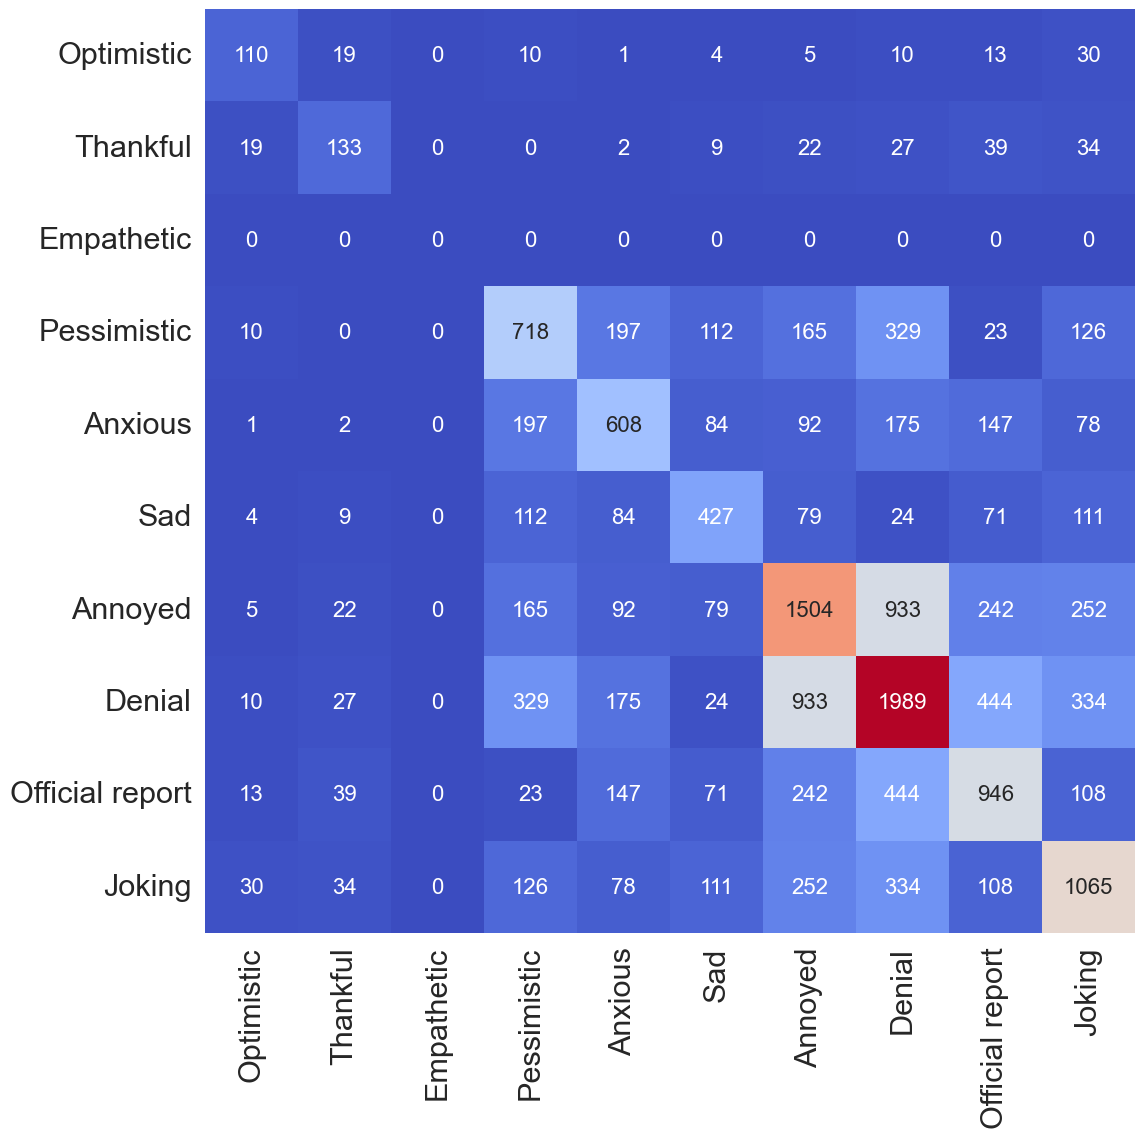

In [ ]:
opinion_emotions_pre = list(pre_covid_opinion_bert.columns[1:11])
only_emotions_pre = pre_covid_opinion_bert[opinion_emotions_pre]

emotion_array = np.zeros((10, 10))
e2i = {
        'Optimistic': 0, 'Thankful': 1, 'Empathetic': 2, 'Pessimistic': 3, 'Anxious': 4,
        'Sad': 5, 'Annoyed': 6, 'Denial': 7, 'Official report': 8, 'Joking': 9
    }
for i in range(len(only_emotions_pre)):
    l = only_emotions_pre.iloc[i].tolist()
    for j in range(10):
        if l[j] == 1:
            emotion_array[j][j] += 1
        for k in range(j+1, 10):
            if (l[j] == 1) and (l[k] == 1):
                emotion_array[j][k] += int(1)
                emotion_array[k][j] += int(1)

emote_df_opinion_pre = pd.DataFrame(emotion_array, columns = opinion_emotions_pre)
for col in emote_df_opinion_pre:
    emote_df_opinion_pre[col] = emote_df_opinion_pre[col].astype(int)
fig = plt.figure(figsize = (12, 12))
sns.set(font_scale = 2)
sns.heatmap(emote_df_opinion_pre, annot = True, cmap = 'coolwarm', xticklabels = emote_df_opinion_pre.columns, yticklabels = emote_df_opinion_pre.columns,
            fmt = 'g', annot_kws = {"size" : 16}, cbar = False, cbar_kws = {"shrink": .8})

<Axes: >

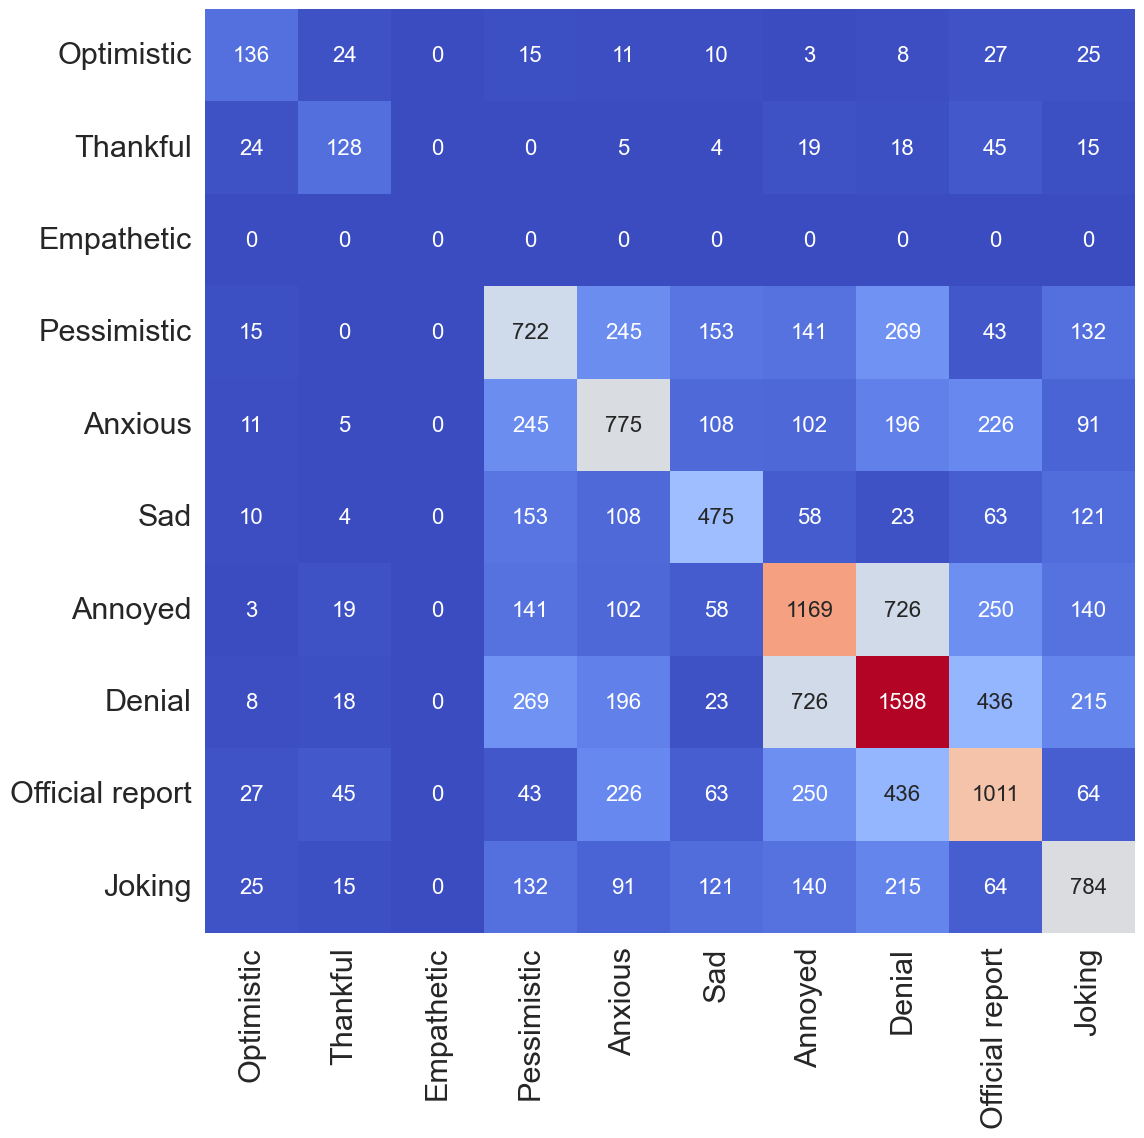

In [ ]:
opinion_emotions_during = list(during_covid_bert_data_opinion.columns[1:11])
only_emotions_during = during_covid_bert_data_opinion[opinion_emotions_during]

emotion_array = np.zeros((10, 10))
e2i = {
        'Optimistic': 0, 'Thankful': 1, 'Empathetic': 2, 'Pessimistic': 3, 'Anxious': 4,
        'Sad': 5, 'Annoyed': 6, 'Denial': 7, 'Official report': 8, 'Joking': 9
    }
for i in range(len(only_emotions_during)):
    l = only_emotions_during.iloc[i].tolist()
    for j in range(10):
        if l[j] == 1:
            emotion_array[j][j] += 1
        for k in range(j+1, 10):
            if (l[j] == 1) and (l[k] == 1):
                emotion_array[j][k] += int(1)
                emotion_array[k][j] += int(1)

emote_df_opinion_during = pd.DataFrame(emotion_array, columns = opinion_emotions_during)
for col in emote_df_opinion_during:
    emote_df_opinion_during[col] = emote_df_opinion_during[col].astype(int)
fig = plt.figure(figsize = (12, 12))
sns.set(font_scale = 2)
sns.heatmap(emote_df_opinion_during, annot = True, cmap = 'coolwarm', xticklabels = emote_df_opinion_during.columns, yticklabels = emote_df_opinion_during.columns,
            fmt = 'g', annot_kws = {"size" : 16}, cbar = False, cbar_kws = {"shrink": .8})

<Axes: >

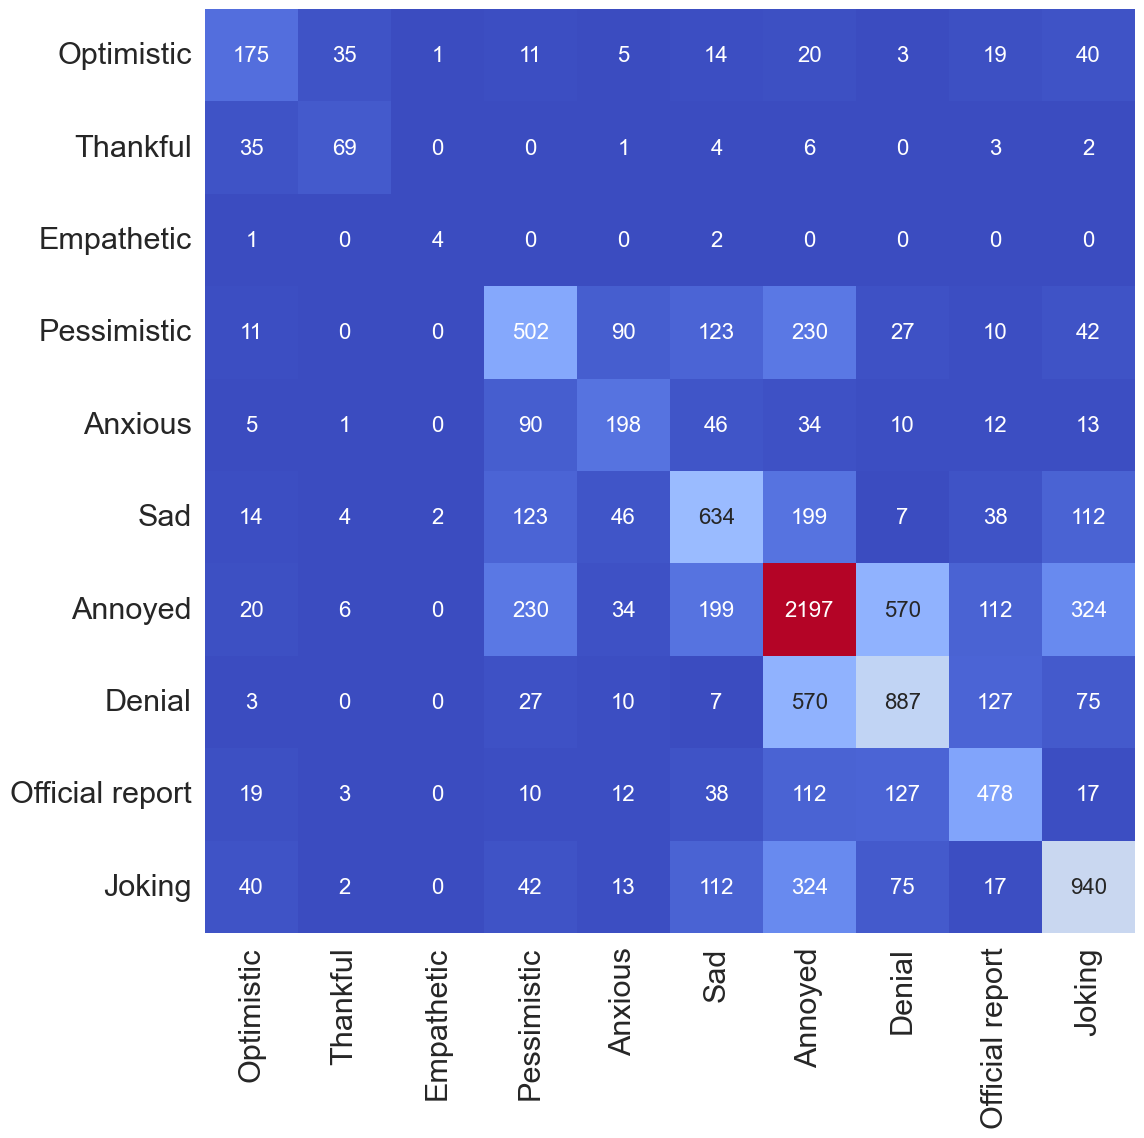

In [ ]:
opinion_emotions_pre_roberta = list(pre_covid_opinion_roberta.columns[1:11])
only_emotions_pre_roberta = pre_covid_opinion_roberta[opinion_emotions_pre_roberta]

emotion_array = np.zeros((10, 10))
e2i = {
        'Optimistic': 0, 'Thankful': 1, 'Empathetic': 2, 'Pessimistic': 3, 'Anxious': 4,
        'Sad': 5, 'Annoyed': 6, 'Denial': 7, 'Official report': 8, 'Joking': 9
    }
for i in range(len(only_emotions_pre_roberta)):
    l = only_emotions_pre_roberta.iloc[i].tolist()
    for j in range(10):
        if l[j] == 1:
            emotion_array[j][j] += 1
        for k in range(j+1, 10):
            if (l[j] == 1) and (l[k] == 1):
                emotion_array[j][k] += int(1)
                emotion_array[k][j] += int(1)

emote_df_opinion_pre_roberta = pd.DataFrame(emotion_array, columns = opinion_emotions_pre_roberta)
for col in emote_df_opinion_pre_roberta:
    emote_df_opinion_pre_roberta[col] = emote_df_opinion_pre_roberta[col].astype(int)
fig = plt.figure(figsize = (12, 12))
sns.set(font_scale = 2)
sns.heatmap(emote_df_opinion_pre_roberta, annot = True, cmap = 'coolwarm', xticklabels = emote_df_opinion_pre_roberta.columns, yticklabels = emote_df_opinion_pre_roberta.columns,
            fmt = 'g', annot_kws = {"size" : 16}, cbar = False, cbar_kws = {"shrink": .8})

<Axes: >

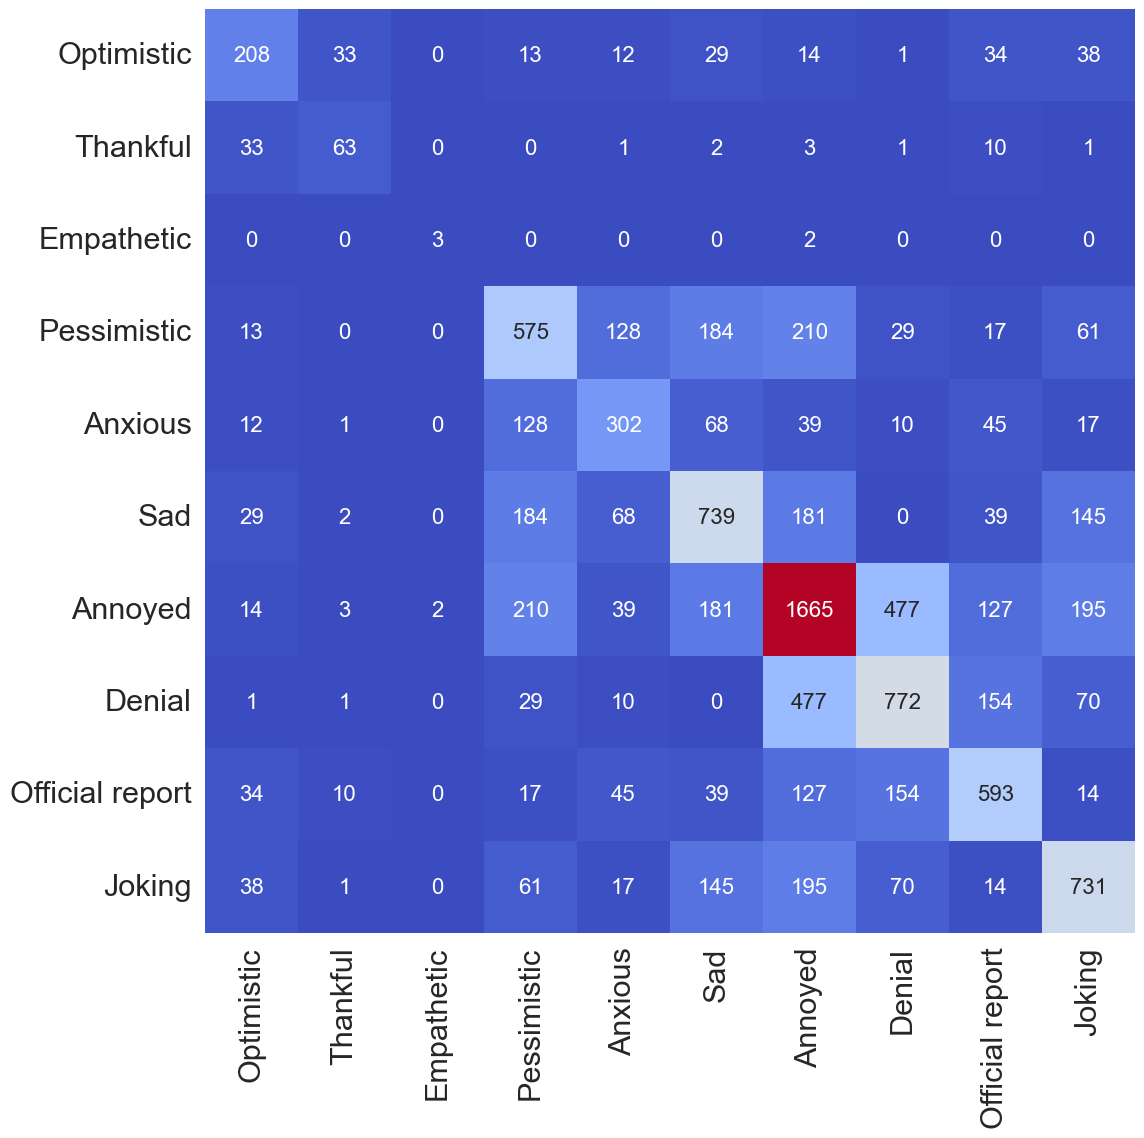

In [ ]:
opinion_emotions_during_roberta = list(during_covid_roberta_opinion.columns[1:11])
only_emotions_during_roberta = during_covid_roberta_opinion[opinion_emotions_during_roberta]

emotion_array = np.zeros((10, 10))
e2i = {
        'Optimistic': 0, 'Thankful': 1, 'Empathetic': 2, 'Pessimistic': 3, 'Anxious': 4,
        'Sad': 5, 'Annoyed': 6, 'Denial': 7, 'Official report': 8, 'Joking': 9
    }
for i in range(len(only_emotions_during_roberta)):
    l = only_emotions_during_roberta.iloc[i].tolist()
    for j in range(10):
        if l[j] == 1:
            emotion_array[j][j] += 1
        for k in range(j+1, 10):
            if (l[j] == 1) and (l[k] == 1):
                emotion_array[j][k] += int(1)
                emotion_array[k][j] += int(1)

emote_df_opinion_during_roberta = pd.DataFrame(emotion_array, columns = opinion_emotions_during_roberta)
for col in emote_df_opinion_during_roberta:
    emote_df_opinion_during_roberta[col] = emote_df_opinion_during_roberta[col].astype(int)
fig = plt.figure(figsize = (12, 12))
sns.set(font_scale = 2)
sns.heatmap(emote_df_opinion_during_roberta, annot = True, cmap = 'coolwarm', xticklabels = emote_df_opinion_during_roberta.columns, yticklabels = emote_df_opinion_during_roberta.columns,
            fmt = 'g', annot_kws = {"size" : 16}, cbar = False, cbar_kws = {"shrink": .8})

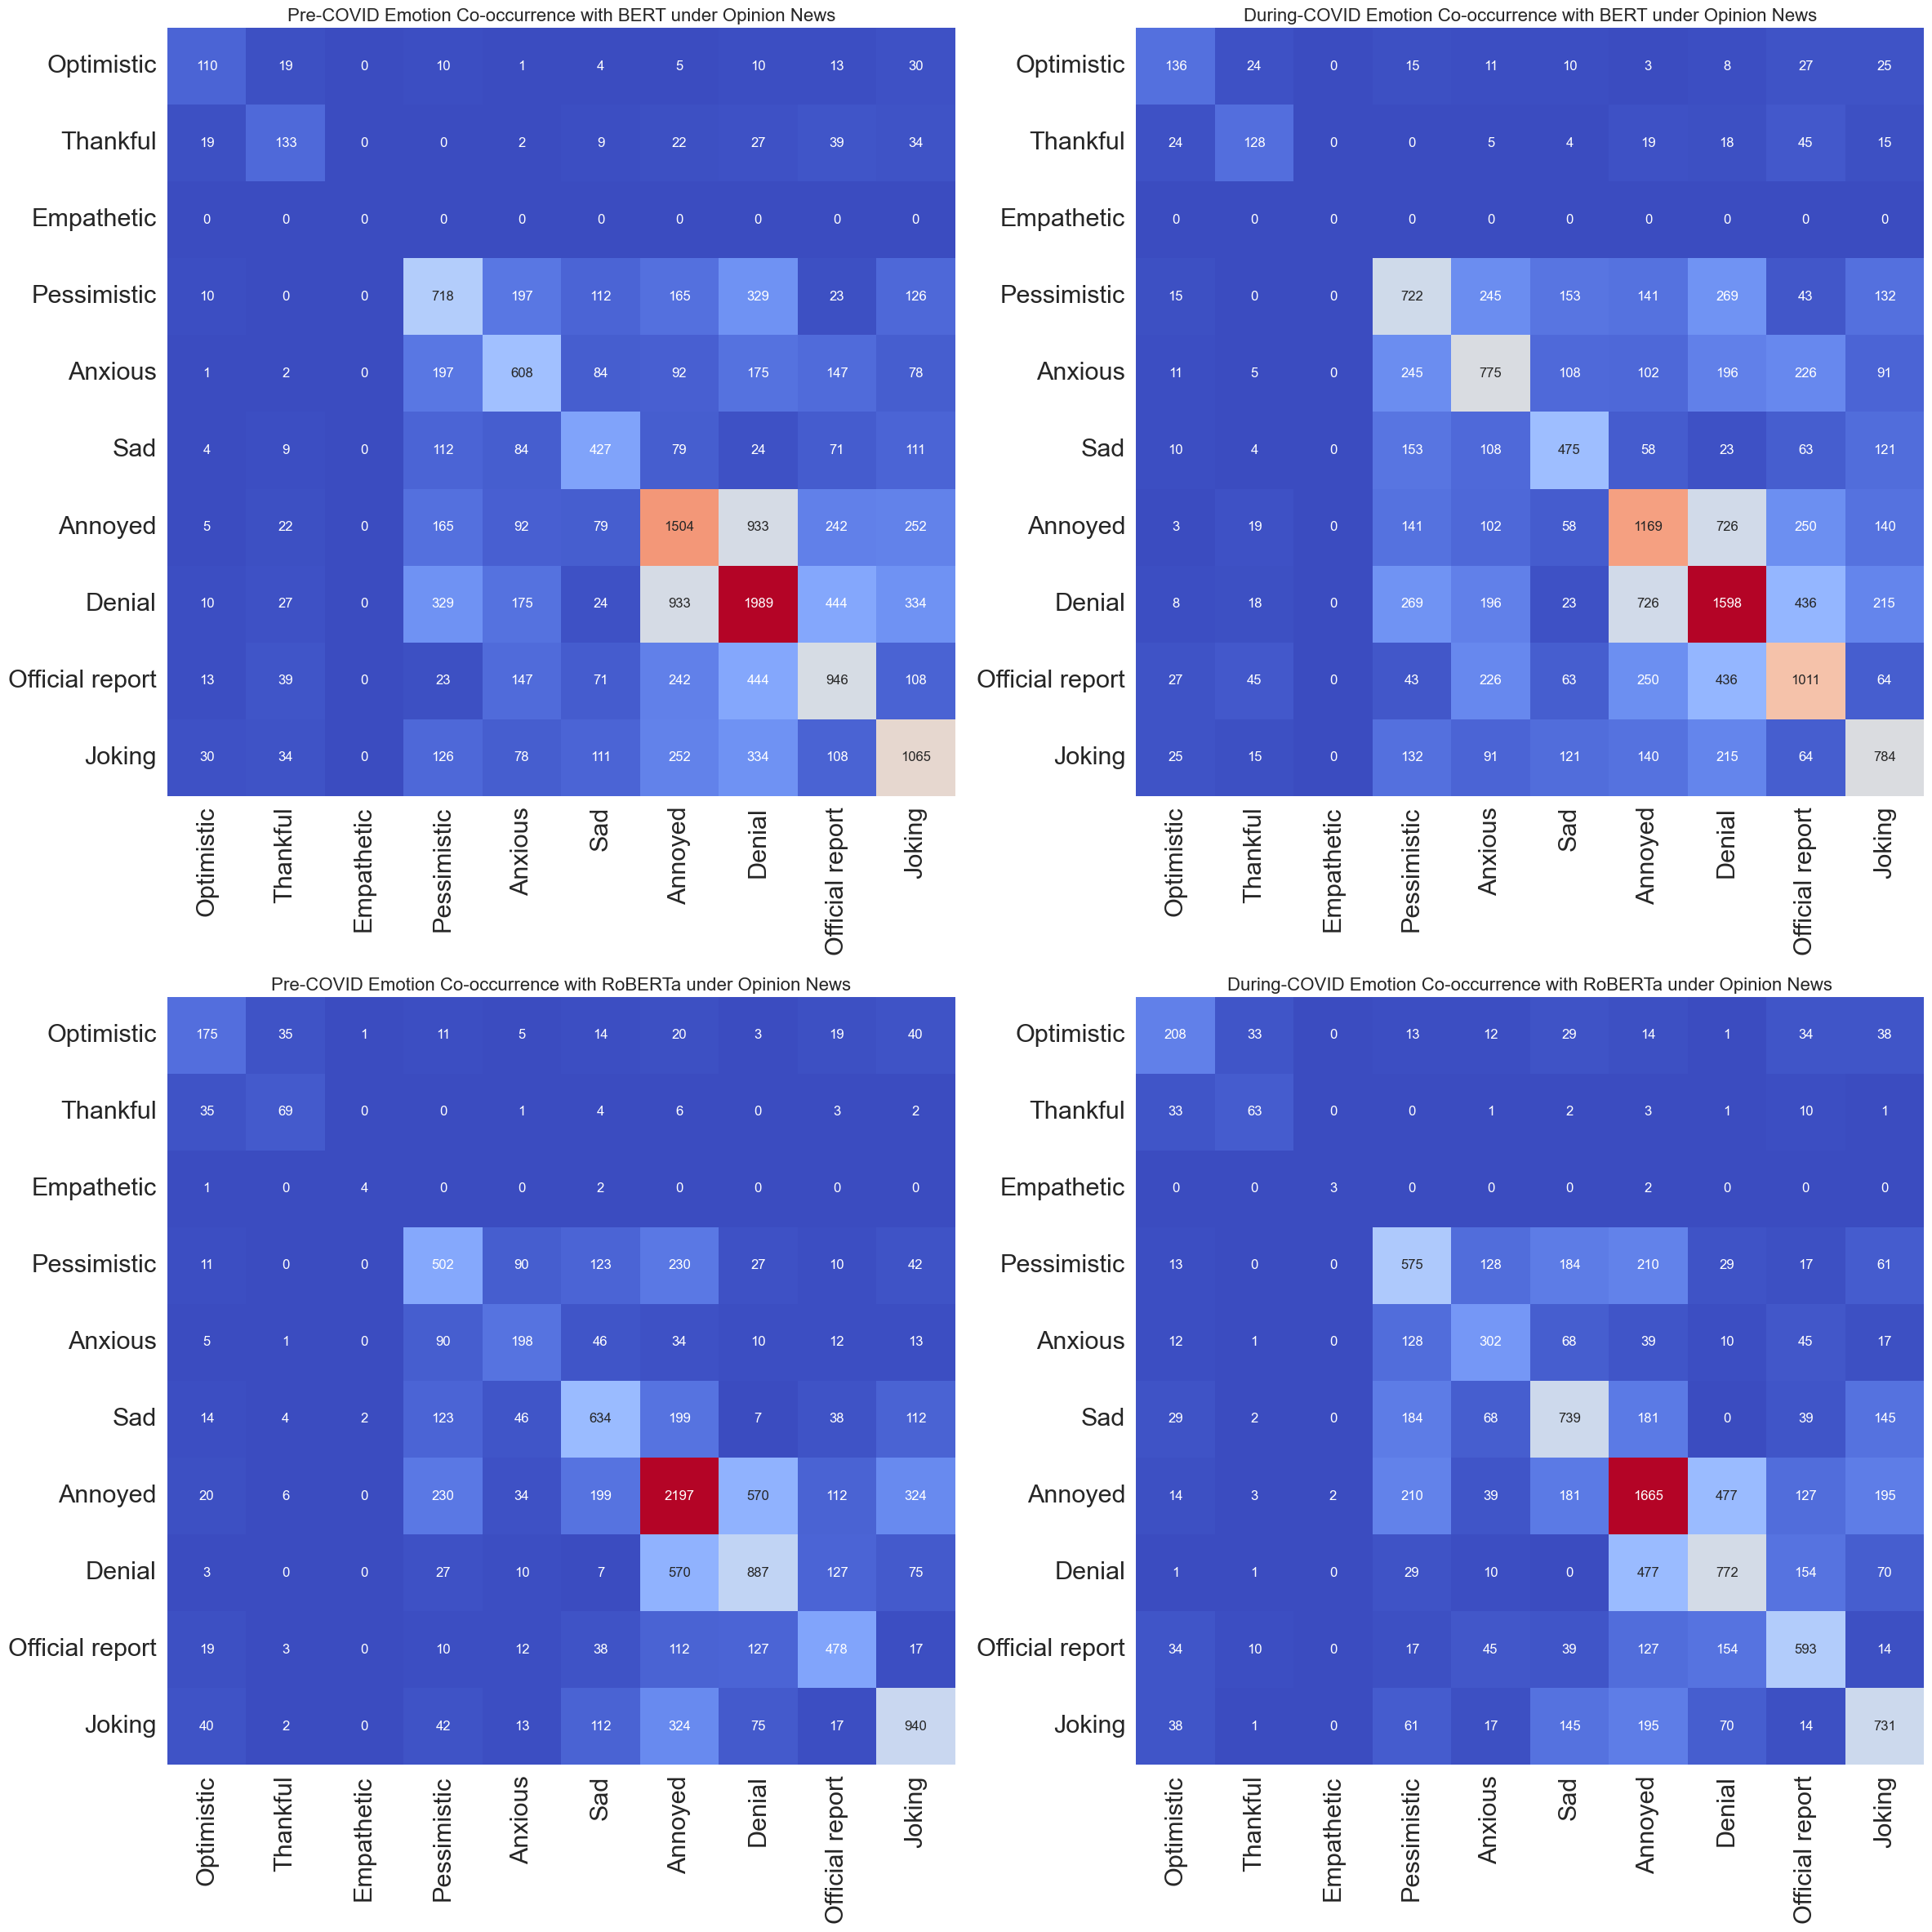

In [ ]:
# 创建2x2的子图布局
fig, axs = plt.subplots(2, 2, figsize=(24, 24))  # 调整尺寸以适应内容
sns.set(font_scale=1.5)  # 调整字体大小

# 第一张图：Pre-COVID BERT情感共现
sns.heatmap(emote_df_opinion_pre, annot=True, cmap='coolwarm',
            xticklabels=emote_df_opinion_pre.columns,
            yticklabels=emote_df_opinion_pre.columns,
            fmt='g', annot_kws={"size": 12}, cbar=False,
            ax=axs[0, 0])
axs[0, 0].set_title('Pre-COVID Emotion Co-occurrence with BERT under Opinion News', fontsize=16)

# 第二张图：During-COVID BERT情感共现
sns.heatmap(emote_df_opinion_during, annot=True, cmap='coolwarm',
            xticklabels=emote_df_opinion_during.columns,
            yticklabels=emote_df_opinion_during.columns,
            fmt='g', annot_kws={"size": 12}, cbar=False,
            ax=axs[0, 1])
axs[0, 1].set_title('During-COVID Emotion Co-occurrence with BERT under Opinion News', fontsize=16)

# 第三张图：Pre-COVID RoBERTa情感共现
sns.heatmap(emote_df_opinion_pre_roberta, annot=True, cmap='coolwarm',
            xticklabels=emote_df_opinion_pre_roberta.columns,
            yticklabels=emote_df_opinion_pre_roberta.columns,
            fmt='g', annot_kws={"size": 12}, cbar=False,
            ax=axs[1, 0])
axs[1, 0].set_title('Pre-COVID Emotion Co-occurrence with RoBERTa under Opinion News', fontsize=16)

# 第四张图：During-COVID RoBERTa情感共现
sns.heatmap(emote_df_opinion_during_roberta, annot=True, cmap='coolwarm',
            xticklabels=emote_df_opinion_during_roberta.columns,
            yticklabels=emote_df_opinion_during_roberta.columns,
            fmt='g', annot_kws={"size": 12}, cbar=False,
            ax=axs[1, 1])
axs[1, 1].set_title('During-COVID Emotion Co-occurrence with RoBERTa under Opinion News', fontsize=16)

plt.tight_layout()
plt.show()

In [ ]:
bert_data['webPublicationDate'] = pd.to_datetime(bert_data['webPublicationDate'])

pre_covid_bert_data2 = bert_data[(bert_data['webPublicationDate'] >= '2016-1-31') & (bert_data['webPublicationDate'] <= '2019-12-31')]
during_covid_bert_data2 = bert_data[(bert_data['webPublicationDate'] >= '2020-01-01') & (bert_data['webPublicationDate'] <= '2022-03-31')]

In [ ]:
roberta_data['webPublicationDate'] = pd.to_datetime(roberta_data['webPublicationDate'])

pre_covid_roberta_data2 = roberta_data[(roberta_data['webPublicationDate'] >= '2016-1-31') & (roberta_data['webPublicationDate'] <= '2019-12-31')]
during_covid_roberta_data2 = roberta_data[(roberta_data['webPublicationDate'] >= '2020-01-01') & (roberta_data['webPublicationDate'] <= '2022-03-31')]

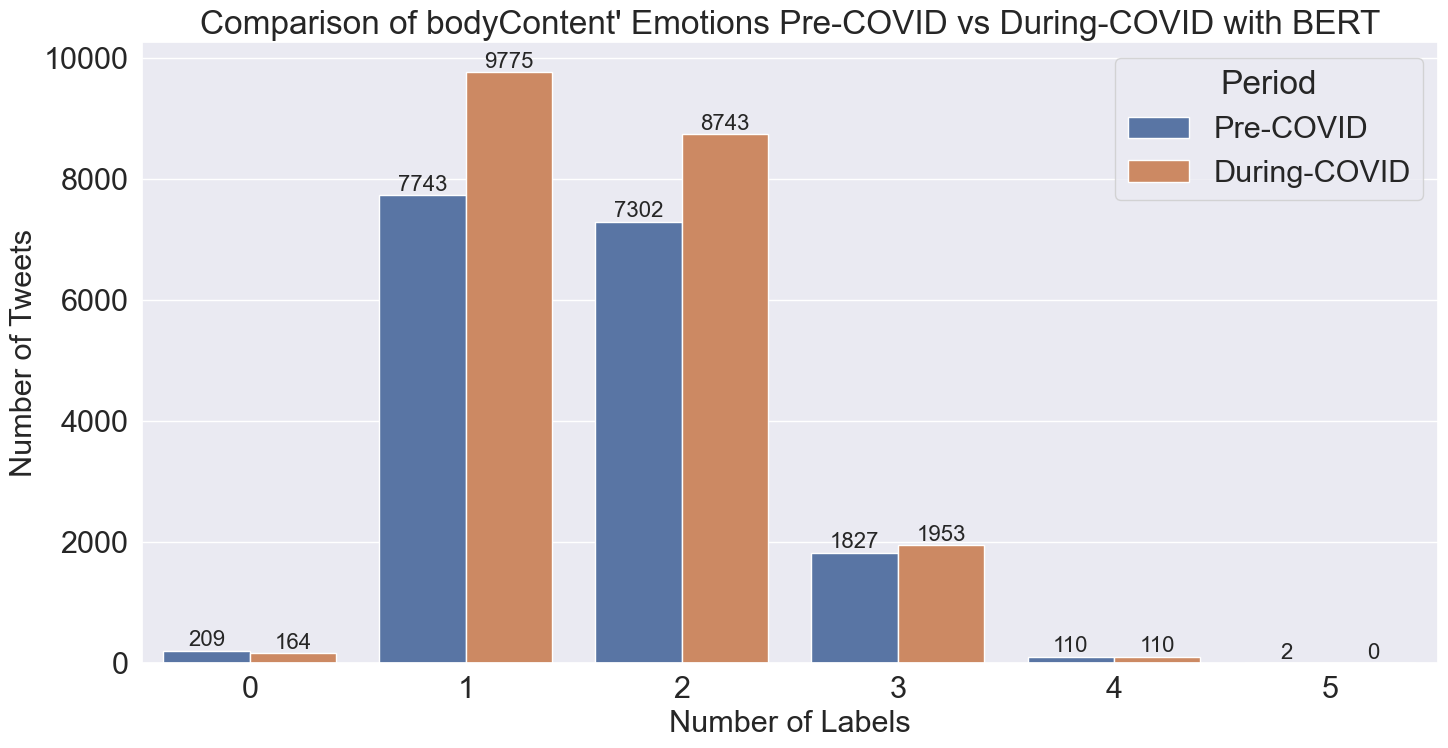

<Figure size 640x480 with 0 Axes>

In [ ]:

multiLabel_counts_pre = pre_covid_bert_data2['n_emotions'].value_counts().sort_index()
multiLabel_counts_during = during_covid_bert_data2['n_emotions'].value_counts().sort_index()

# 创建一个新的DataFrame来合并这两组计数
counts_df = pd.DataFrame({
    'Number of Labels': multiLabel_counts_pre.index,
    'Pre-COVID': multiLabel_counts_pre.values,
    'During-COVID': multiLabel_counts_during.reindex(multiLabel_counts_pre.index, fill_value=0).values
})

# 将DataFrame转换为长格式，以便于使用seaborn绘制双柱状图
counts_df_melted = pd.melt(counts_df, id_vars='Number of Labels', var_name='Period', value_name='Number of bodyContent')

sns.set(font_scale=2)
plt.figure(figsize=(15, 8))

# 使用seaborn的barplot绘制图表
ax = sns.barplot(x='Number of Labels', y='Number of bodyContent', hue='Period', data=counts_df_melted)

plt.ylabel('Number of Tweets', fontsize=22)
plt.xlabel('Number of Labels', fontsize=22)
plt.title('Comparison of bodyContent\' Emotions Pre-COVID vs During-COVID with BERT')
for label, group_df in counts_df_melted.groupby('Number of Labels'):
    if label in [0,1, 2,3,4,5]:  # 只关注标签数为1和2的情况
        for _, row in group_df.iterrows():
            # 获取这个标签和期间组合的具体高度
            height = row['Number of bodyContent']
            # 找到对应的x位置
            x = label - 0.2 if row['Period'] == 'Pre-COVID' else label + 0.2
            # 添加标签
            ax.text(x, height + 5, int(height), ha='center', va='bottom', fontsize=16)

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()


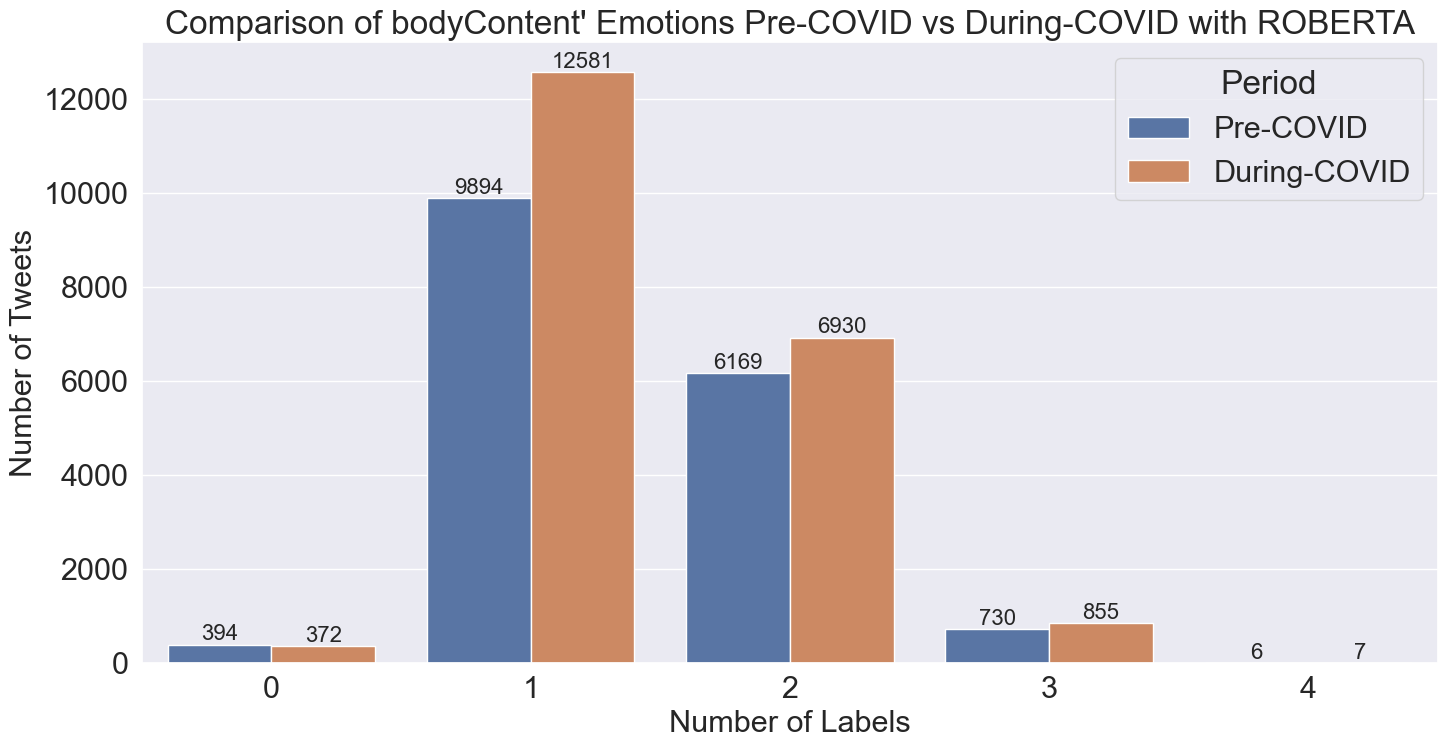

<Figure size 640x480 with 0 Axes>

In [ ]:
multiLabel_counts_pre_roberta = pre_covid_roberta_data2['n_emotions'].value_counts().sort_index()
multiLabel_counts_during_roberta = during_covid_roberta_data2['n_emotions'].value_counts().sort_index()

# 创建一个新的DataFrame来合并这两组计数
counts_df = pd.DataFrame({
    'Number of Labels': multiLabel_counts_pre_roberta.index,
    'Pre-COVID': multiLabel_counts_pre_roberta.values,
    'During-COVID': multiLabel_counts_during_roberta.reindex(multiLabel_counts_pre_roberta.index, fill_value=0).values
})

# 将DataFrame转换为长格式，以便于使用seaborn绘制双柱状图
counts_df_melted = pd.melt(counts_df, id_vars='Number of Labels', var_name='Period', value_name='Number of bodyContent')

sns.set(font_scale=2)
plt.figure(figsize=(15, 8))

# 使用seaborn的barplot绘制图表
ax = sns.barplot(x='Number of Labels', y='Number of bodyContent', hue='Period', data=counts_df_melted)

plt.ylabel('Number of Tweets', fontsize=22)
plt.xlabel('Number of Labels', fontsize=22)
plt.title('Comparison of bodyContent\' Emotions Pre-COVID vs During-COVID with ROBERTA')
for label, group_df in counts_df_melted.groupby('Number of Labels'):
    if label in [0,1, 2,3,4,5]:  # 只关注标签数为1和2的情况
        for _, row in group_df.iterrows():
            # 获取这个标签和期间组合的具体高度
            height = row['Number of bodyContent']
            # 找到对应的x位置
            x = label - 0.2 if row['Period'] == 'Pre-COVID' else label + 0.2
            # 添加标签
            ax.text(x, height + 5, int(height), ha='center', va='bottom', fontsize=16)

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

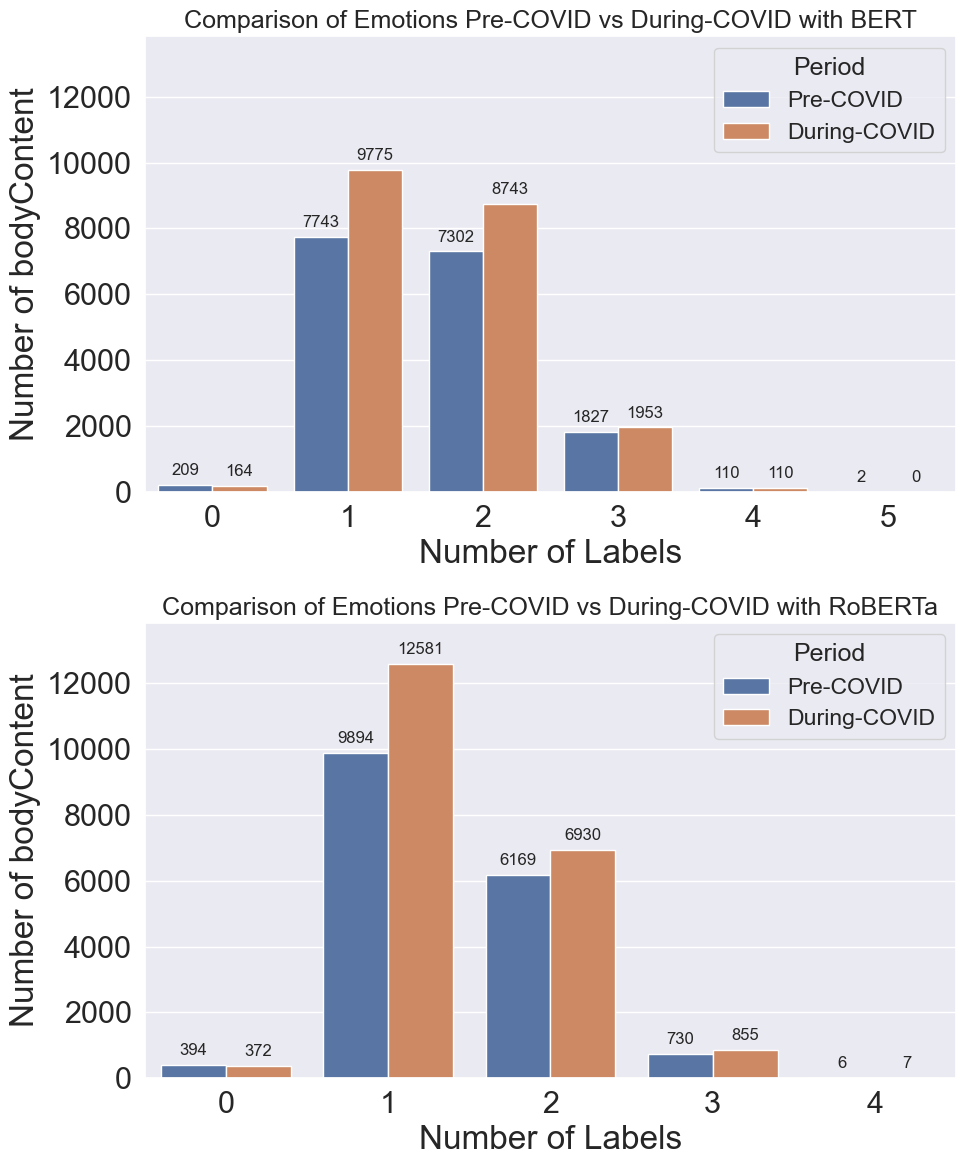

In [ ]:

fig, axs = plt.subplots(2, 1, figsize=(10, 12)) # 修改了这里
sns.set(font_scale=1.5)

# 计算所有数据中的最大值，用于统一y轴scale
max_count = max(
    multiLabel_counts_pre.max(),
    multiLabel_counts_during.max(),
    multiLabel_counts_pre_roberta.max(),
    multiLabel_counts_during_roberta.max()
)

def add_value_labels(ax, spacing=5):
    """
    在每个条形图上添加标签
    :param ax: Matplotlib 轴对象
    :param spacing: 在条形图顶部和标签之间的间距
    """
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = 'bottom'
        if y_value < 0:
            space *= -1
            va = 'top'
        label = "{:.0f}".format(y_value)
        ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points",
                    ha='center', va=va, fontsize=12)

# BERT Pre-COVID vs During-COVID
counts_df_bert = pd.DataFrame({
    'Number of Labels': multiLabel_counts_pre.index,
    'Pre-COVID': multiLabel_counts_pre.values,
    'During-COVID': multiLabel_counts_during.reindex(multiLabel_counts_pre.index, fill_value=0).values
})
counts_df_melted_bert = pd.melt(counts_df_bert, id_vars='Number of Labels', var_name='Period', value_name='Number of bodyContent')
sns.barplot(x='Number of Labels', y='Number of bodyContent', hue='Period', data=counts_df_melted_bert, ax=axs[0]) # 修改了这里
axs[0].set_ylim(0, max_count * 1.1)
axs[0].set_title('Comparison of Emotions Pre-COVID vs During-COVID with BERT')
add_value_labels(axs[0]) # 修改了这里

# BERT Pre-COVID vs During-COVID with RoBERTa
counts_df_roberta = pd.DataFrame({
    'Number of Labels': multiLabel_counts_pre_roberta.index,
    'Pre-COVID': multiLabel_counts_pre_roberta.values,
    'During-COVID': multiLabel_counts_during_roberta.reindex(multiLabel_counts_pre_roberta.index, fill_value=0).values
})
counts_df_melted_roberta = pd.melt(counts_df_roberta, id_vars='Number of Labels', var_name='Period', value_name='Number of bodyContent')
sns.barplot(x='Number of Labels', y='Number of bodyContent', hue='Period', data=counts_df_melted_roberta, ax=axs[1]) # 修改了这里
axs[1].set_ylim(0, max_count * 1.1)
axs[1].set_title('Comparison of Emotions Pre-COVID vs During-COVID with RoBERTa')
add_value_labels(axs[1]) # 修改了这里

plt.tight_layout()
plt.show()


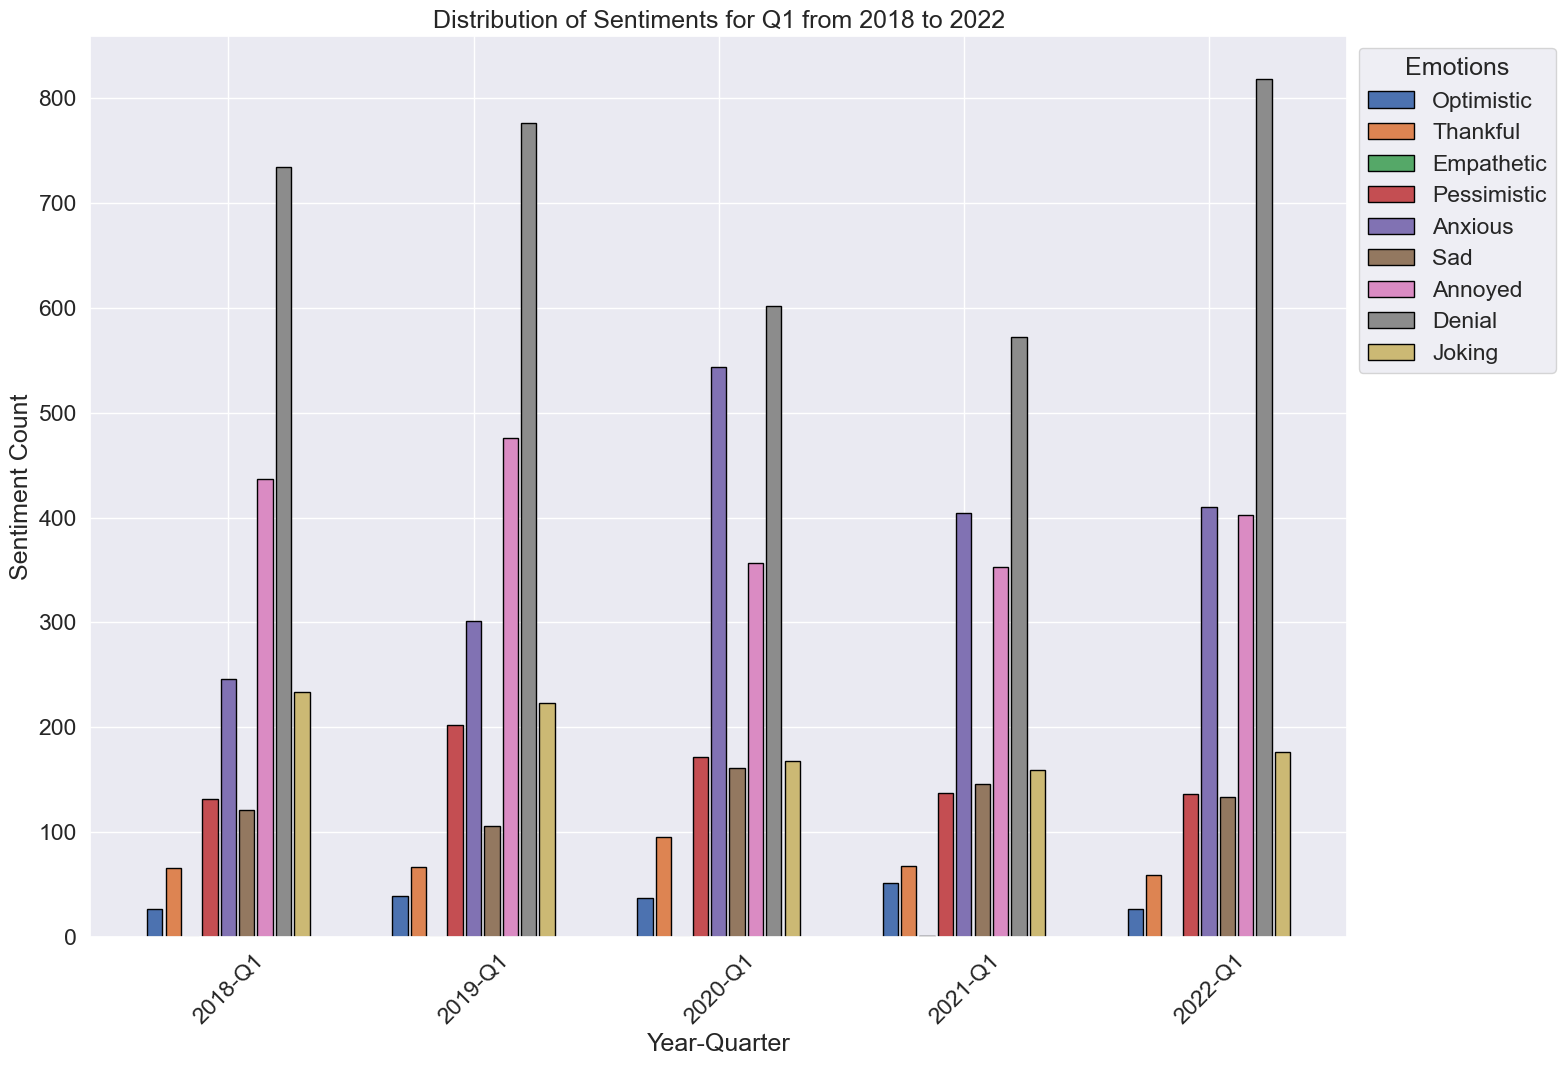

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 确保在Jupyter Notebook中能够显示图形
%matplotlib inline
def plot_first_quarter_sentiment(bert_data_drop, start_year, end_year):
    # 提取情感标签列
    emotions = bert_data_drop.columns[1:10]  # 第二列开始为情感标签
    # 仅选取指定年份的第一季度
    quarters = [f"{year}-Q1" for year in range(start_year, end_year + 1)]

    # 根据年份季度对数据进行分组，并计算每个季度内各情感类别的统计值
    quarterly_stats = {}
    for quarter in quarters:
        quarter_data = bert_data_drop[bert_data_drop['year_quarter'] == quarter]
        quarterly_stats[quarter] = quarter_data[emotions].sum()

    # 创建图表来可视化统计值
    x = np.arange(len(quarters))*0.8  # 使用数字索引而不是字符串标签
    width = 0.05  # 调整柱状图的宽度，因为季度更少了
    gap = 0.01  # 柱子间的间距

    plt.figure(figsize=(16, 11))  # 调整图表大小

    for i, emotion in enumerate(emotions):
        y_values = [quarterly_stats[quarter][emotion] for quarter in quarters]
        plt.bar(x + i * (width + gap), y_values, width, label=emotion, edgecolor='black')  # 添加边框颜色

    plt.xlabel('Year-Quarter')
    plt.ylabel('Sentiment Count')
    plt.title(f'Distribution of Sentiments for Q1 from {start_year} to {end_year}')
    plt.xticks(x + (len(emotions) - 1) * (width + gap) / 2, quarters, rotation=45)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Emotions")
    plt.tight_layout()

    plt.show()
plot_first_quarter_sentiment(bert_data_drop, 2018, 2022)

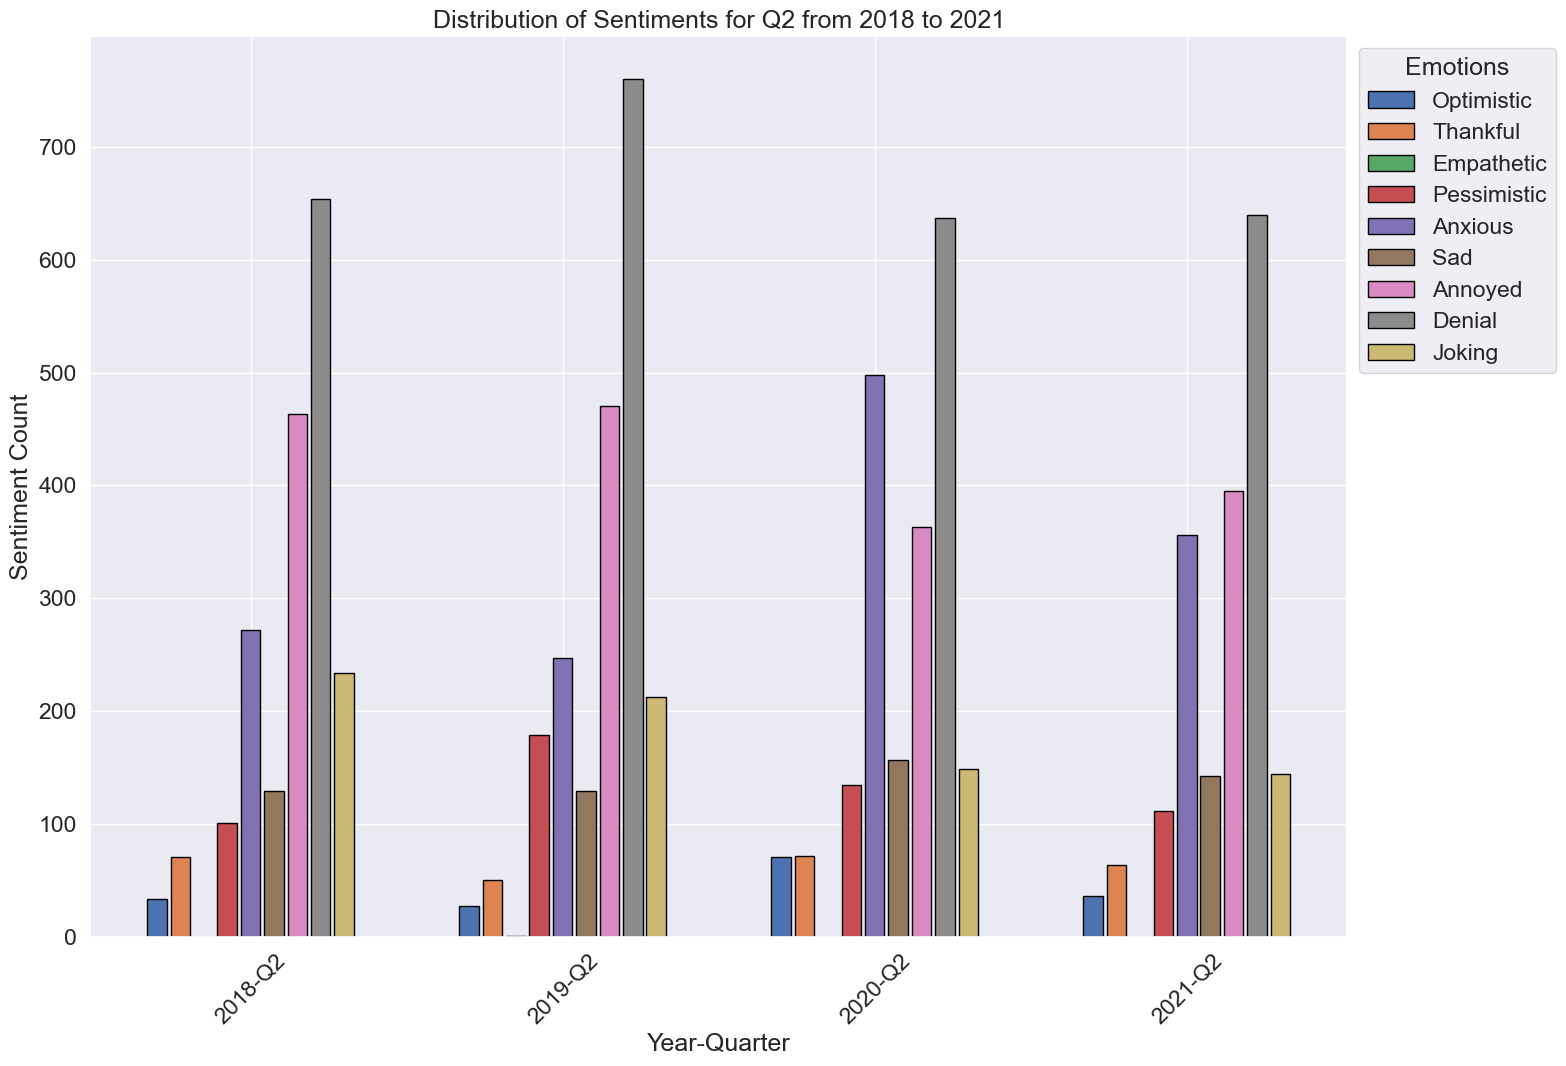

In [ ]:
def plot_second_quarter_sentiment(bert_data_drop, start_year, end_year):
    # 提取情感标签列
    emotions = bert_data_drop.columns[1:10]  # 第二列开始为情感标签
    # 仅选取指定年份的第二季度
    quarters = [f"{year}-Q2" for year in range(start_year, end_year + 1)]

    # 根据年份季度对数据进行分组，并计算每个季度内各情感类别的统计值
    quarterly_stats = {}
    for quarter in quarters:
        quarter_data = bert_data_drop[bert_data_drop['year_quarter'] == quarter]
        quarterly_stats[quarter] = quarter_data[emotions].sum()

    # 创建图表来可视化统计值
    x = np.arange(len(quarters))*0.8  # 使用数字索引而不是字符串标签
    width = 0.05  # 调整柱状图的宽度
    gap = 0.01  # 柱子间的间距

    plt.figure(figsize=(16, 11))  # 调整图表大小

    for i, emotion in enumerate(emotions):
        y_values = [quarterly_stats[quarter][emotion] for quarter in quarters]
        plt.bar(x + i * (width + gap), y_values, width, label=emotion, edgecolor='black')  # 添加边框颜色

    plt.xlabel('Year-Quarter')
    plt.ylabel('Sentiment Count')
    plt.title(f'Distribution of Sentiments for Q2 from {start_year} to {end_year}')
    plt.xticks(x + (len(emotions) - 1) * (width + gap) / 2, quarters, rotation=45)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Emotions")
    plt.tight_layout()

    plt.show()

# 调用函数，生成2018至2021年每年第二季度的情感分析图
plot_second_quarter_sentiment(bert_data_drop, 2018, 2021)

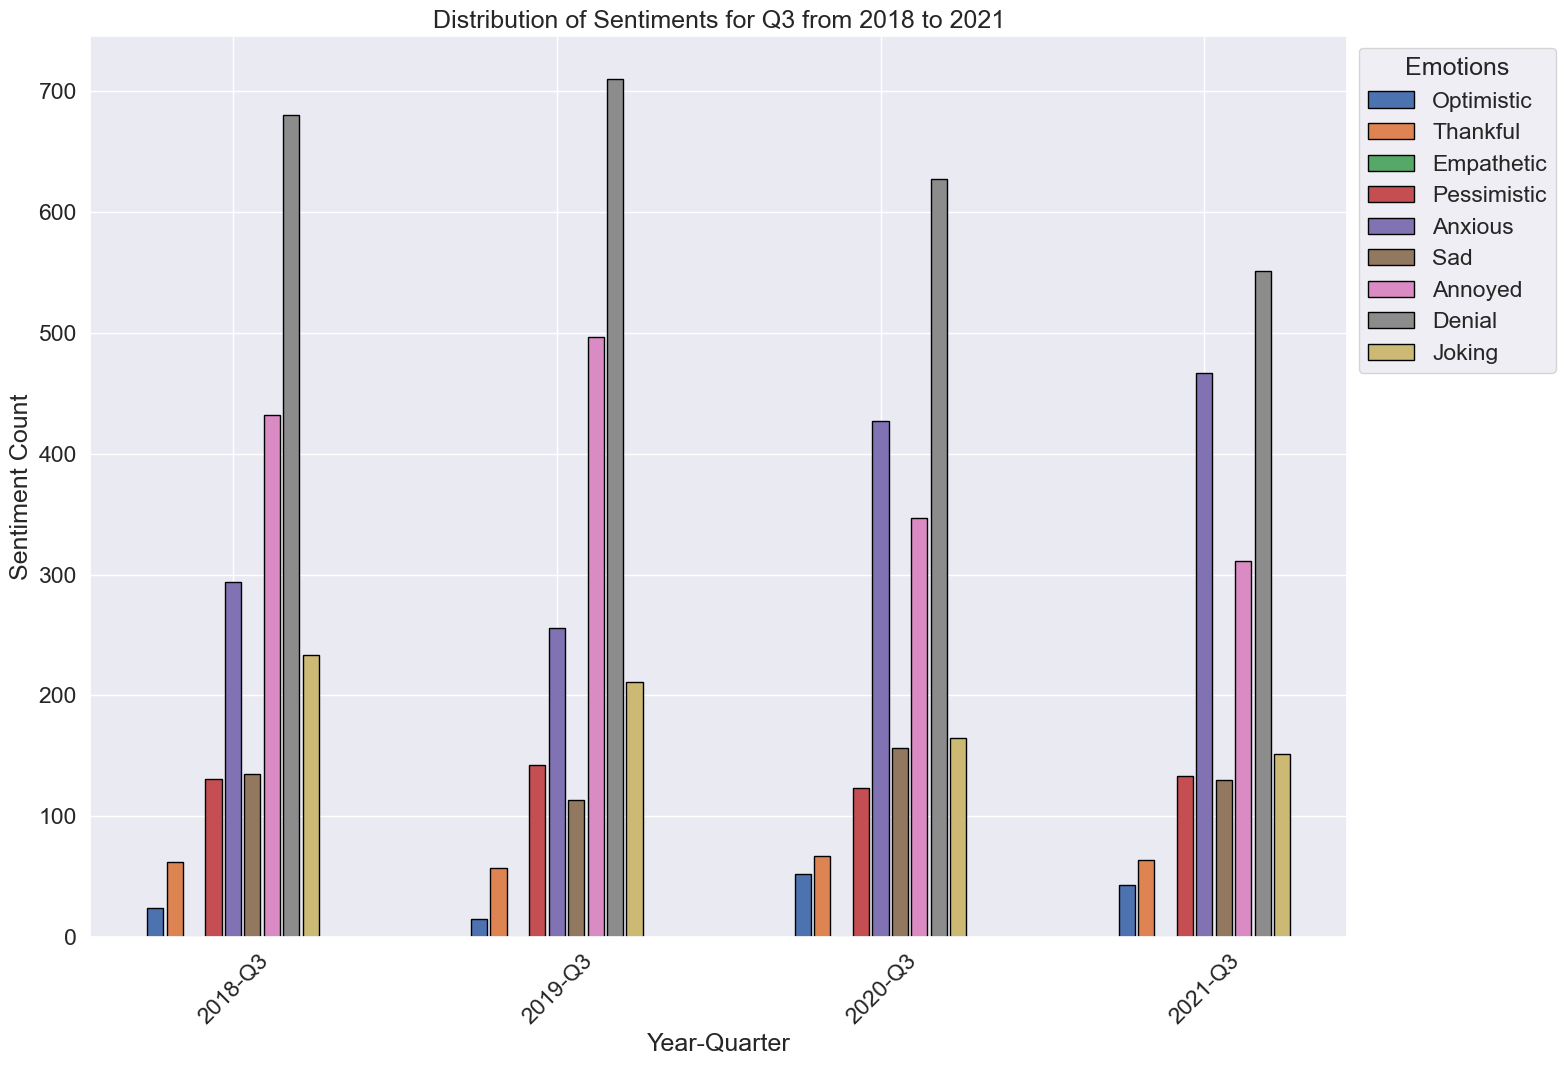

In [ ]:
def plot_third_quarter_sentiment(bert_data_drop, start_year, end_year):
    # 提取情感标签列
    emotions = bert_data_drop.columns[1:10]  # 第二列开始为情感标签
    # 仅选取指定年份的第三季度
    quarters = [f"{year}-Q3" for year in range(start_year, end_year + 1)]

    # 根据年份季度对数据进行分组，并计算每个季度内各情感类别的统计值
    quarterly_stats = {}
    for quarter in quarters:
        quarter_data = bert_data_drop[bert_data_drop['year_quarter'] == quarter]
        quarterly_stats[quarter] = quarter_data[emotions].sum()

    # 创建图表来可视化统计值
    x = np.arange(len(quarters))  # 使用数字索引而不是字符串标签
    width = 0.05  # 调整柱状图的宽度
    gap = 0.01  # 柱子间的间距

    plt.figure(figsize=(16, 11))  # 调整图表大小

    for i, emotion in enumerate(emotions):
        y_values = [quarterly_stats[quarter][emotion] for quarter in quarters]
        plt.bar(x + i * (width + gap), y_values, width, label=emotion, edgecolor='black')  # 添加边框颜色

    plt.xlabel('Year-Quarter')
    plt.ylabel('Sentiment Count')
    plt.title(f'Distribution of Sentiments for Q3 from {start_year} to {end_year}')
    plt.xticks(x + (len(emotions) - 1) * (width + gap) / 2, quarters, rotation=45)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Emotions")
    plt.tight_layout()

    plt.show()

# 调用函数，生成2018至2021年每年第三季度的情感分析图
plot_third_quarter_sentiment(bert_data_drop, 2018, 2021)


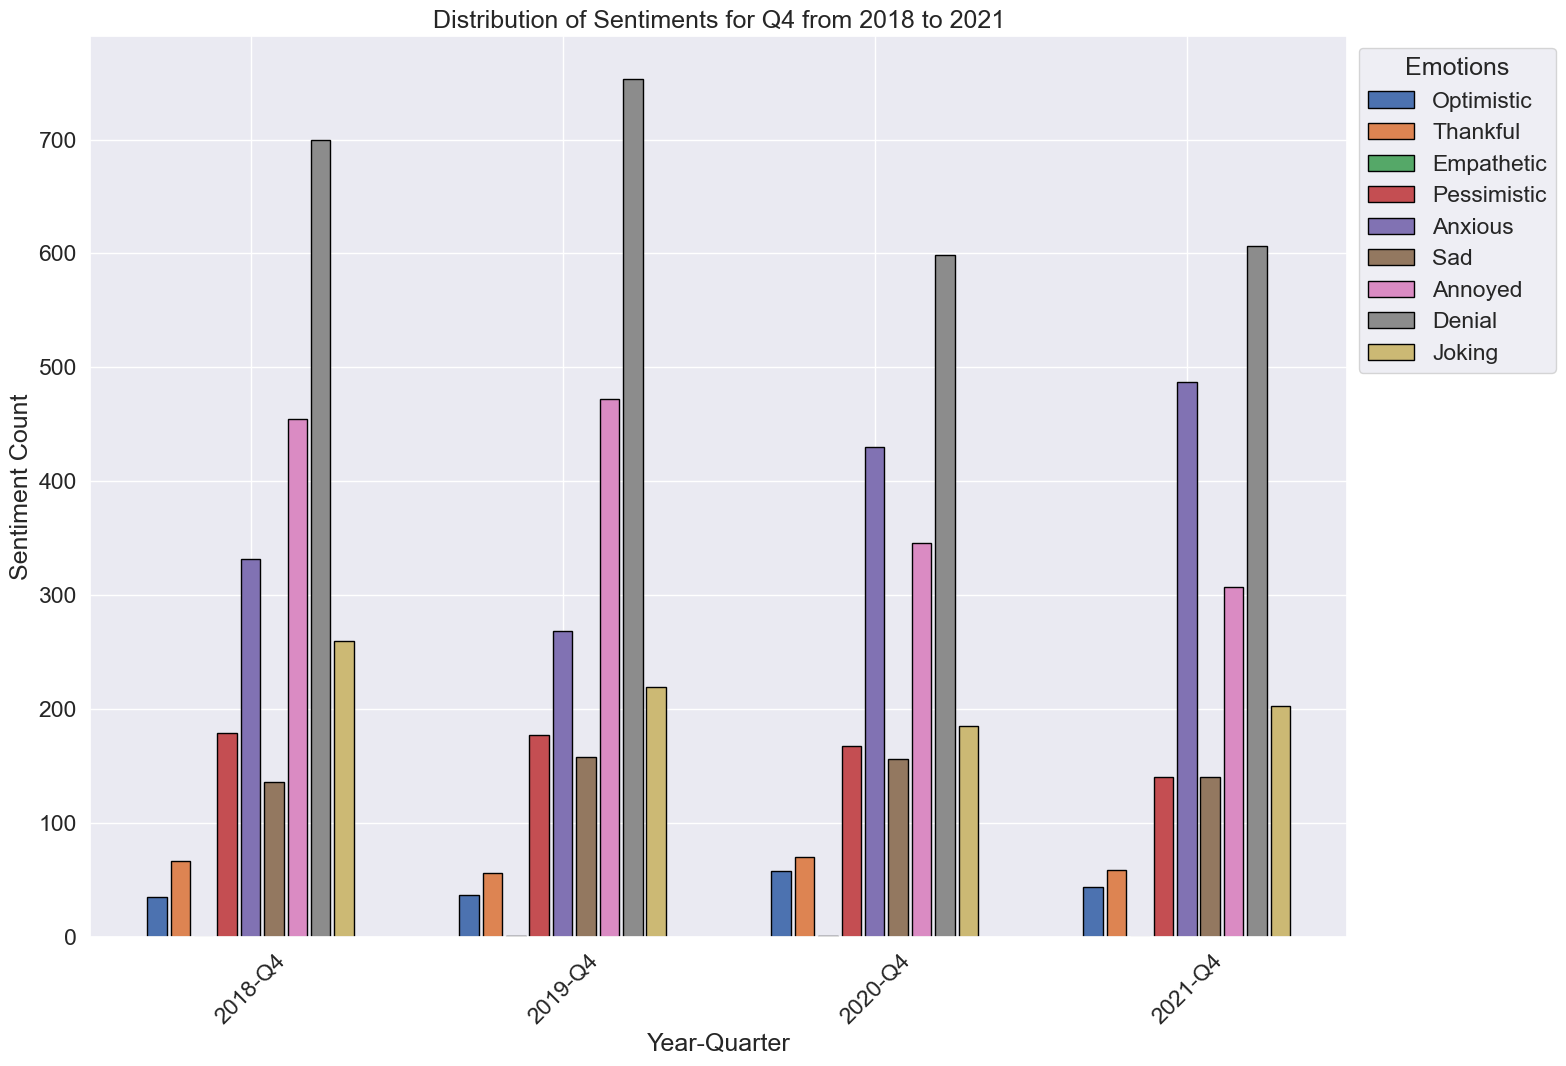

In [ ]:
def plot_fourth_quarter_sentiment(bert_data_drop, start_year, end_year):
    # 提取情感标签列
    emotions = bert_data_drop.columns[1:10]  # 第二列开始为情感标签
    # 仅选取指定年份的第四季度
    quarters = [f"{year}-Q4" for year in range(start_year, end_year + 1)]

    # 根据年份季度对数据进行分组，并计算每个季度内各情感类别的统计值
    quarterly_stats = {}
    for quarter in quarters:
        quarter_data = bert_data_drop[bert_data_drop['year_quarter'] == quarter]
        quarterly_stats[quarter] = quarter_data[emotions].sum()

    # 创建图表来可视化统计值
    x = np.arange(len(quarters))*0.8  # 使用数字索引而不是字符串标签
    width = 0.05  # 调整柱状图的宽度
    gap = 0.01  # 柱子间的间距

    plt.figure(figsize=(16, 11))  # 调整图表大小

    for i, emotion in enumerate(emotions):
        y_values = [quarterly_stats[quarter][emotion] for quarter in quarters]
        plt.bar(x + i * (width + gap), y_values, width, label=emotion, edgecolor='black')  # 添加边框颜色

    plt.xlabel('Year-Quarter')
    plt.ylabel('Sentiment Count')
    plt.title(f'Distribution of Sentiments for Q4 from {start_year} to {end_year}')
    plt.xticks(x + (len(emotions) - 1) * (width + gap) / 2, quarters, rotation=45)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Emotions")
    plt.tight_layout()

    plt.show()

# 调用函数，生成2018至2021年每年第四季度的情感分析图
plot_fourth_quarter_sentiment(bert_data_drop, 2018, 2021)


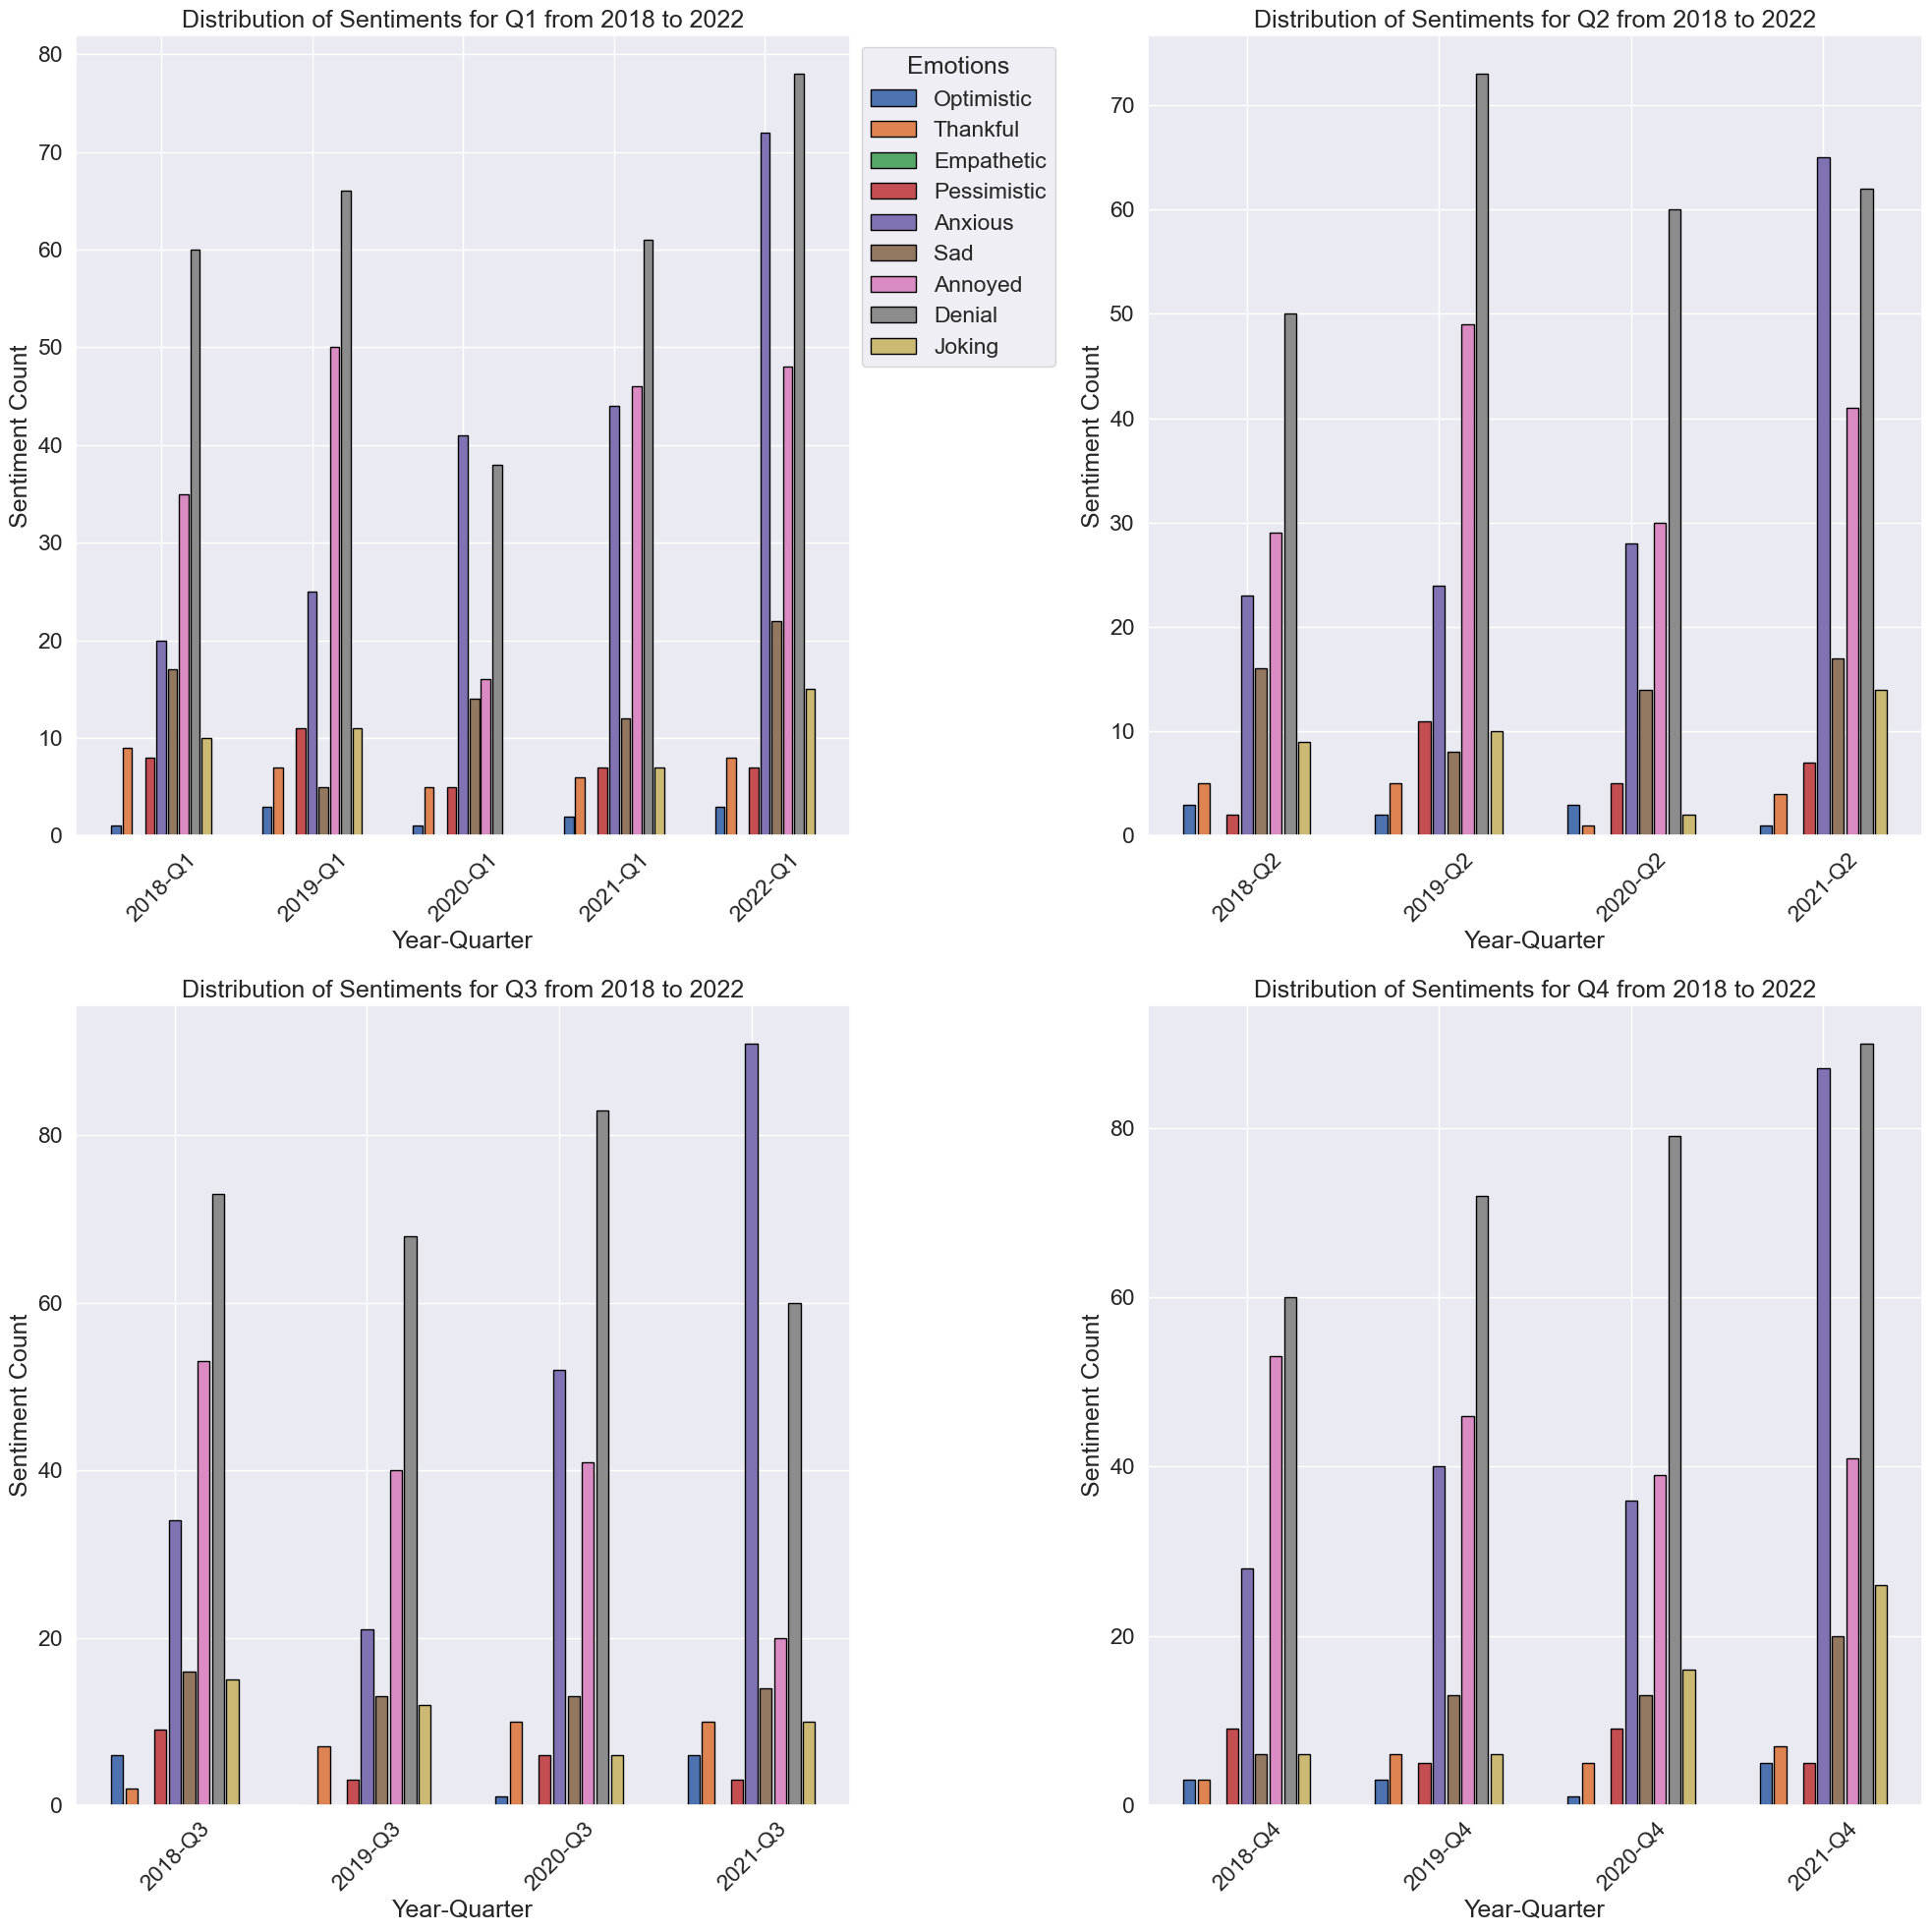

In [ ]:
def plot_quarterly_sentiment(aus_bert, start_year, end_year, last_quarter=4):
    # 提取情感标签列
    emotions = aus_bert.columns[1:10]  # 第二列开始为情感标签
    quarters_template = ['Q1', 'Q2', 'Q3', 'Q4']

    # 创建一个2x2的图形网格
    fig, axs = plt.subplots(2, 2, figsize=(20, 20))
    axs = axs.ravel()  # 将2x2网格展平以方便索引

    for idx, quarter_suffix in enumerate(quarters_template):
        quarters = []
        for year in range(start_year, end_year + 1):
            if year == end_year and quarter_suffix in quarters_template[:last_quarter]:
                quarters.append(f"{year}-{quarter_suffix}")
            elif year < end_year:
                quarters.append(f"{year}-{quarter_suffix}")

        if not quarters:  # 如果某一季度完全没有数据，则跳过
            continue

        quarterly_stats = {}
        for quarter in quarters:
            quarter_data = aus_bert[aus_bert['year_quarter'] == quarter]
            quarterly_stats[quarter] = quarter_data[emotions].sum()

        x = np.arange(len(quarters)) * 0.8  # 使用数字索引而不是字符串标签
        width = 0.05  # 条形图的宽度
        gap = 0.01  # 条形图间的间距

        for i, emotion in enumerate(emotions):
            y_values = [quarterly_stats[quarter][emotion] for quarter in quarters]
            axs[idx].bar(x + i * (width + gap), y_values, width, label=emotion, edgecolor='black')

        axs[idx].set_xlabel('Year-Quarter')
        axs[idx].set_ylabel('Sentiment Count')
        axs[idx].set_title(f'Distribution of Sentiments for {quarter_suffix} from {start_year} to {end_year}')
        axs[idx].set_xticks(x + (len(emotions) - 1) * (width + gap) / 2)
        axs[idx].set_xticklabels(quarters, rotation=45)
        if idx == 0:
            axs[idx].legend(loc='upper left', bbox_to_anchor=(1, 1), title="Emotions")

    plt.tight_layout()
    plt.show()

# 假设bert_data_drop是你的数据集变量
# 假设2022年只有第一季度的数据，所以last_quarter设置为1
plot_quarterly_sentiment(aus_bert, 2018, 2022, last_quarter=1)

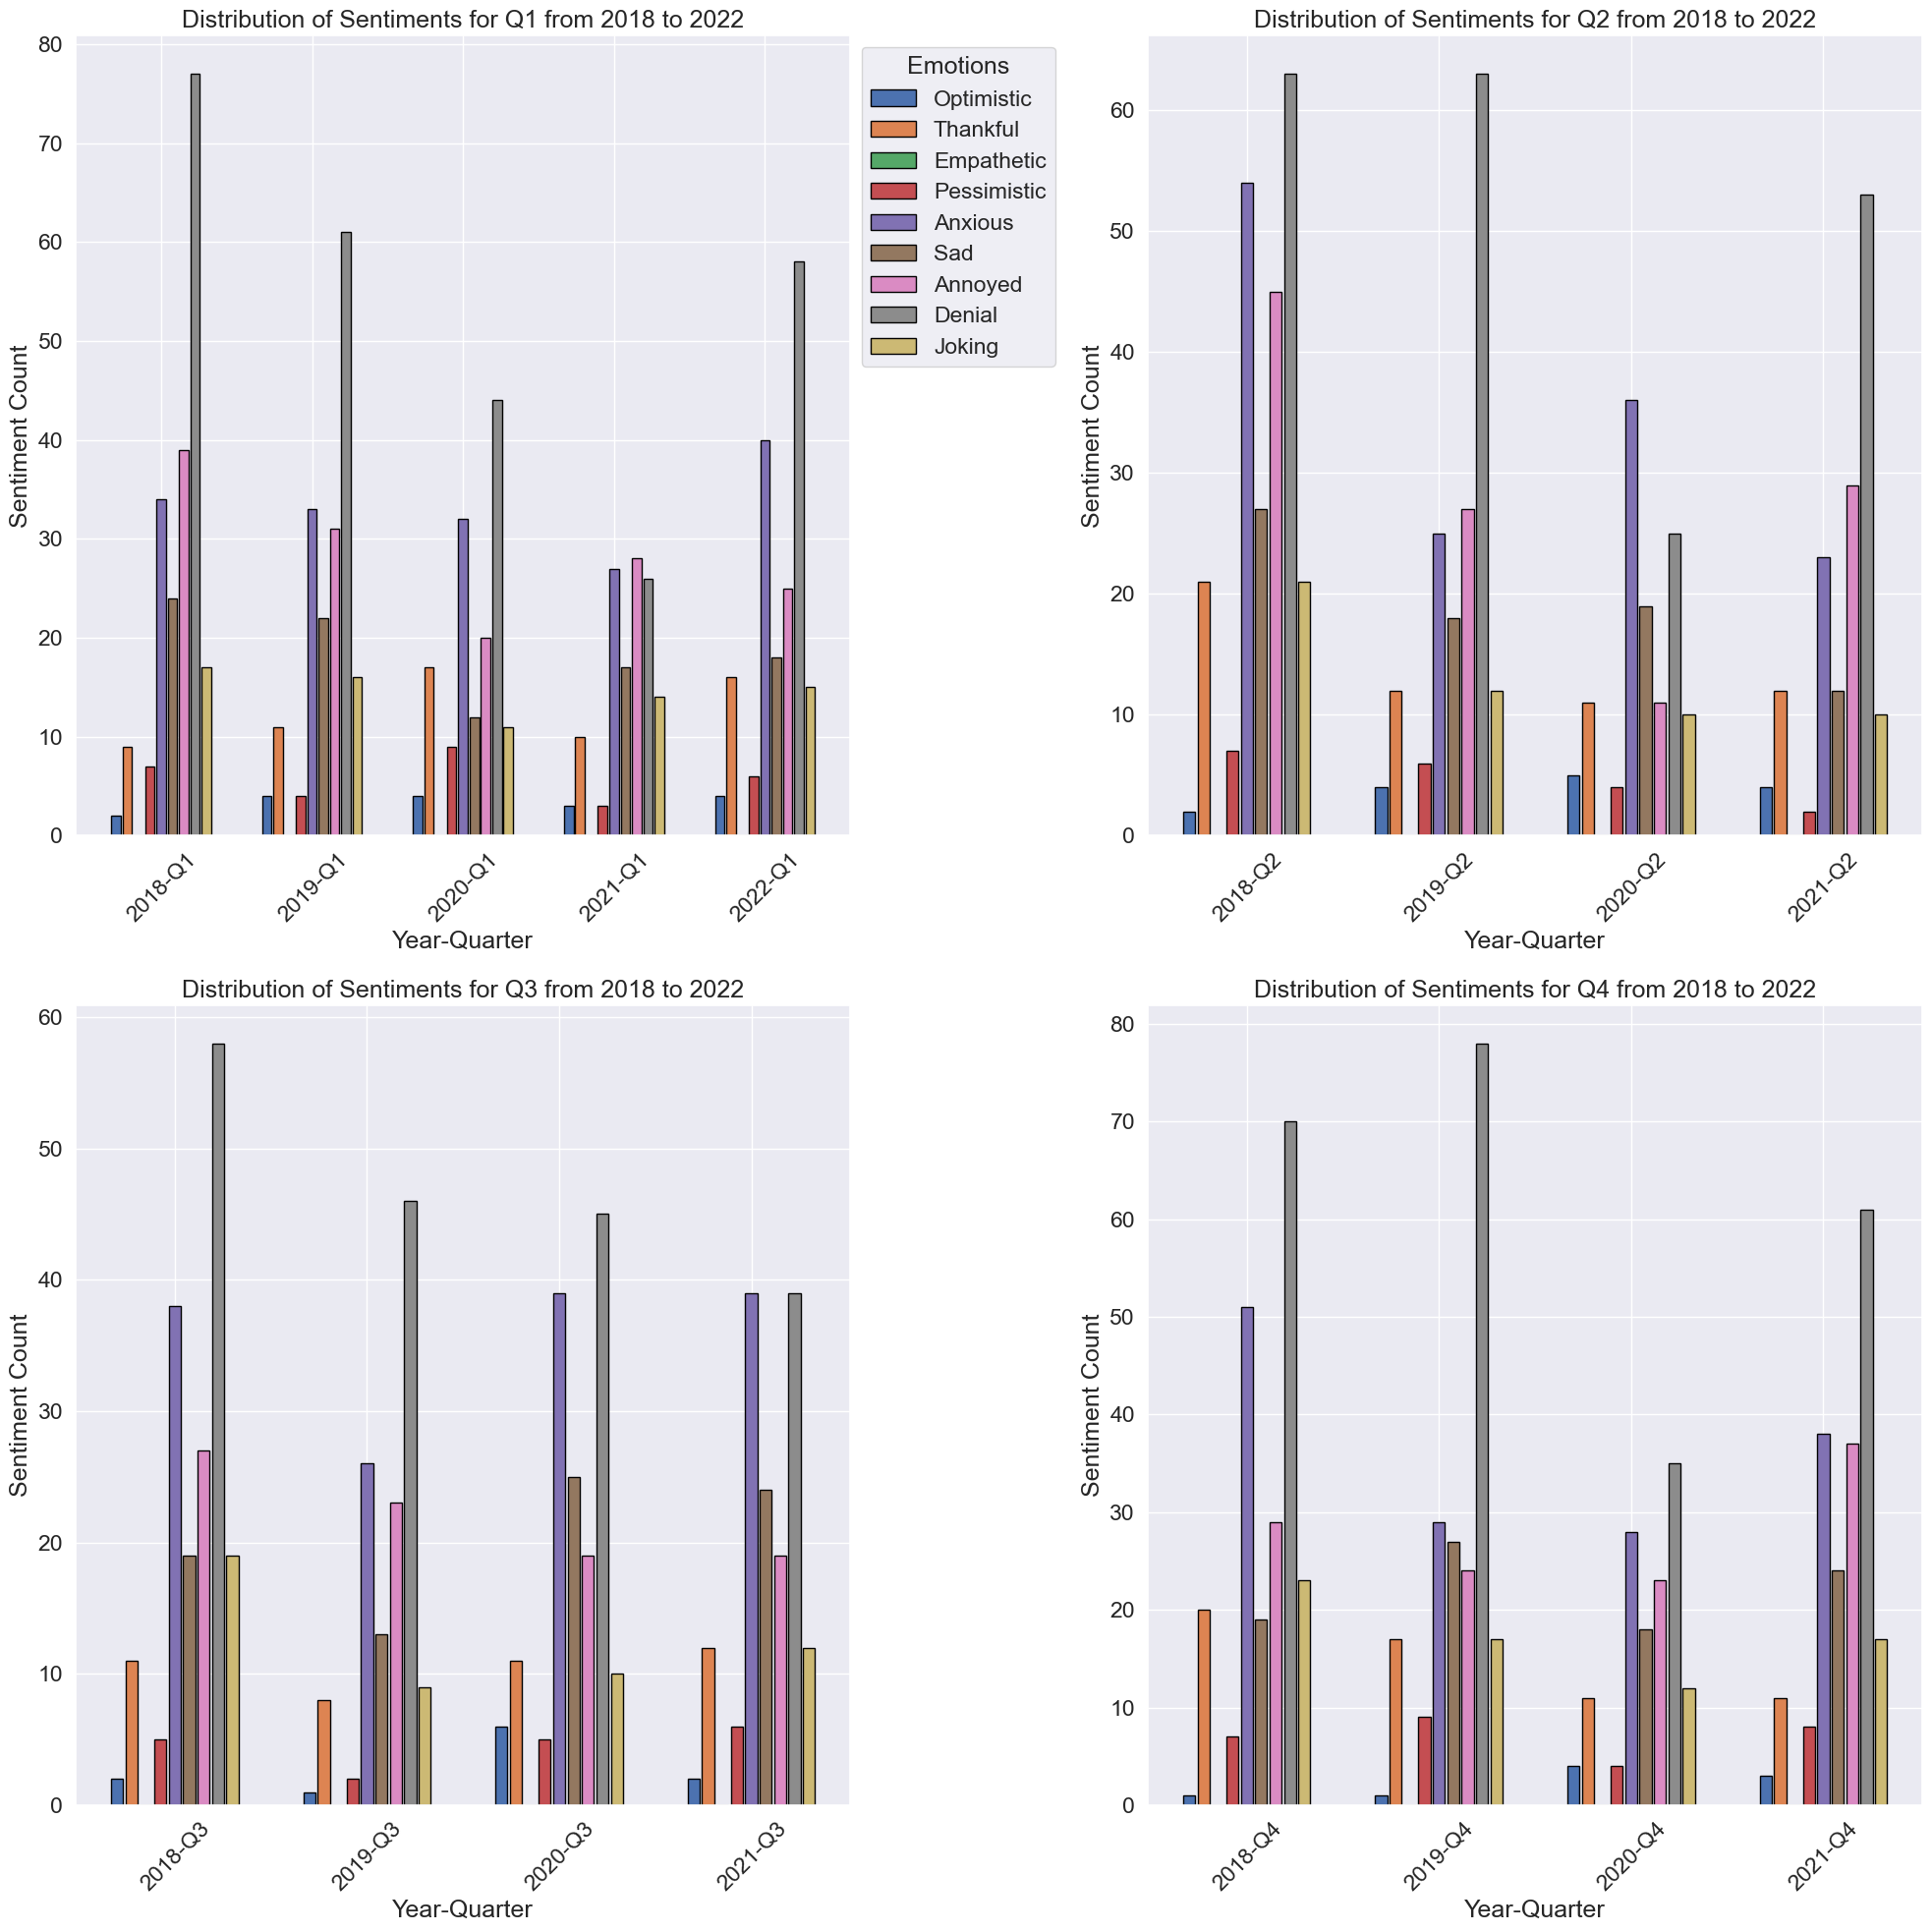

In [ ]:
def plot_quarterly_sentiment(uk_bert, start_year, end_year, last_quarter=4):
    # 提取情感标签列
    emotions = uk_bert.columns[1:10]  # 第二列开始为情感标签
    quarters_template = ['Q1', 'Q2', 'Q3', 'Q4']

    # 创建一个2x2的图形网格
    fig, axs = plt.subplots(2, 2, figsize=(20, 20))
    axs = axs.ravel()  # 将2x2网格展平以方便索引

    for idx, quarter_suffix in enumerate(quarters_template):
        quarters = []
        for year in range(start_year, end_year + 1):
            if year == end_year and quarter_suffix in quarters_template[:last_quarter]:
                quarters.append(f"{year}-{quarter_suffix}")
            elif year < end_year:
                quarters.append(f"{year}-{quarter_suffix}")

        if not quarters:  # 如果某一季度完全没有数据，则跳过
            continue

        quarterly_stats = {}
        for quarter in quarters:
            quarter_data = uk_bert[uk_bert['year_quarter'] == quarter]
            quarterly_stats[quarter] = quarter_data[emotions].sum()

        x = np.arange(len(quarters)) * 0.8  # 使用数字索引而不是字符串标签
        width = 0.05  # 条形图的宽度
        gap = 0.01  # 条形图间的间距

        for i, emotion in enumerate(emotions):
            y_values = [quarterly_stats[quarter][emotion] for quarter in quarters]
            axs[idx].bar(x + i * (width + gap), y_values, width, label=emotion, edgecolor='black')

        axs[idx].set_xlabel('Year-Quarter')
        axs[idx].set_ylabel('Sentiment Count')
        axs[idx].set_title(f'Distribution of Sentiments for {quarter_suffix} from {start_year} to {end_year}')
        axs[idx].set_xticks(x + (len(emotions) - 1) * (width + gap) / 2)
        axs[idx].set_xticklabels(quarters, rotation=45)
        if idx == 0:
            axs[idx].legend(loc='upper left', bbox_to_anchor=(1, 1), title="Emotions")

    plt.tight_layout()
    plt.show()

# 假设bert_data_drop是你的数据集变量
# 假设2022年只有第一季度的数据，所以last_quarter设置为1
plot_quarterly_sentiment(uk_bert, 2018, 2022, last_quarter=1)

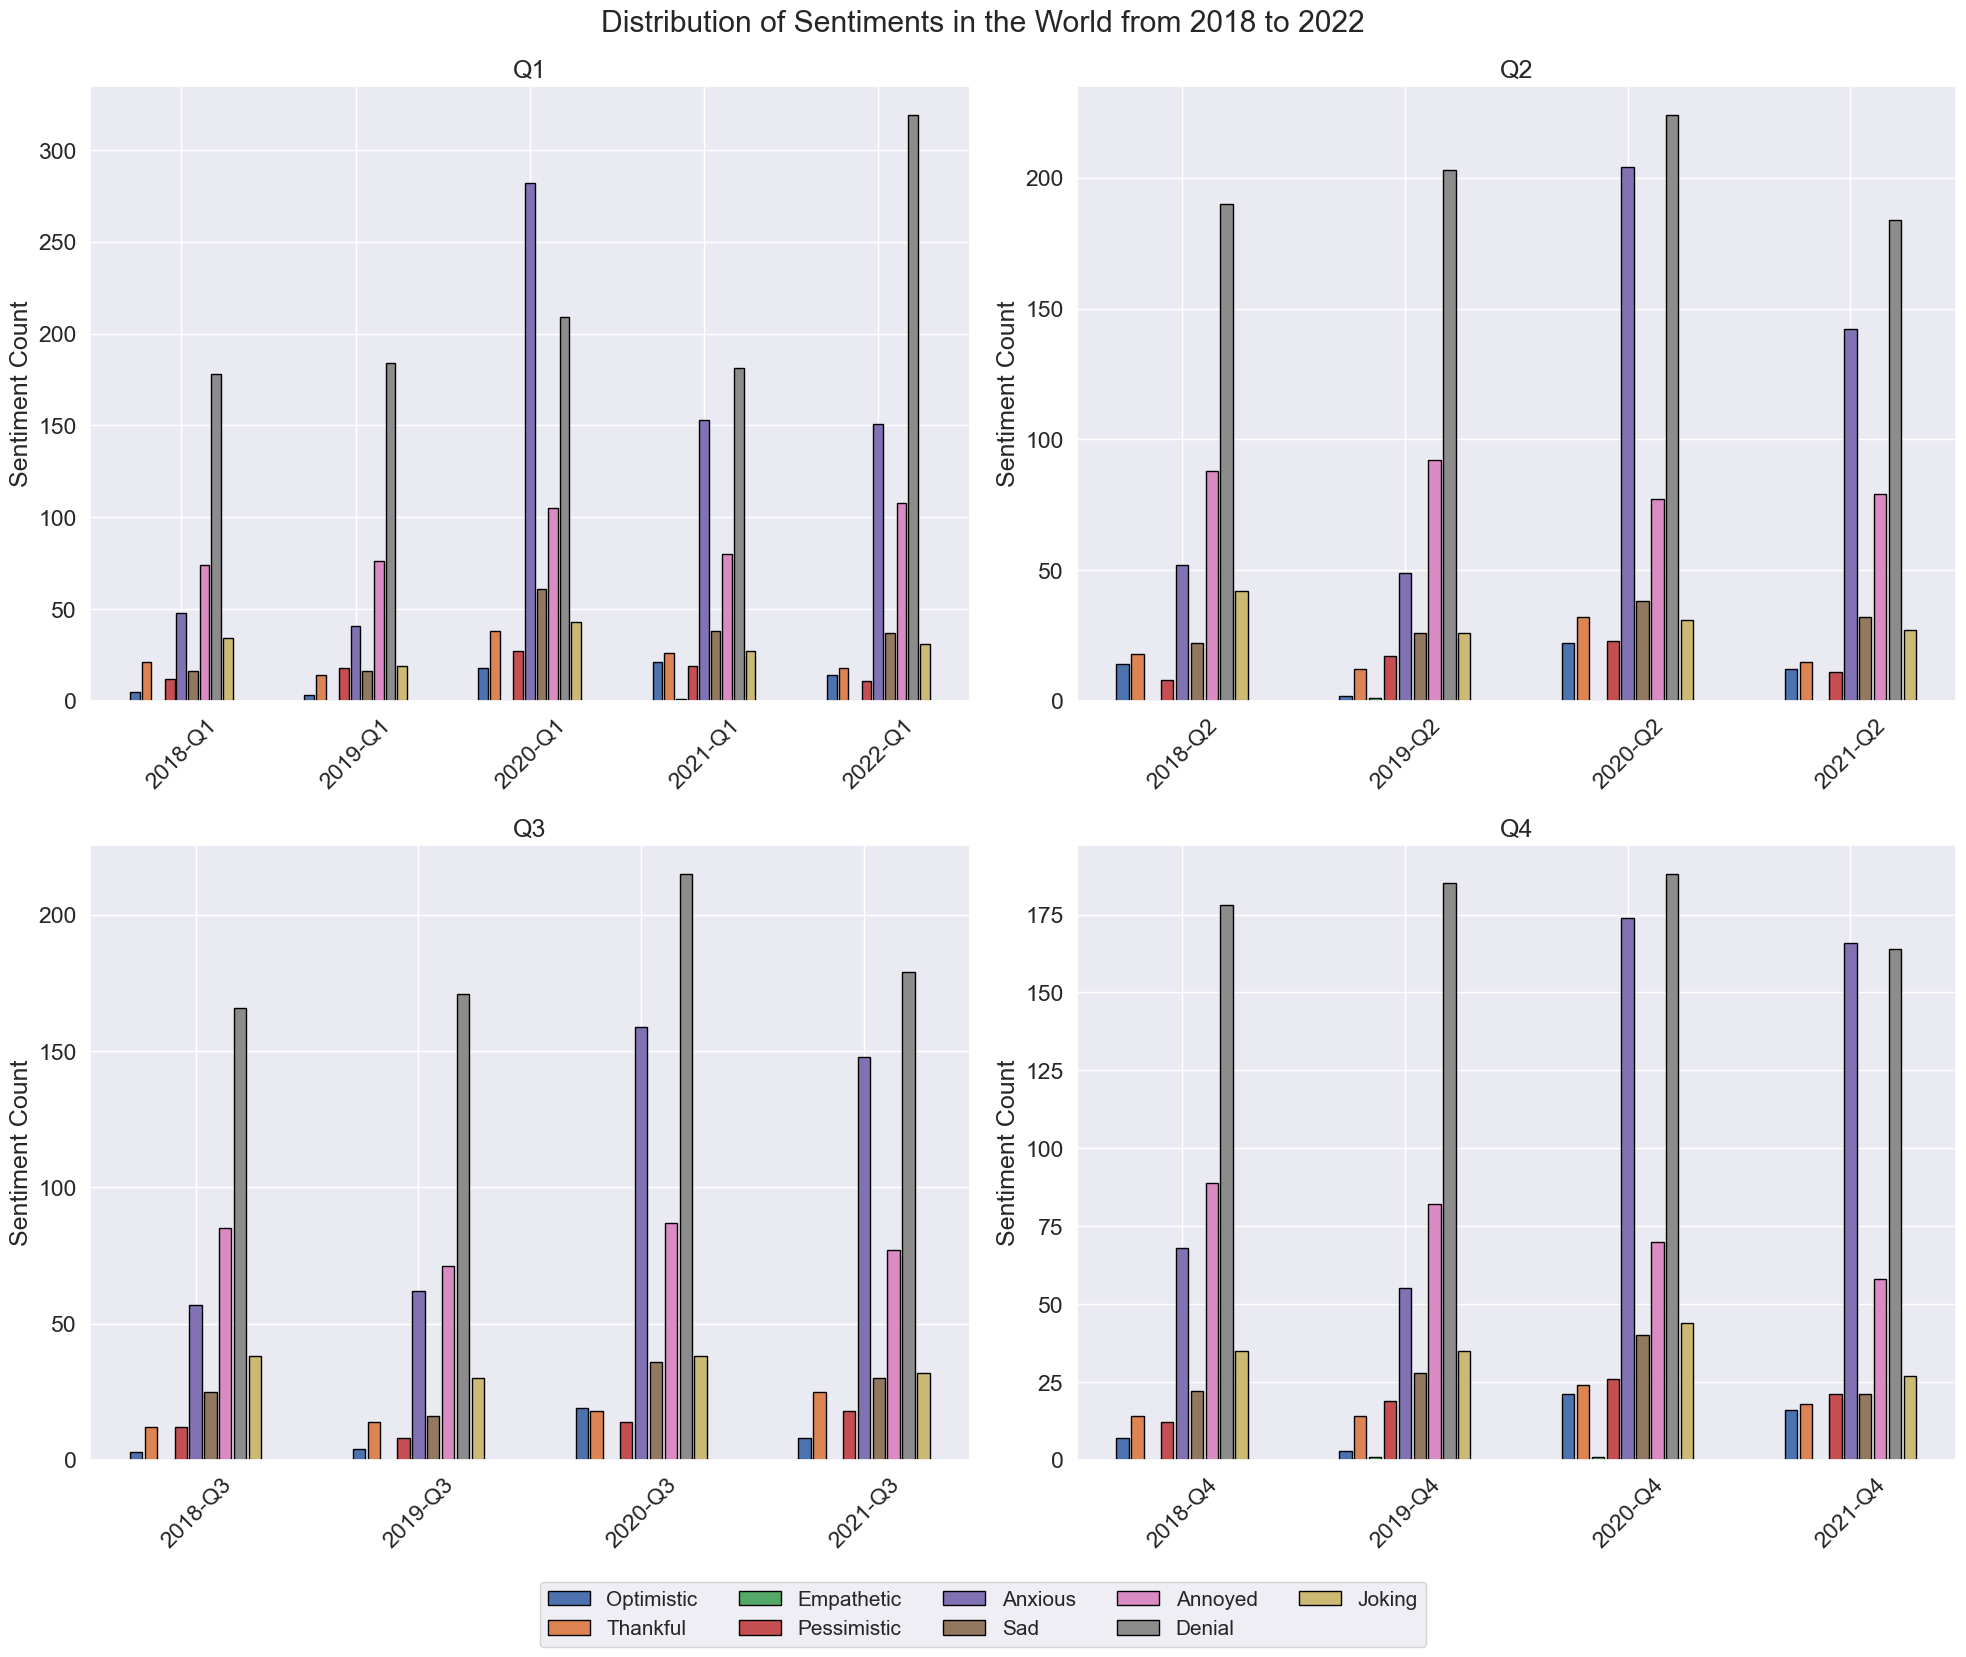

In [ ]:
def plot_quarterly_sentiment(world_bert, start_year, end_year, last_quarter=4):
    # 提取情感标签列
    emotions = world_bert.columns[1:10]  # 第二列开始为情感标签
    quarters_template = ['Q1', 'Q2', 'Q3', 'Q4']

    # 创建一个2x2的图形网格
    fig, axs = plt.subplots(2, 2, figsize=(20, 16))
    axs = axs.ravel()  # 将2x2网格展平以方便索引

    for idx, quarter_suffix in enumerate(quarters_template):
        quarters = []
        for year in range(start_year, end_year + 1):
            if year == end_year and quarter_suffix in quarters_template[:last_quarter]:
                quarters.append(f"{year}-{quarter_suffix}")
            elif year < end_year:
                quarters.append(f"{year}-{quarter_suffix}")

        if not quarters:  # 如果某一季度完全没有数据，则跳过
            continue

        quarterly_stats = {}
        for quarter in quarters:
            quarter_data = world_bert[world_bert['year_quarter'] == quarter]
            quarterly_stats[quarter] = quarter_data[emotions].sum()

        x = np.arange(len(quarters)) * 0.9  # 使用数字索引而不是字符串标签
        width = 0.05  # 条形图的宽度
        gap = 0.01  # 条形图间的间距

        for i, emotion in enumerate(emotions):
            y_values = [quarterly_stats[quarter][emotion] for quarter in quarters]
            axs[idx].bar(x + i * (width + gap), y_values, width, label=emotion, edgecolor='black')


        axs[idx].set_ylabel('Sentiment Count')
        axs[idx].set_title(f'{quarter_suffix}')
        axs[idx].set_xticks(x + (len(emotions) - 1) * (width + gap) / 2)
        axs[idx].set_xticklabels(quarters, rotation=45)

    handles, labels = axs[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=5, fontsize='small')
    plt.suptitle(f'Distribution of Sentiments in the World from {start_year} to {end_year}')
    plt.tight_layout()
    plt.show()

# 假设bert_data_drop是你的数据集变量
# 假设2022年只有第一季度的数据，所以last_quarter设置为1
plot_quarterly_sentiment(world_bert, 2018, 2022, last_quarter=1)

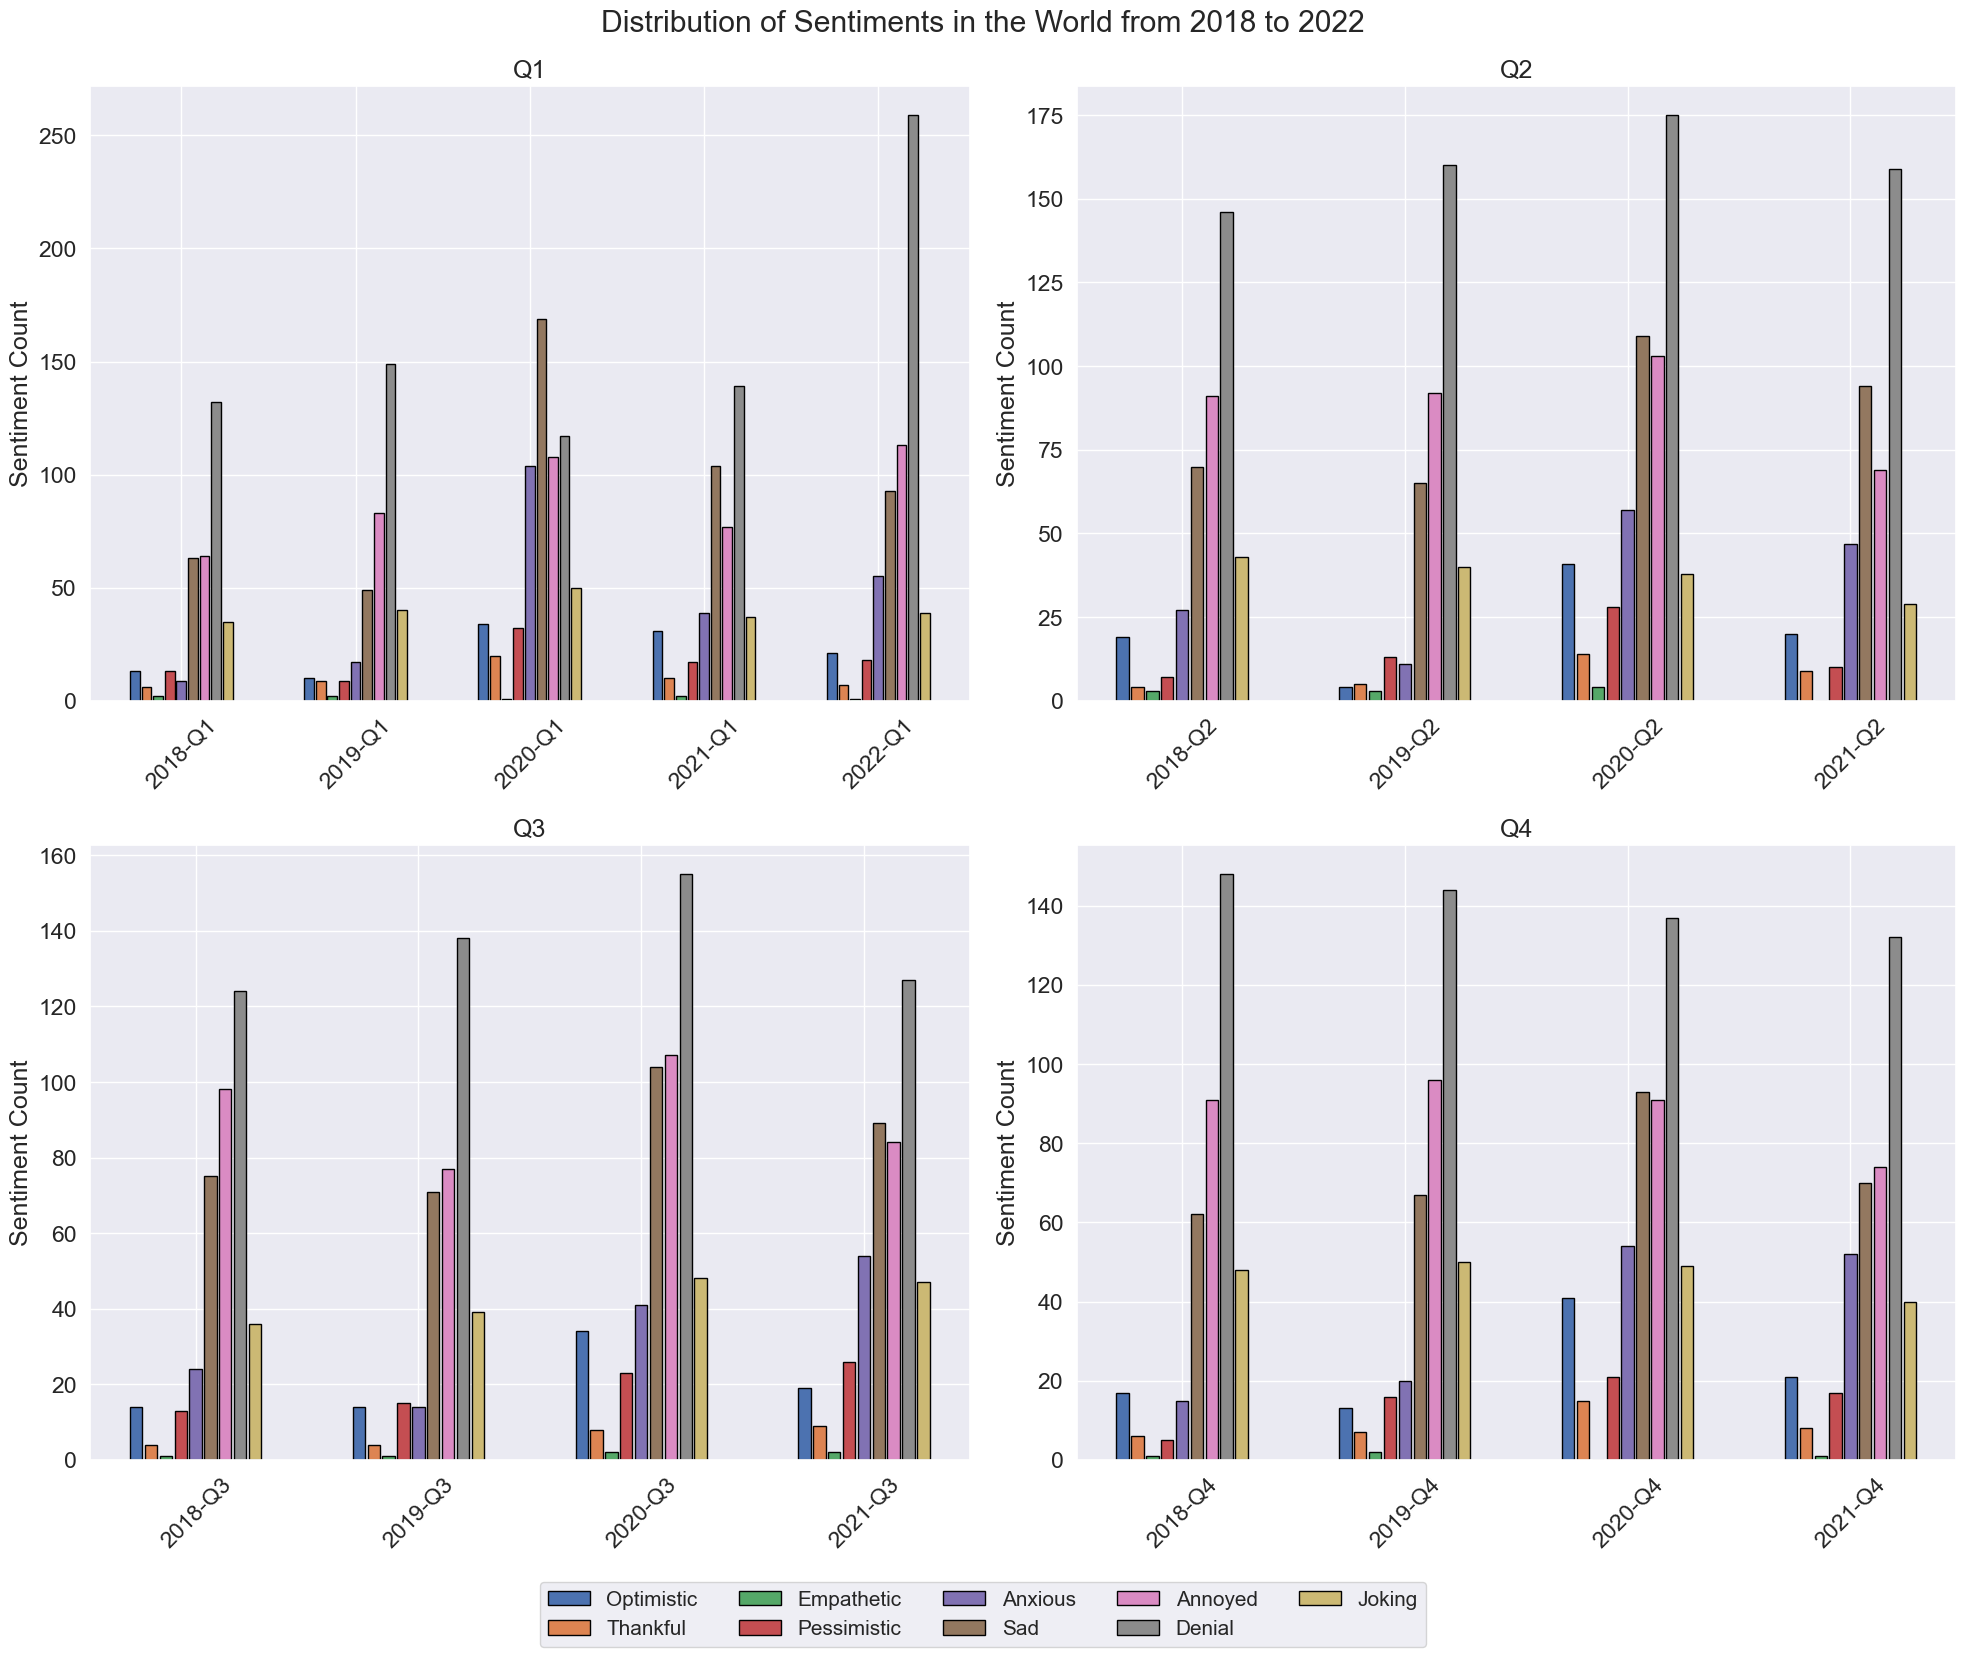

In [ ]:
plot_quarterly_sentiment(world_roberta, 2018, 2022, last_quarter=1)

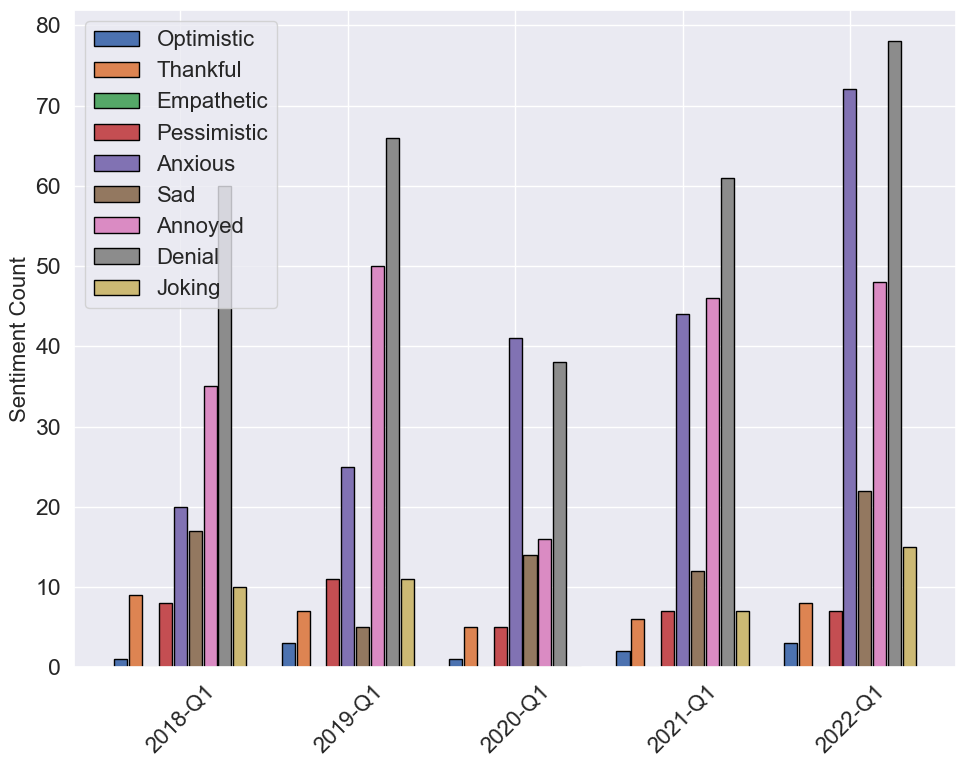

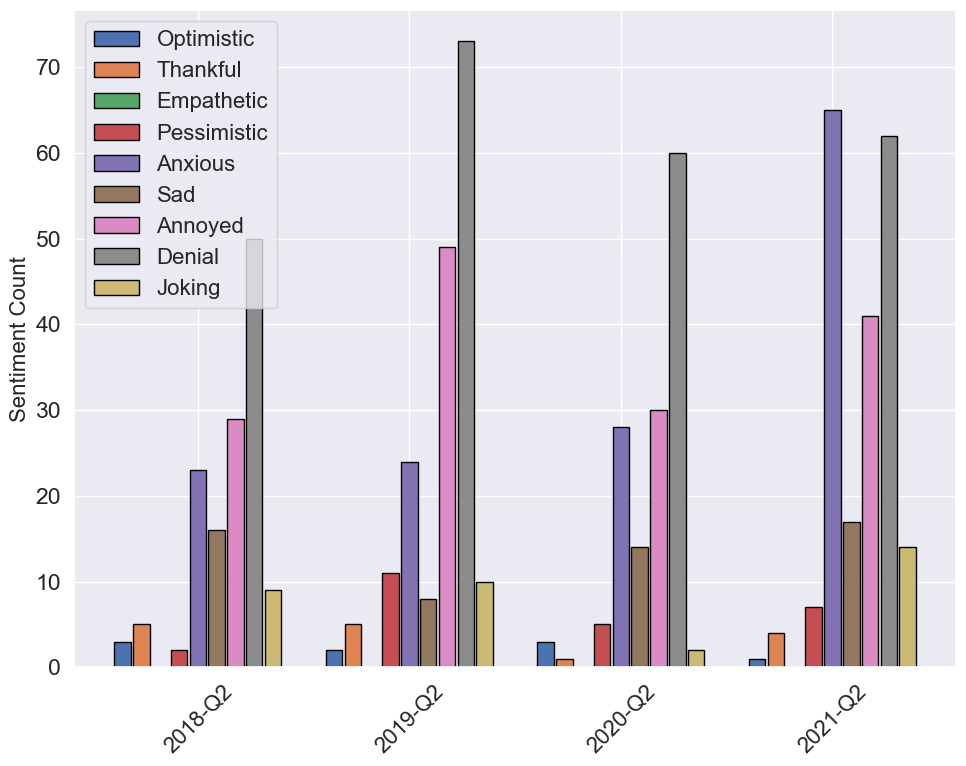

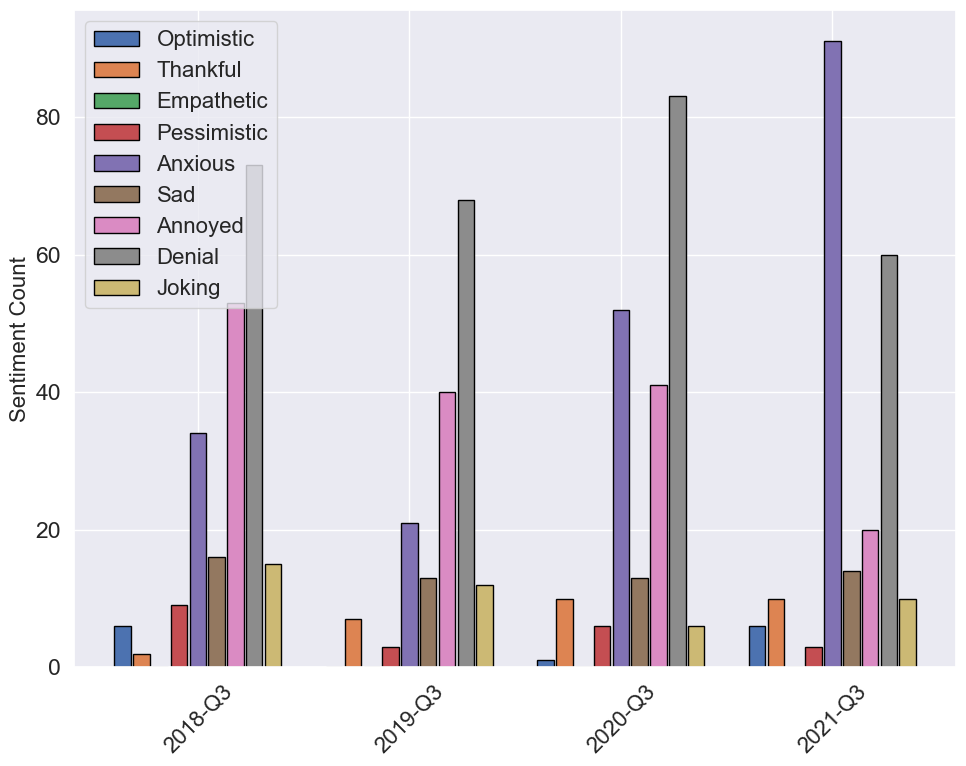

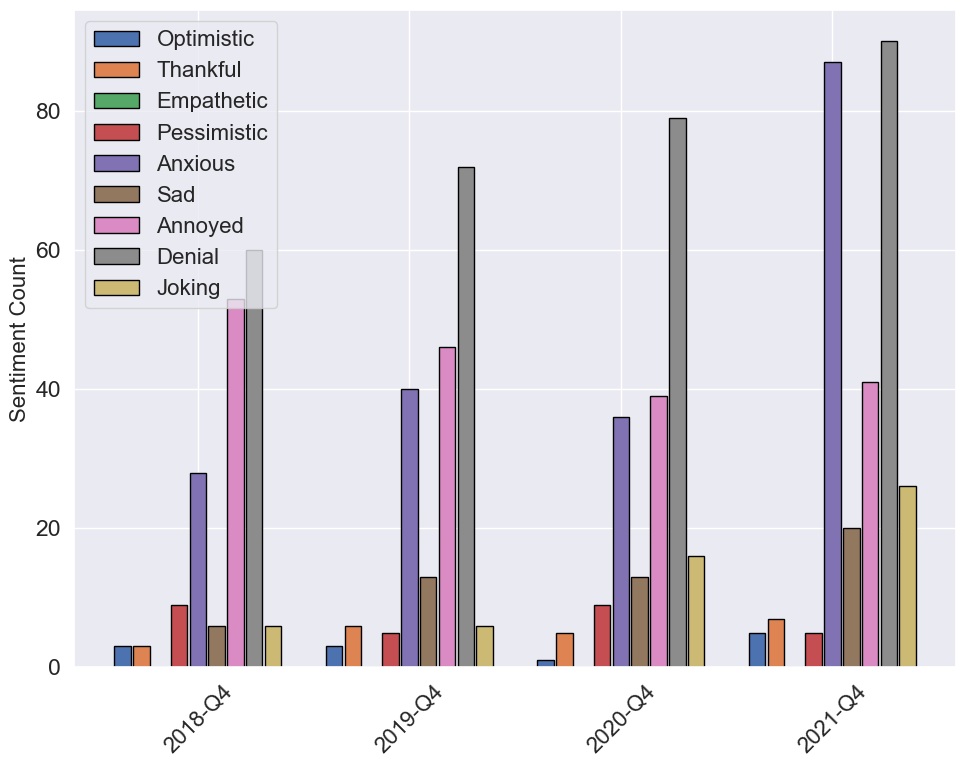

In [ ]:
def plot_quarterly_sentiment(world_bert, start_year, end_year, last_quarter=4):
    # 提取情感标签列
    emotions = world_bert.columns[1:10]  # 第二列开始为情感标签
    quarters_template = ['Q1', 'Q2', 'Q3', 'Q4']

    for idx, quarter_suffix in enumerate(quarters_template):
        quarters = []
        for year in range(start_year, end_year + 1):
            if year == end_year and quarter_suffix in quarters_template[:last_quarter]:
                quarters.append(f"{year}-{quarter_suffix}")
            elif year < end_year:
                quarters.append(f"{year}-{quarter_suffix}")

        if not quarters:  # 如果某一季度完全没有数据，则跳过
            continue

        quarterly_stats = {}
        for quarter in quarters:
            quarter_data = world_bert[world_bert['year_quarter'] == quarter]
            quarterly_stats[quarter] = quarter_data[emotions].sum()

        x = np.arange(len(quarters)) * 0.9  # 使用数字索引而不是字符串标签
        width = 0.07  # 条形图的宽度
        gap = 0.01  # 条形图间的间距

        fig, ax = plt.subplots(figsize=(10, 8))

        for i, emotion in enumerate(emotions):
            y_values = [quarterly_stats[quarter][emotion] for quarter in quarters]
            ax.bar(x + i * (width + gap), y_values, width, label=emotion, edgecolor='black')

        ax.set_ylabel('Sentiment Count', fontsize=16)
        #ax.set_title(f'Distribution of Sentiments in the World from {start_year} to {end_year} - {quarter_suffix}')
        ax.set_xticks(x + (len(emotions) - 1) * (width + gap) / 2)
        ax.set_xticklabels(quarters, rotation=45, fontsize=16)

        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels, loc='upper left', fontsize=16)
        plt.tight_layout()
        plt.show()

# 假设bert_data_drop是你的数据集变量
# 假设2022年只有第一季度的数据，所以last_quarter设置为1
plot_quarterly_sentiment(aus_bert, 2018, 2022, last_quarter=1)


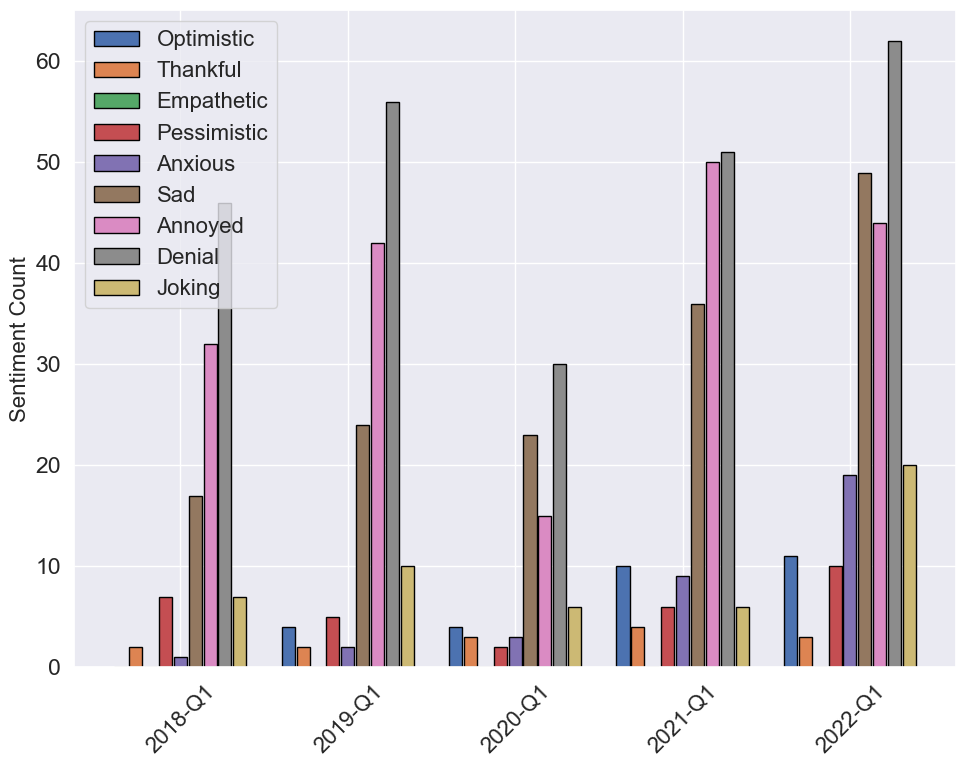

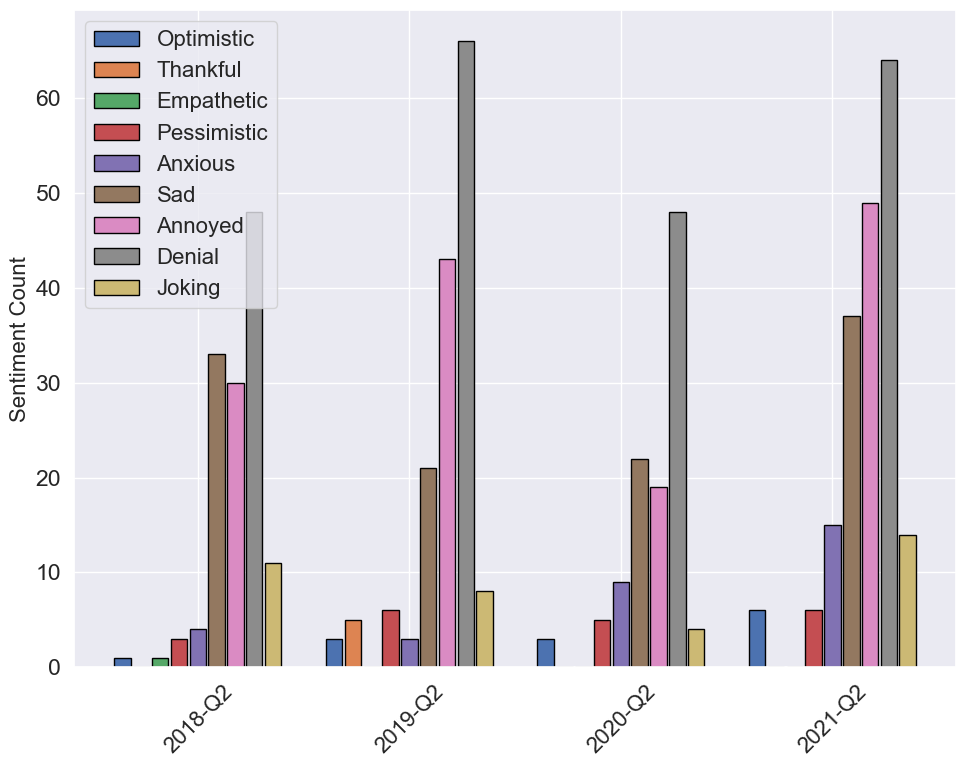

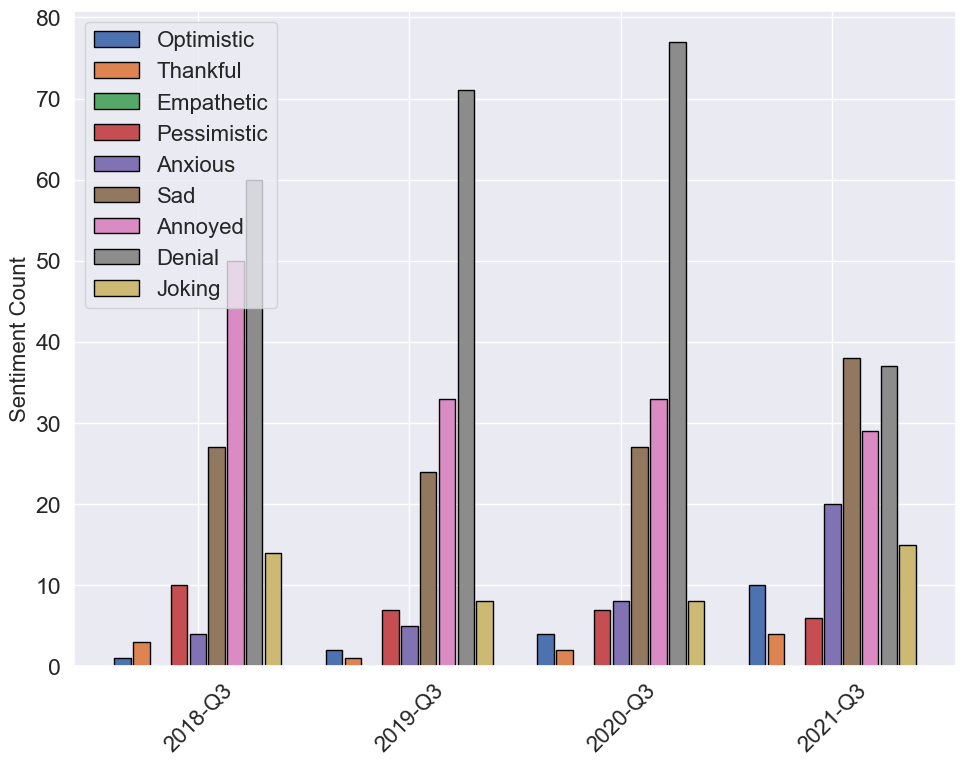

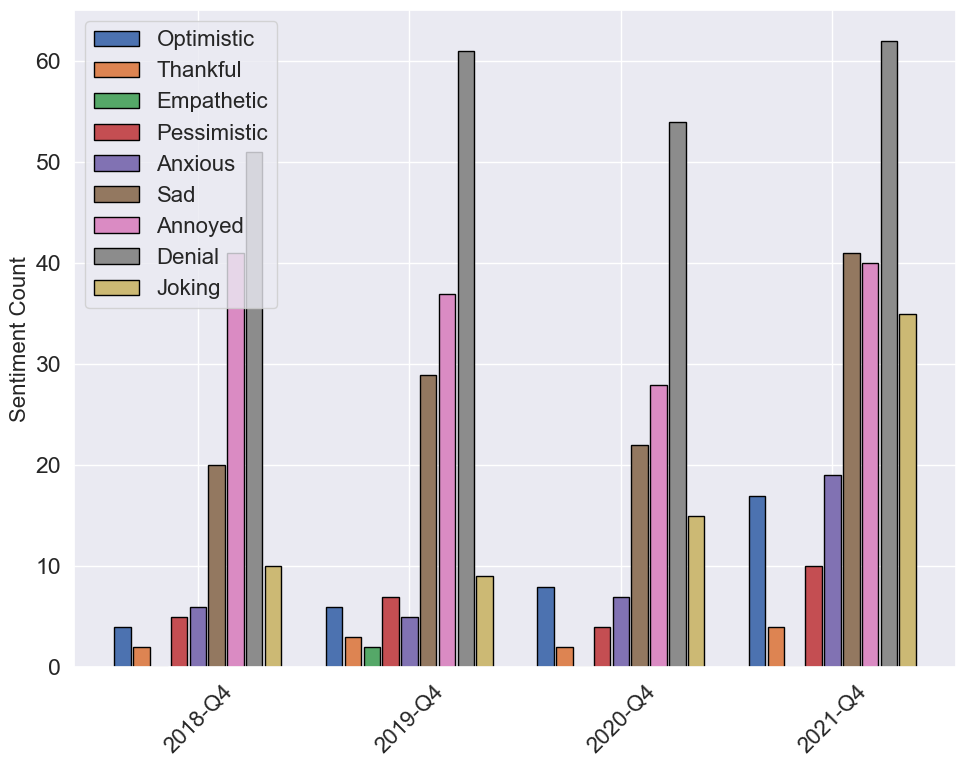

In [ ]:
plot_quarterly_sentiment(aus_roberta, 2018, 2022, last_quarter=1)

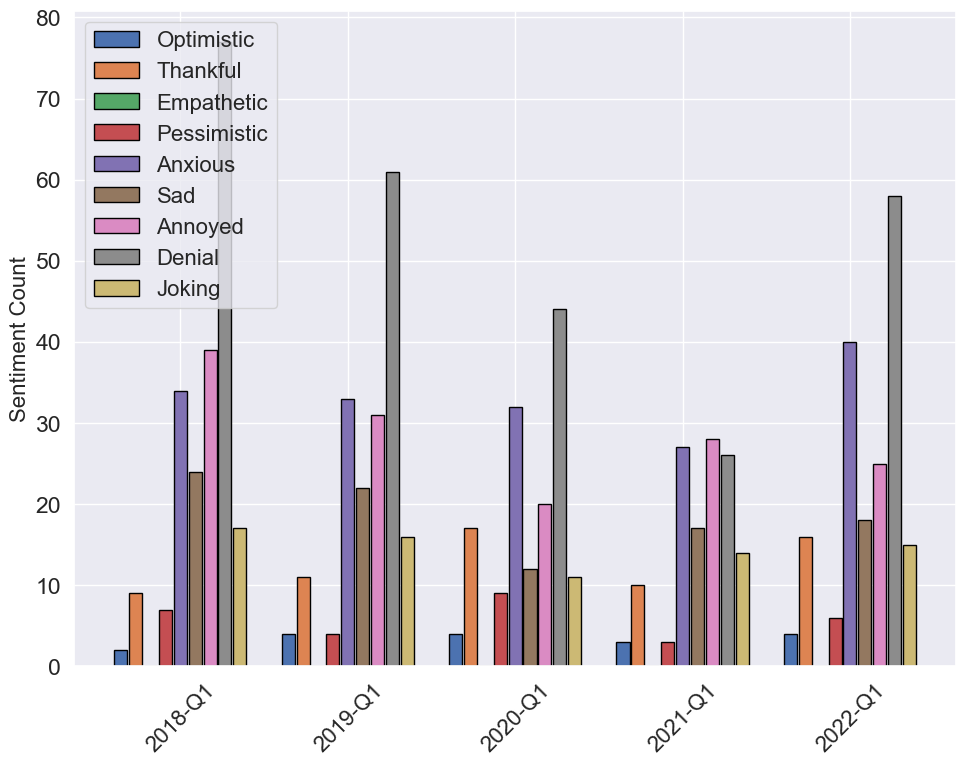

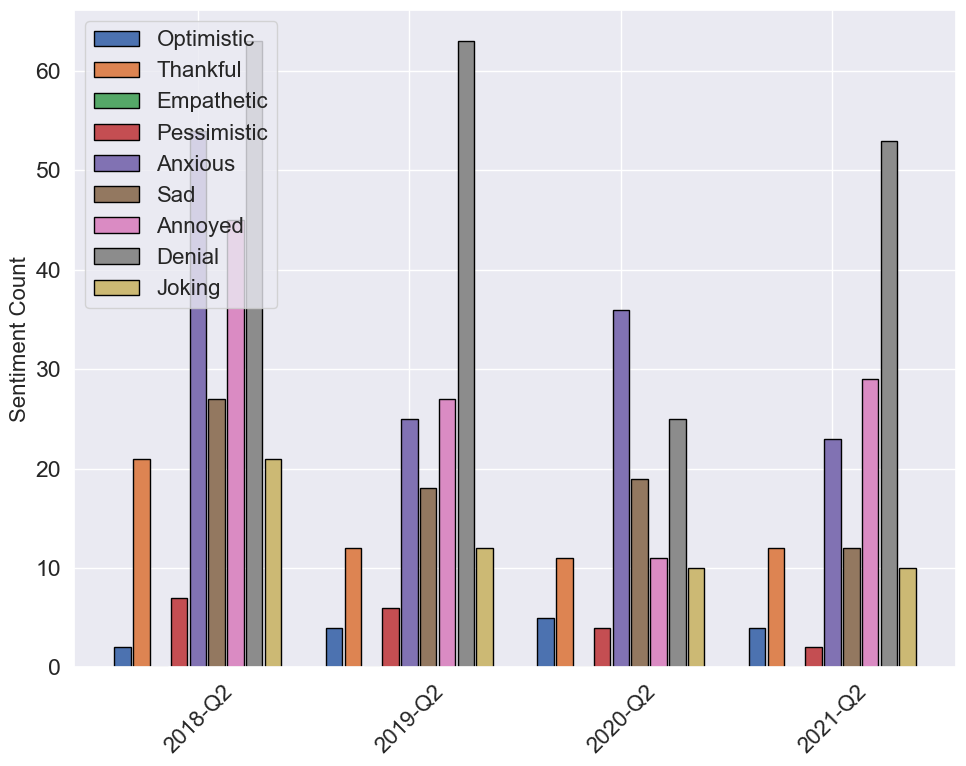

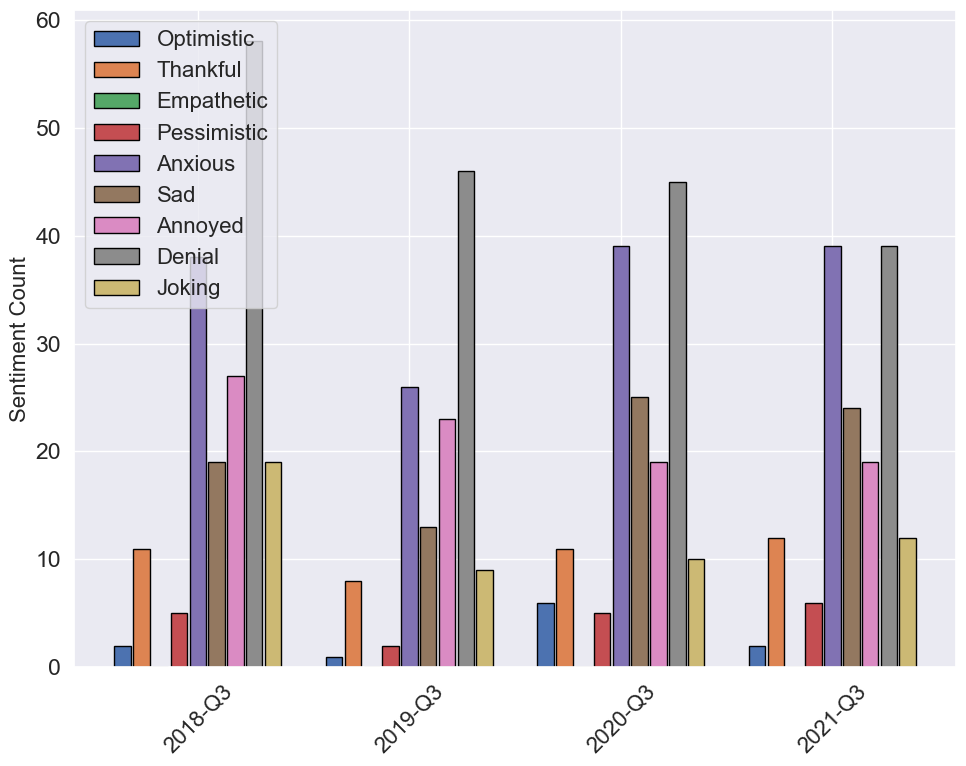

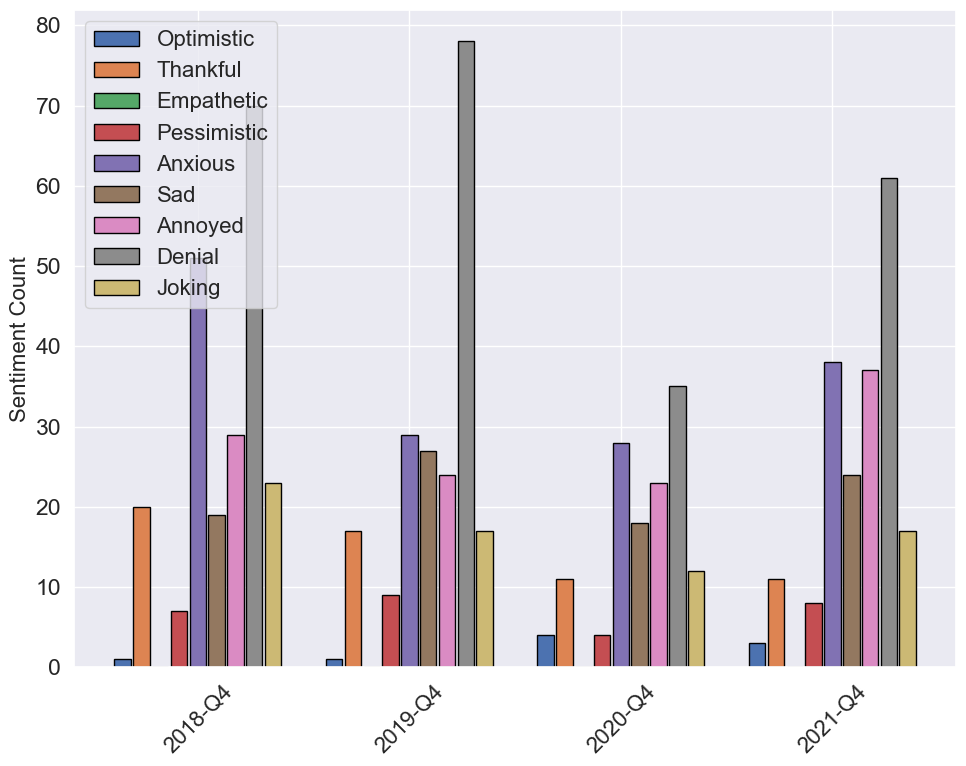

In [ ]:
#plot_quarterly_sentiment(uk_bert, 2018, 2022, last_quarter=1)

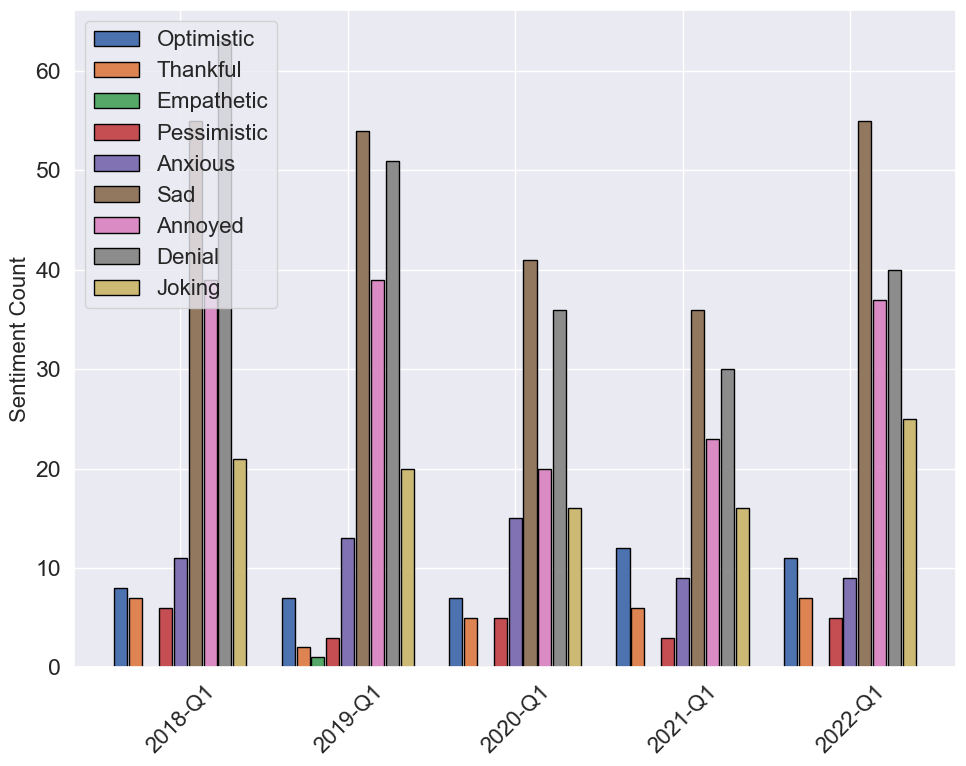

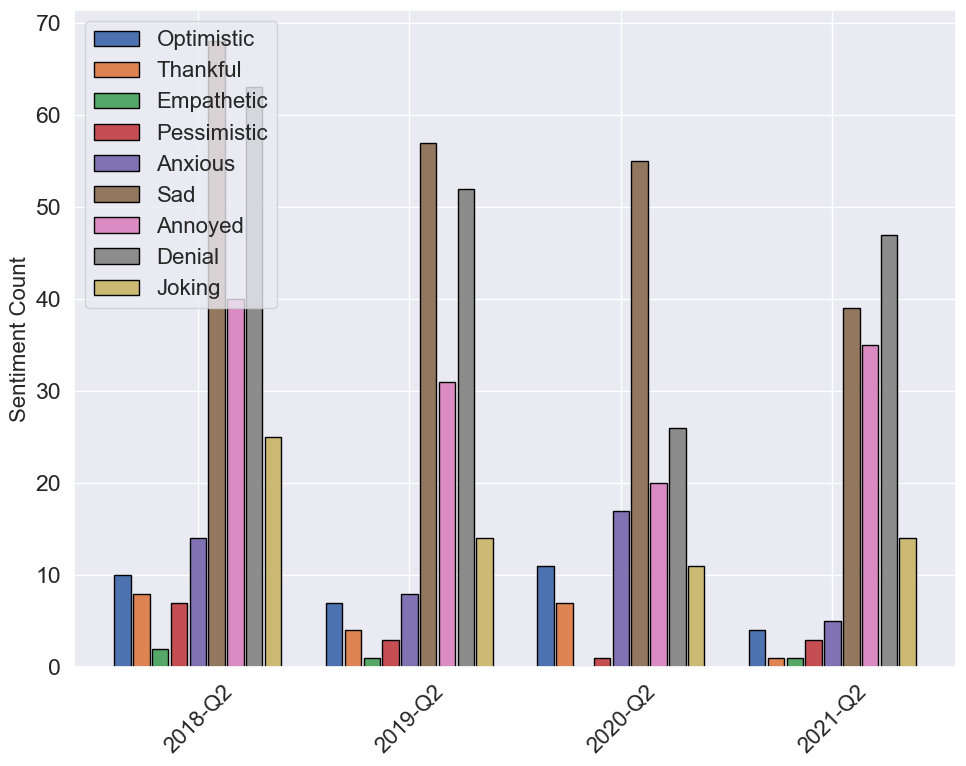

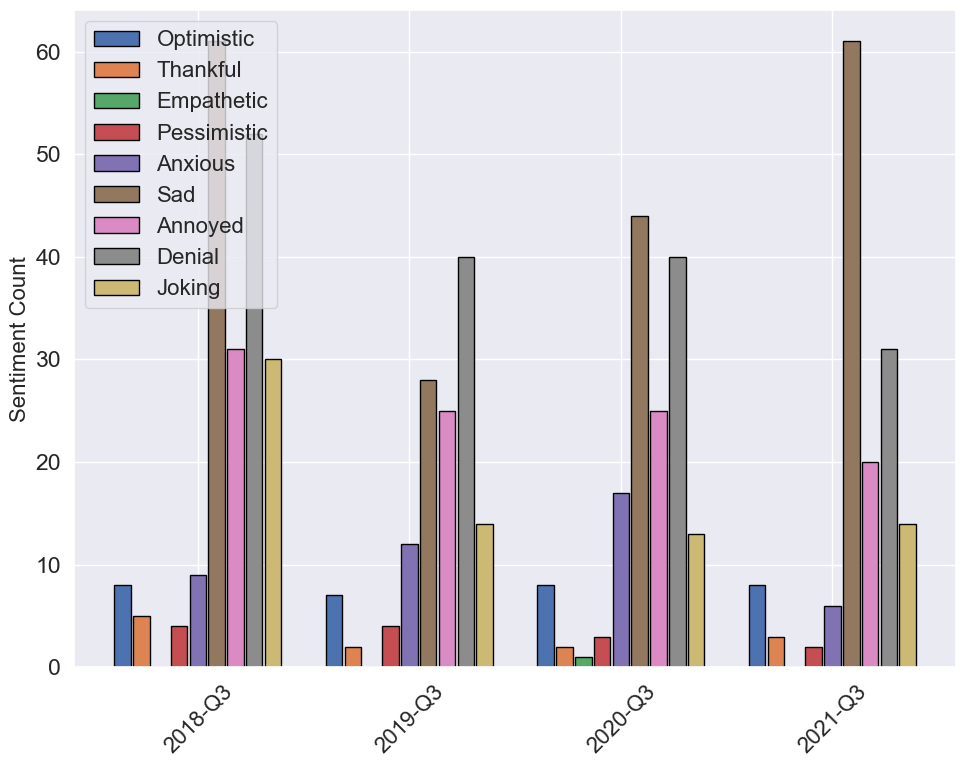

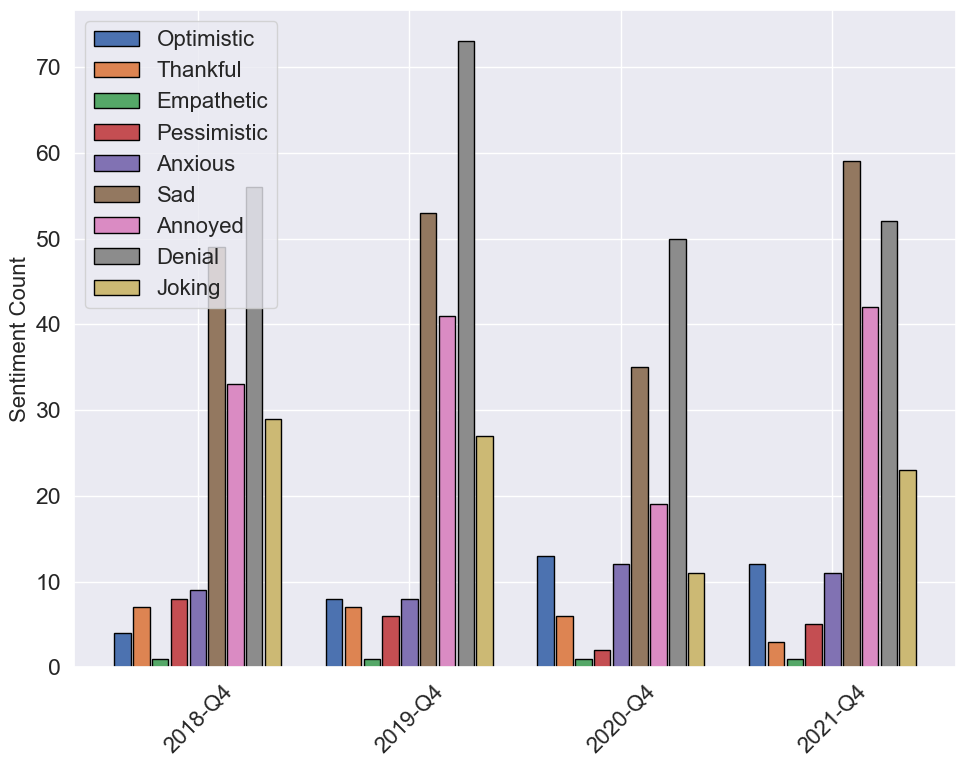

In [ ]:
plot_quarterly_sentiment(uk_roberta, 2018, 2022, last_quarter=1)

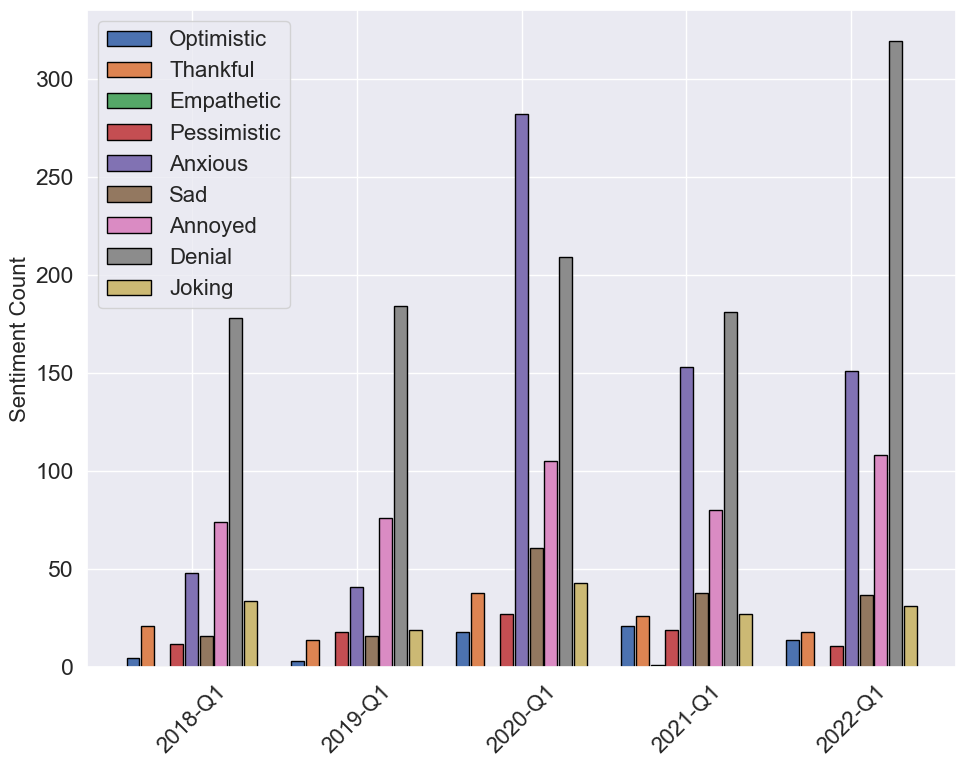

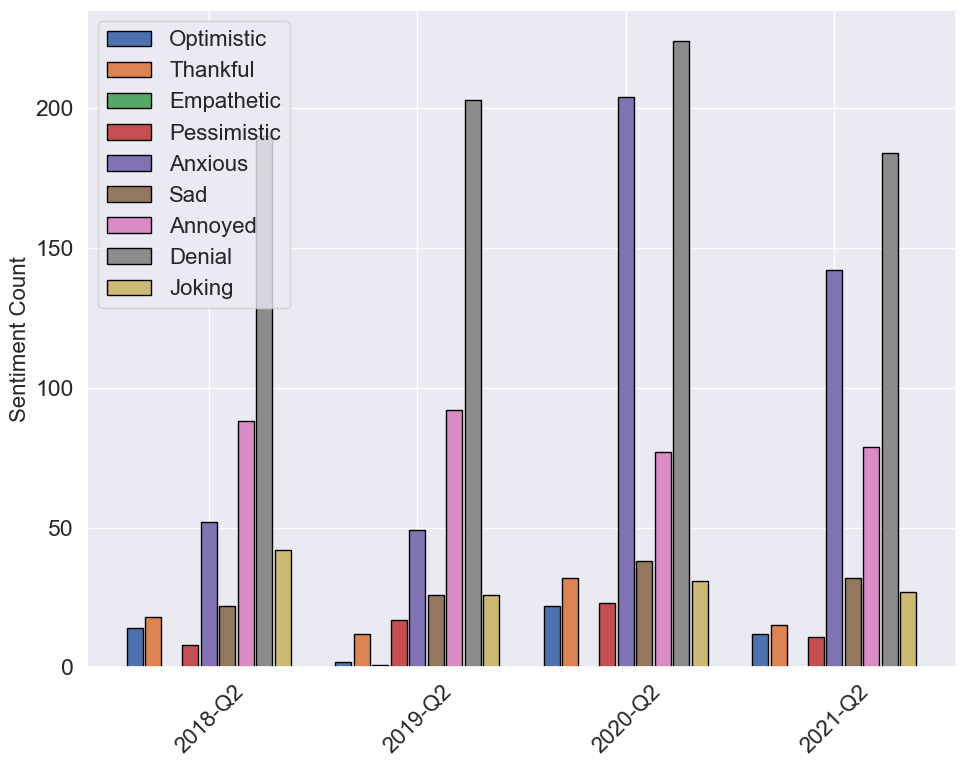

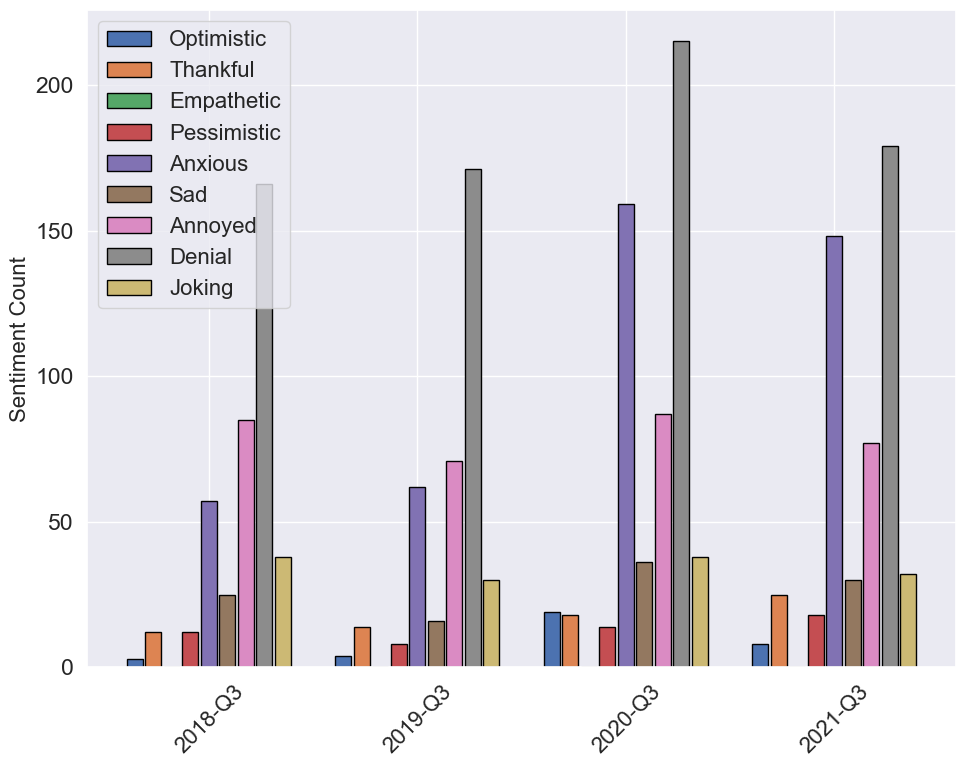

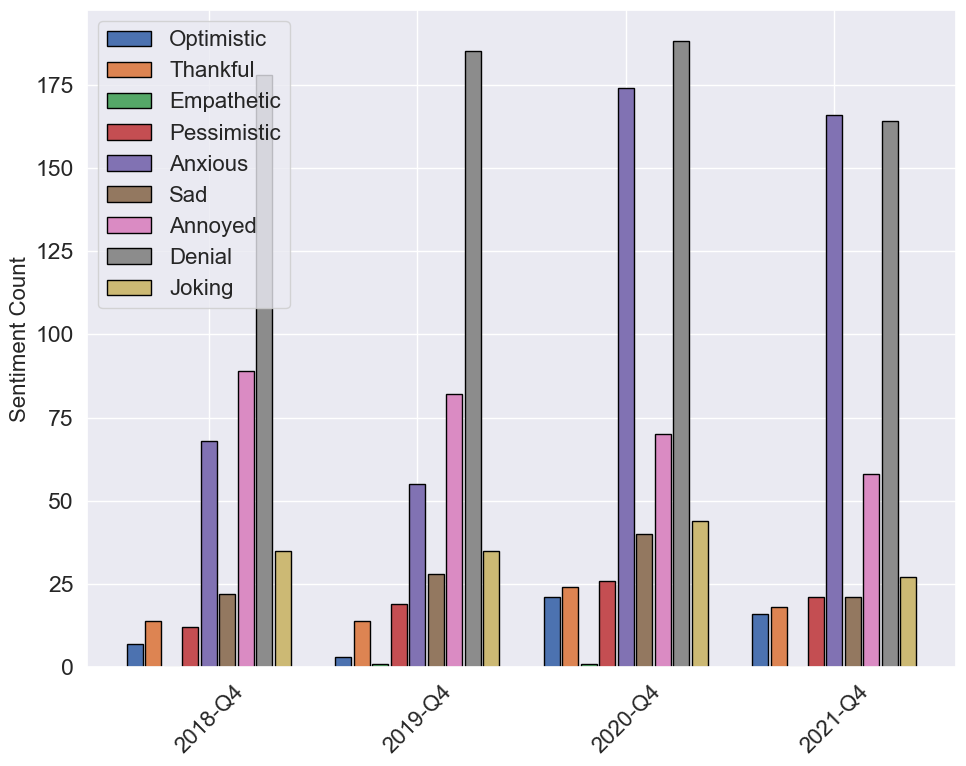

In [ ]:
plot_quarterly_sentiment(world_bert, 2018, 2022, last_quarter=1)

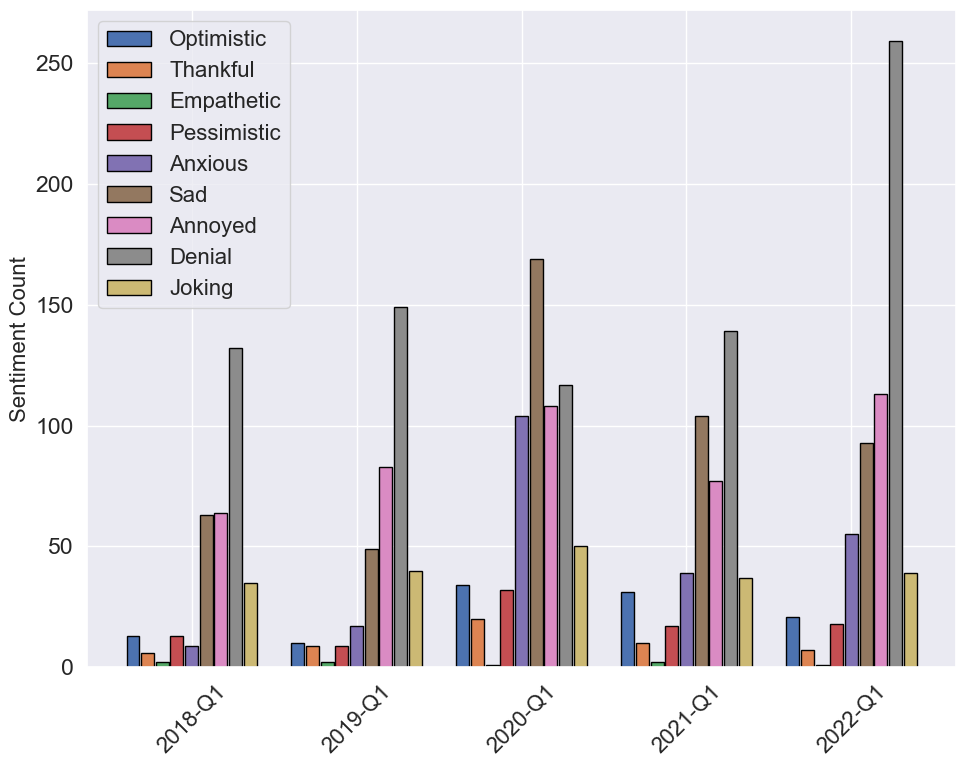

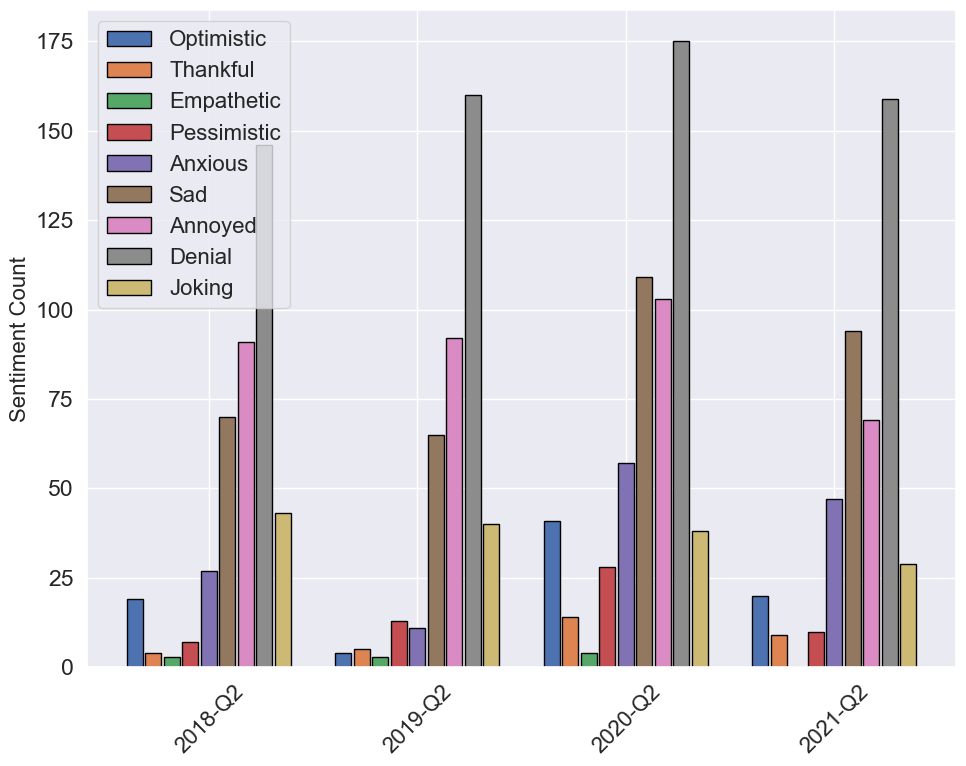

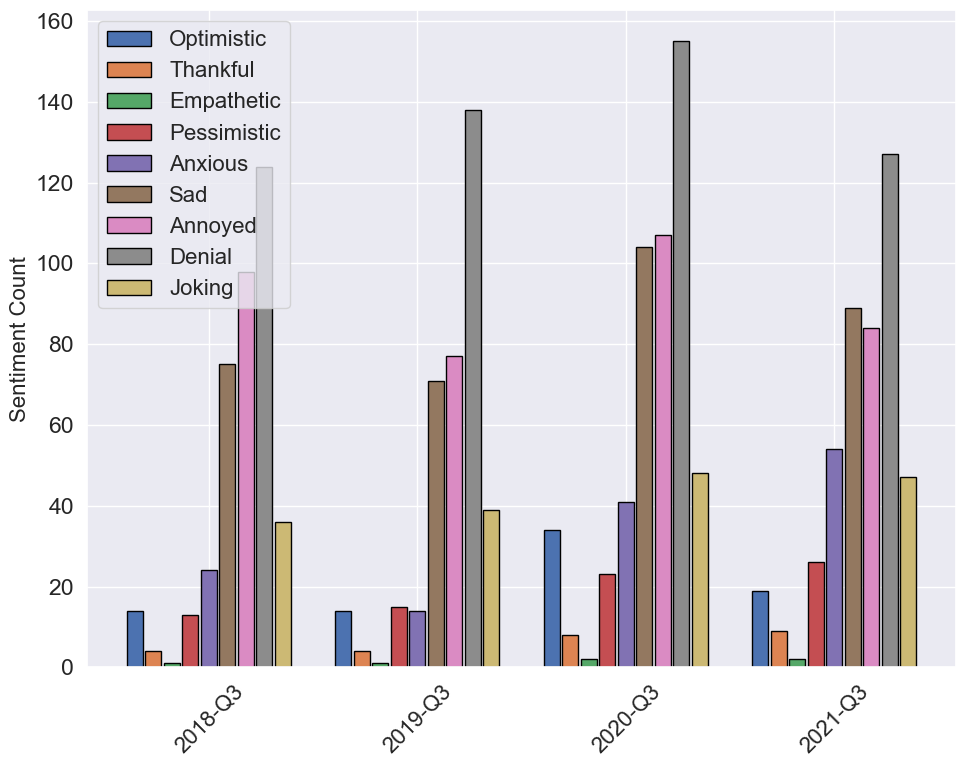

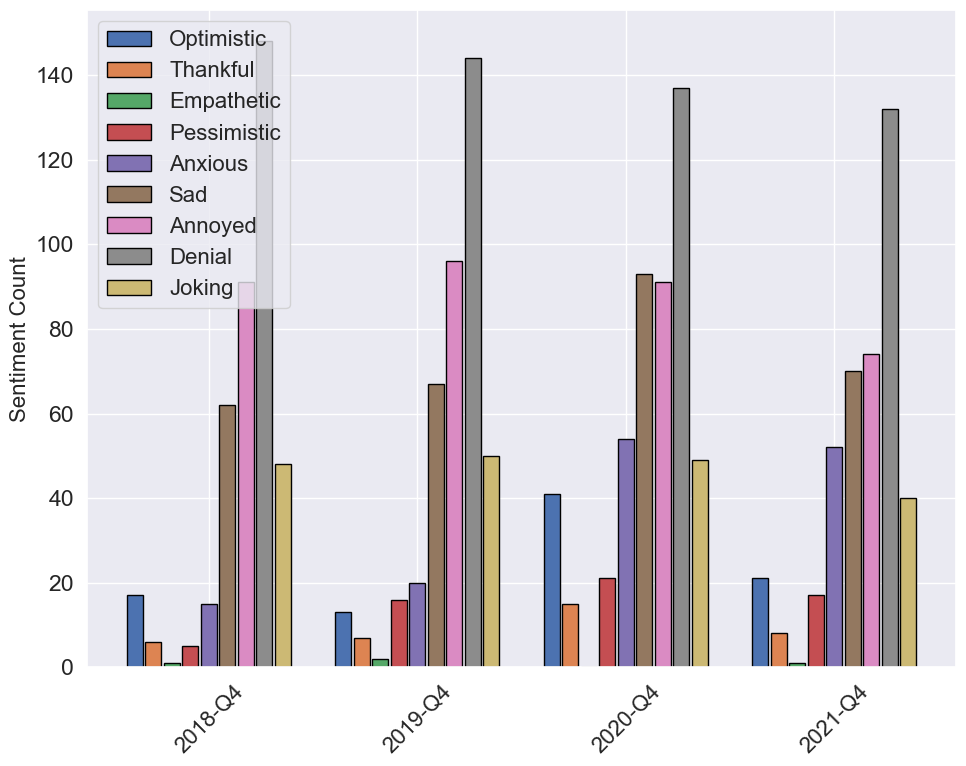

In [ ]:
plot_quarterly_sentiment(world_roberta, 2018, 2022, last_quarter=1)

In [ ]:
world_2020_Q1 = bert_data[(bert_data['sectionName'] == 'World news') & (bert_data['year_quarter'] == '2020-Q1')]
len(world_2020_Q1)


1033

In [ ]:
aus_2020_Q1 = bert_data[(bert_data['sectionName'] == 'Australia news') & (bert_data['year_quarter'] == '2020-Q1')]
print(len(aus_2020_Q1))
uk_2020_Q1 = bert_data[(bert_data['sectionName'] == 'UK news') & (bert_data['year_quarter'] == '2020-Q1')]
print(len(uk_2020_Q1))

221
199


In [ ]:
aus_2020_Q2 = bert_data[(bert_data['sectionName'] == 'Australia news') & (bert_data['year_quarter'] == '2020-Q2')]
print(len(aus_2020_Q2))
uk_2020_Q2 = bert_data[(bert_data['sectionName'] == 'UK news') & (bert_data['year_quarter'] == '2020-Q2')]
print(len(uk_2020_Q2))

287
183


In [ ]:
aus_2020_Q3 = bert_data[(bert_data['sectionName'] == 'Australia news') & (bert_data['year_quarter'] == '2020-Q3')]
print(len(aus_2020_Q3))
uk_2020_Q3 = bert_data[(bert_data['sectionName'] == 'UK news') & (bert_data['year_quarter'] == '2020-Q3')]
print(len(uk_2020_Q3))

377
222


In [ ]:
aus_2020_Q4 = bert_data[(bert_data['sectionName'] == 'Australia news') & (bert_data['year_quarter'] == '2020-Q4')]
print(len(aus_2020_Q4))
uk_2020_Q4 = bert_data[(bert_data['sectionName'] == 'UK news') & (bert_data['year_quarter'] == '2020-Q4')]
print(len(uk_2020_Q4))

331
216


In [ ]:
aus_2021_Q1 = bert_data[(bert_data['sectionName'] == 'Australia news') & (bert_data['year_quarter'] == '2021-Q1')]
print(len(aus_2021_Q1))
uk_2021_Q1 = bert_data[(bert_data['sectionName'] == 'UK news') & (bert_data['year_quarter'] == '2021-Q1')]
print(len(uk_2021_Q1))

364
217


In [ ]:
aus_2021_Q2 = bert_data[(bert_data['sectionName'] == 'Australia news') & (bert_data['year_quarter'] == '2021-Q2')]
print(len(aus_2021_Q2))
uk_2021_Q2 = bert_data[(bert_data['sectionName'] == 'UK news') & (bert_data['year_quarter'] == '2021-Q2')]
print(len(uk_2021_Q2))

361
229


In [ ]:
aus_2021_Q3 = bert_data[(bert_data['sectionName'] == 'Australia news') & (bert_data['year_quarter'] == '2021-Q3')]
print(len(aus_2021_Q3))
uk_2021_Q3 = bert_data[(bert_data['sectionName'] == 'UK news') & (bert_data['year_quarter'] == '2021-Q3')]
print(len(uk_2021_Q3))

380
236


In [ ]:
aus_2021_Q4 = bert_data[(bert_data['sectionName'] == 'Australia news') & (bert_data['year_quarter'] == '2021-Q4')]
print(len(aus_2021_Q4))
uk_2021_Q4 = bert_data[(bert_data['sectionName'] == 'UK news') & (bert_data['year_quarter'] == '2021-Q4')]
print(len(uk_2021_Q4))

415
317


In [ ]:
aus_2022_Q1 = bert_data[(bert_data['sectionName'] == 'Australia news') & (bert_data['year_quarter'] == '2022-Q1')]
print(len(aus_2022_Q1))
uk_2022_Q1 = bert_data[(bert_data['sectionName'] == 'UK news') & (bert_data['year_quarter'] == '2022-Q1')]
print(len(uk_2022_Q1))

439
283


In [ ]:
quarters = ['2020-Q1','2020-Q2','2020-Q3','2020-Q4','2021-Q1','2021-Q2','2021-Q3','2021-Q4','2022-Q1']
aus_bodycontent=[221,287,377,331,364,361,380,415,439]
aus_death_cases=[23,95,771,25,2,7,422,959,3470]
plot_data_au = pd.DataFrame({
    'quarters': quarters,
    'aus_bodycontent': aus_bodycontent,
    'aus_death_cases': aus_death_cases
})

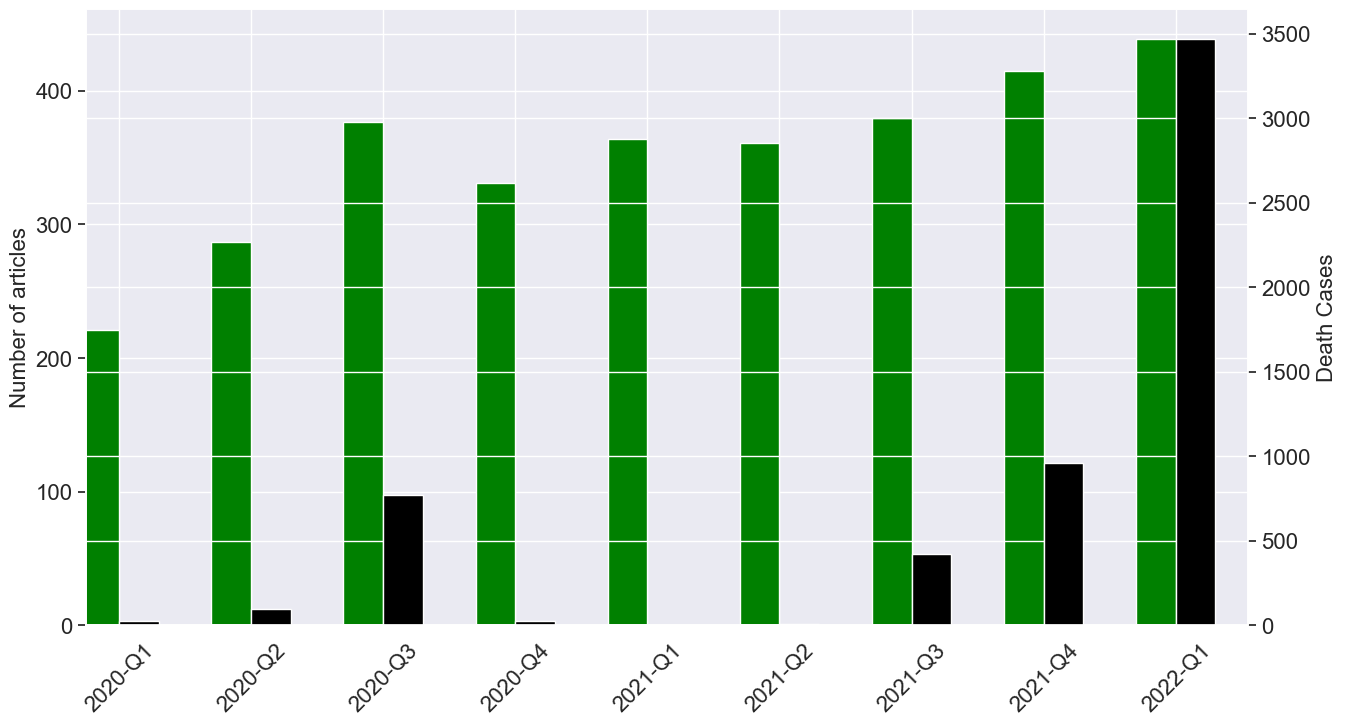

In [ ]:
# Set the figure size and add subplots
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
ax2 = ax.twinx()  # Create a twin Y-axis to plot death cases

# Set the width for the bars
width = 0.3
# Plotting
plot_data_au['aus_bodycontent'].plot(kind='bar', color='green', ax=ax, width=width, position=1, label='Number of articles', fontsize=16)
plot_data_au['aus_death_cases'].plot(kind='bar', color='black', ax=ax2, width=width, position=0, label='Death Cases', fontsize=16)

# Set labels and legends
ax.set_xticklabels(plot_data_au['quarters'], rotation=45, fontsize=16)
ax.set_ylabel("Number of articles", fontsize=16)
ax2.set_ylabel("Death Cases", fontsize=16)
#ax.legend(loc='upper left', fontsize=16)
#ax2.legend(loc='upper right', fontsize=16)

plt.show()

In [ ]:
quarters = ['2020-Q1','2020-Q2','2020-Q3','2020-Q4','2021-Q1','2021-Q2','2021-Q3','2021-Q4','2022-Q1']
uk_bodycontent=[199,183,222,216,217,229,236,317,283]
uk_death_cases=[762,53786,2837,28477,63200,2755,8103,13403,13699]
plot_data_uk = pd.DataFrame({
    'quarters': quarters,
    'uk_bodycontent': uk_bodycontent,
    'uk_death_cases': uk_death_cases
})

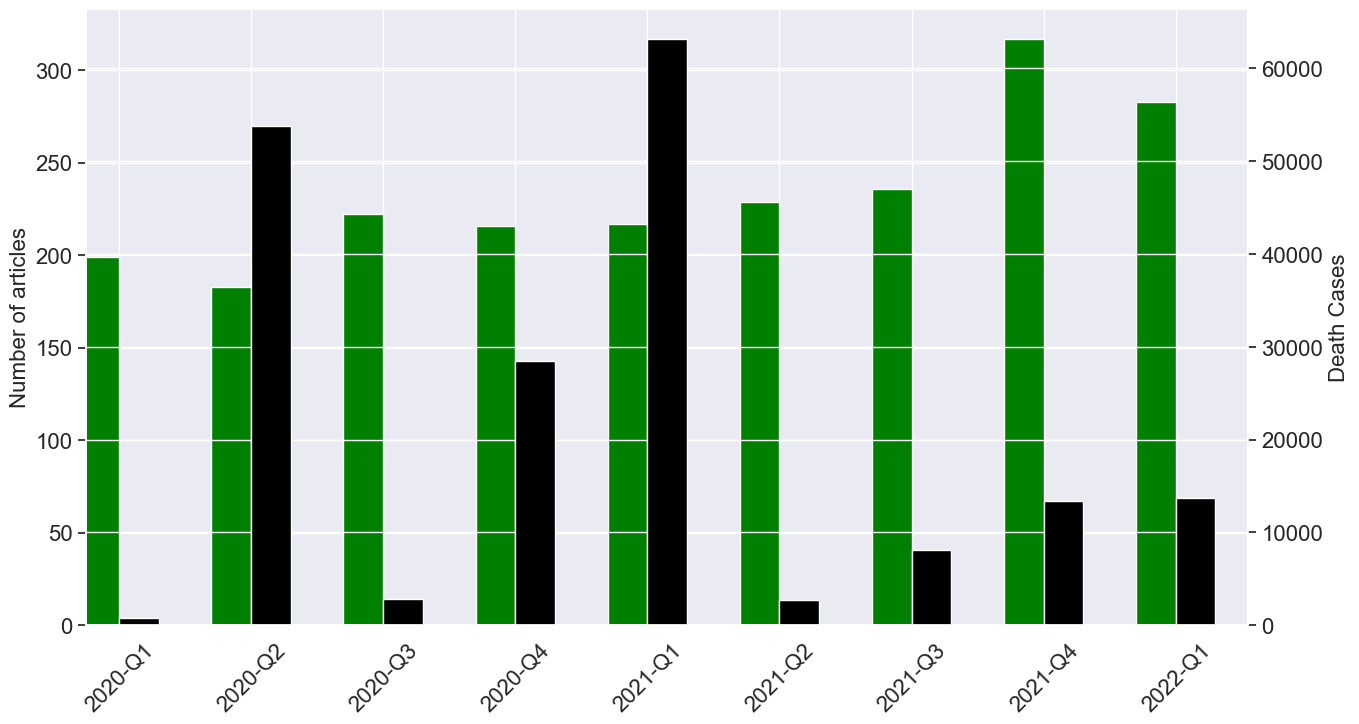

In [ ]:
# Set the figure size and add subplots
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)
ax2 = ax.twinx()  # Create a twin Y-axis to plot death cases

# Set the width for the bars
width = 0.3

# Plotting
plot_data_uk['uk_bodycontent'].plot(kind='bar', color='green', ax=ax, width=width, position=1, label='Number of articles', fontsize=16)
plot_data_uk['uk_death_cases'].plot(kind='bar', color='black', ax=ax2, width=width, position=0, label='Death Cases', fontsize=16)

# Set labels and legends
ax.set_xticklabels(plot_data_uk['quarters'], rotation=45, fontsize=16)
ax.set_ylabel("Number of articles", fontsize=16)
ax2.set_ylabel("Death Cases", fontsize=16)
#ax.legend(loc='upper left', fontsize=16)
#ax2.legend(loc='upper right', fontsize=16)

plt.show()